# SALARY PREDICTION PROJECTS

# International Salary Prediction Model Based on Demographics and Ethnicity

This project focuses on forecasting individual salaries across diverse countries and ethnic backgrounds by analyzing demographic factors including occupation, age, gender, work experience, and educational qualifications. A Kaggle dataset containing 32,561 records with 15 attributes serves as the foundation for this analysis. The dataset comprises 8 predictor variables alongside 1 dependent variable representing salary outcomes.

# DATASET DETAILS

##### This dataset represents an extensive compilation of demographic and salary data, enhanced with professional experience metrics. It serves as an invaluable tool for examining correlations between earnings and diverse socio-demographic variables. The included demographic features encompass age, gender, educational background, nationality, and ethnicity, creating a robust foundation for analytical exploration. The data enables researchers to identify income distribution patterns and trends spanning various demographic segments, revealing potential earning disparities and variations across different groups. Additionally, the integration of professional experience data introduces a critical temporal element, facilitating research into how career tenure influences compensation levels. This experiential component enriches the analytical framework, allowing scholars to assess income fluctuations through the lens of both demographic profiles and accumulated professional expertise. The dataset offers substantial potential for in-depth research on income variation and provides comprehensive understanding of the complex elements that shape earning capacity in the contemporary employment landscape

# DATA TABLE

In [1]:
import pandas as pd
# Created the data dictionary as a DataFrame
data_dict = {
    'Column': ['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title', 
               'Years of Experience', 'Salary', 'Country', 'Race'],
    'Description': ['Index', 'Age of the employee', 'Gender of the employee', 'Education level of the employee',
                   'Job title of the employee', 'Years of experience of the employee',
                   'Salary of the employee', 'Country of the employee', 'Race of the employee']
}
data_dictionary_df = pd.DataFrame(data_dict)
print("Data table")
print("=" * 50)
display(data_dictionary_df.style.hide(axis="index"))

Data table


### importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### loading the data

In [3]:

df = pd.read_csv('C:/Users/Gouthum/Downloads/Salary_Data_Based_country_and_race.csv')
df.head()

Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0  150000.0  Canada     White  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian

## Data Preprocessing

### checking the shape of the data

In [6]:
df.shape

(6704, 9)

### checking for null/missing values

In [7]:
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

Since only a small percentage of rows contain missing values compared to the entire dataset, I will proceed with dropping these incomplete records.

In [8]:
df.dropna(axis=0, inplace=True)

### checking for null values

In [9]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

Dropping Unnamed Column beacuse it is just an index column

### dropping column

In [10]:

df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)

Checking data type of each column

In [11]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

Checking for unique values in each column

In [12]:
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

With 191 distinct job titles present in the dataset, analyzing each individual role would be overly complex. Therefore, I will group these job titles into broader, similar job domains for more effective analysis

#### Grouping Job Titles

In [13]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

### Grouping Job Titles into Professional Domains

In [14]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [15]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

### Preview

In [16]:
df['Job Title']

0           Software/Developer
1       Data Analyst/Scientist
2          Manager/Director/VP
3                        Sales
4          Manager/Director/VP
                 ...          
6699       Manager/Director/VP
6700                     Sales
6701       Manager/Director/VP
6702       Manager/Director/VP
6703                     Sales
Name: Job Title, Length: 6698, dtype: object

### Display unique job titles in a professional table format

In [17]:
unique_jobs = pd.DataFrame(df['Job Title'].unique(), columns=['Job Categories'])
unique_jobs.index.name = 'Index'
print(f"Total Unique Job Categories: {len(unique_jobs)}")
print("=" * 50)
display(unique_jobs)

Total Unique Job Categories: 12


Job Categories
Index                               
0                 Software/Developer
1             Data Analyst/Scientist
2                Manager/Director/VP
3                              Sales
4             Marketing/Social Media
5      Customer Service/Receptionist
6                              Other
7               IT/Technical Support
8                   Product/Designer
9               Financial/Accountant
10                HR/Human Resources
11           Operations/Supply Chain

In the dataset the education level is represented in two different ways : Bachelor and Bachelor degree, which means same. So I will be grouping it with Bachelor

#### Grouping Education Level

In [18]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

### Display unique education levels with their counts

In [19]:
education_counts = df['Education Level'].value_counts().reset_index()
education_counts.columns = ['Education Level', 'Count']
education_counts.index = range(1, len(education_counts) + 1)
education_counts.index.name = 'S.No'
print(f"Education Level Distribution")
print("=" * 50)
display(education_counts)

Education Level Distribution


Education Level  Count
S.No                       
1          Bachelors   3021
2            Masters   1860
3                PhD   1369
4        High School    448

#### Descriptive Statistics

In [20]:
#descriptive statistics
df.describe()

Age  Years of Experience         Salary
count  6698.000000          6698.000000    6698.000000
mean     33.623022             8.095178  115329.253061
std       7.615784             6.060291   52789.792507
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

In [21]:
df.head()

Age  Gender Education Level               Job Title  Years of Experience  \
0  32.0    Male       Bachelors      Software/Developer                  5.0   
1  28.0  Female         Masters  Data Analyst/Scientist                  3.0   
2  45.0    Male             PhD     Manager/Director/VP                 15.0   
3  36.0  Female       Bachelors                   Sales                  7.0   
4  52.0    Male         Masters     Manager/Director/VP                 20.0   

     Salary Country      Race  
0   90000.0      UK     White  
1   65000.0     USA  Hispanic  
2  150000.0  Canada     White  
3   60000.0     USA  Hispanic  
4  200000.0     USA     Asian

In [22]:
df.tail()

Age  Gender Education Level            Job Title  Years of Experience  \
6699  49.0  Female             PhD  Manager/Director/VP                 20.0   
6700  32.0    Male     High School                Sales                  3.0   
6701  30.0  Female       Bachelors  Manager/Director/VP                  4.0   
6702  46.0    Male         Masters  Manager/Director/VP                 14.0   
6703  26.0  Female     High School                Sales                  1.0   

        Salary    Country        Race  
6699  200000.0         UK       Mixed  
6700   50000.0  Australia  Australian  
6701   55000.0      China     Chinese  
6702  140000.0      China      Korean  
6703   35000.0     Canada       Black

## Exploratory Data Analysis

The exploratory data analysis phase involves a systematic examination of the dataset to uncover underlying patterns and relationships. I will first explore the distributional characteristics of each variable, then create comprehensive visualizations to understand how different features correlate with the target variable.

### Pie chart for Gender

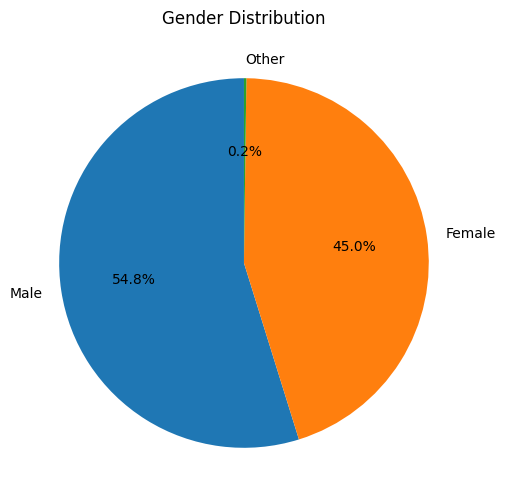

In [23]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

According to the pie chart analysis, the dataset demonstrates a gender distribution where males comprise 54.8% of the workforce, females account for 45%, and employees identifying with other gender categories make up 0.2%

### Age Distribution

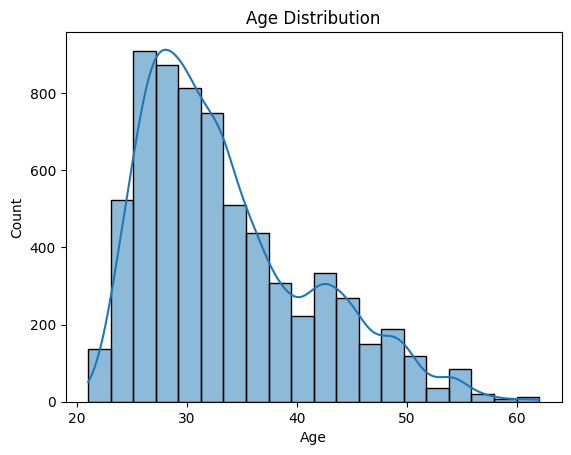

In [24]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Analysis shows that employees aged 25-35 years constitute the largest segment of the workforce, reflecting a young and dynamic employee base. In contrast, the dataset contains only a limited number of senior employees above 55 years of ageears.

### Education Level

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_25108\3398669243.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Education Level', data = df, palette='Set1')


([0, 1, 2, 3],
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

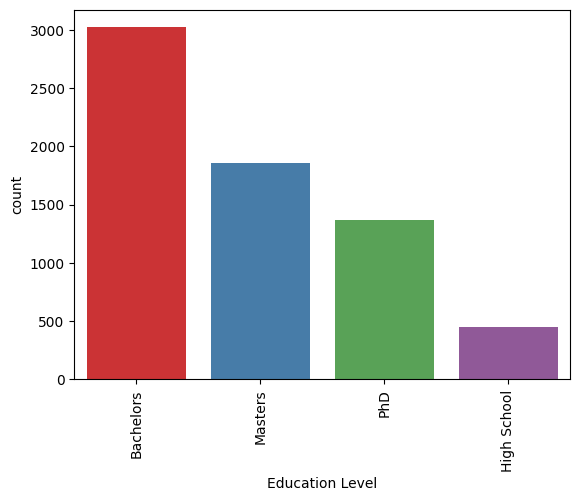

In [25]:
sns.countplot(x = 'Education Level', data = df, palette='Set1')
plt.xticks(rotation=90)

Most of the employees have a Bachelor's degree followed by Master's degree and Doctoral degree. The least number of employees have a High School education. From the graph it is clear that most of the employees started working after graduation, few of them started working after post graduation and very few of them have gone for doctorate. The least number of employees have started working after high school education.

### More Deatils with counts(run last not now)

In [ ]:
plt.figure(figsize=(12, 8))
education_counts = df['Education Level'].value_counts()

#  horizontal bar chart
ax = sns.barplot(y=education_counts.index, x=education_counts.values, 
                palette='viridis', orient='h')

# Add value labels on bars
for i, v in enumerate(education_counts.values):
    ax.text(v + 10, i, str(v), va='center', ha='left', fontweight='bold')

plt.title('Education Level Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Employees', fontsize=12, fontweight='bold')
plt.ylabel('Education Level', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### Job Title

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

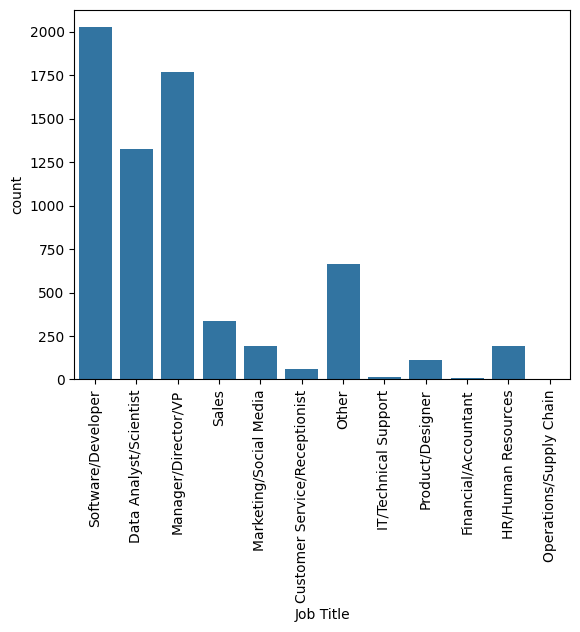

In [27]:
sns.countplot(x='Job Title', data = df)
plt.xticks(rotation=90)

This graph helps us to breakdown the data of job title in a simpler form. From the graph, it is clear that majority of the employees have job titles - Software Developer, Data Analyst/Scientist or Manager/Director/Vp. Few amount of employees have job titles such as sales, marketing/social media, HR, Product Designer and Customer Service. Very few of the eomployees work as a Financial/accountant or operation/supply management.

From this I build a hypothesis that the job titles such as Software Developer, Data Analyst/Scientist and Manager/Director are in more demand as compared to other job titles. It also means that job titles like Financial/accountant or operation/supply management and Customer Service are in less demand and paid comparatively less.

### More Deatils with counts

In [ ]:
plt.figure(figsize=(12, 10))

# Get job title counts and sort
job_counts = df['Job Title'].value_counts()

# Create horizontal bar chart
ax = sns.barplot(y=job_counts.index, x=job_counts.values, 
                palette='rocket', orient='h')

# Add count labels at the end of bars
for i, v in enumerate(job_counts.values):
    ax.text(v + 20, i, str(v), va='center', ha='left', 
            fontweight='bold', fontsize=11)

plt.title('Job Title Distribution', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Employees', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

###### This visualization provides a simplified breakdown of job title distribution across the dataset. The analysis reveals that the predominant job categories are Software Developer, Data Analyst/Scientist, and Manager/Director/VP roles, which collectively represent the majority of employees. A moderate number of employees hold positions in Sales, Marketing/Social Media, HR, Product Design, and Customer Service functions. Conversely, Financial/Accountant and Operations/Supply Chain Management roles represent the smallest segments of the workforce. Based on these findings, I hypothesize that Software Developer, Data Analyst/Scientist, and Manager/Director positions are experiencing higher market demand compared to other job categories. This distribution pattern suggests that roles such as Financial/Accountant, Operations/Supply Chain Management, and Customer Service may have lower market demand and potentially offer comparatively lower compensation packages.

### Years of Experience

<Axes: xlabel='Years of Experience', ylabel='Count'>

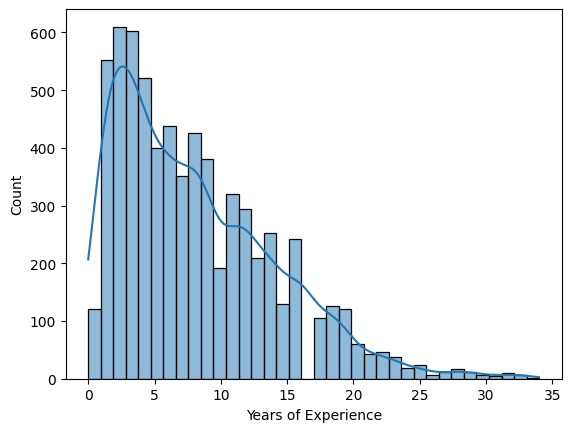

In [20]:
sns.histplot(x = 'Years of Experience', data = df,kde=True)

Most of the employees in the dataset havr experience of 0-7 years in the respective domains in which particularly majority of them have experience between less than 5 years. Moreover the number of employees in the dataset decreases with increasing number of years of experience.

### More Deatils with counts

In [ ]:
plt.figure(figsize=(12, 6))

# Create histogram
ax = sns.histplot(x='Years of Experience', data=df, kde=True, bins=20)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fontweight='bold')

plt.title('Years of Experience Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

### Country

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

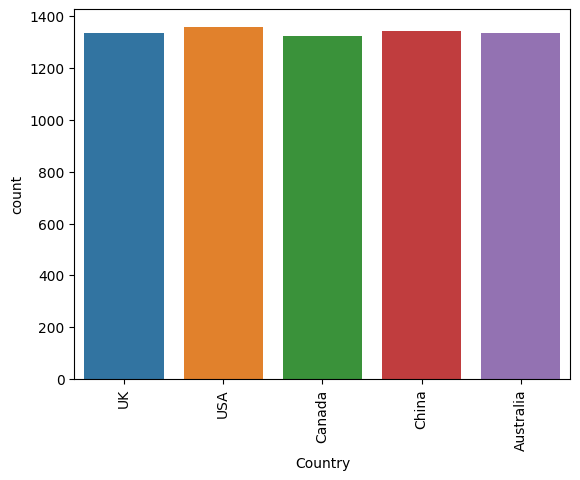

In [21]:
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)

The number of employees from the above 5 countries is nearly same, with a little more in USA.

### More details with counts

In [ ]:
plt.figure(figsize=(12, 8))

# Custom colors for each country
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', 
          '#FF9FF3', '#A8E6CF', '#FFD93D', '#6C5CE7', '#FD79A8']

# Create countplot
ax = sns.countplot(x='Country', data=df, palette=colors)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fontweight='bold')

plt.title('Country Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)

# Remove all spines for clean look
sns.despine()
plt.tight_layout()
plt.show()

###### The number of employees from the above 5 countries is nearly same, with a little more in USA.

### Racial Distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

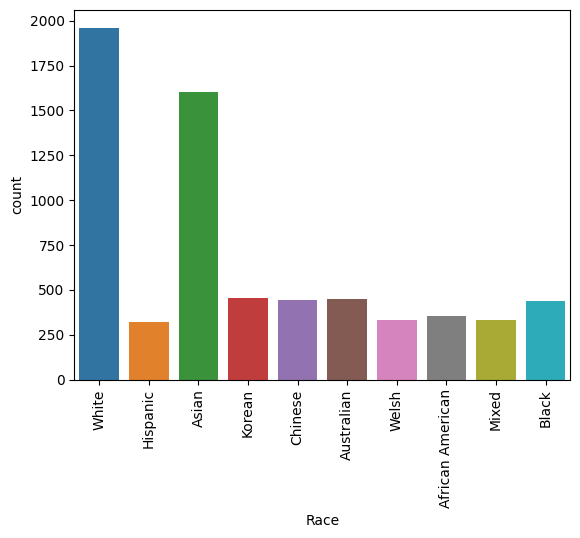

In [22]:
sns.countplot(x='Race', data=df)
plt.xticks(rotation=90)

This chart effectively demonstrates the racial diversity distribution across the dataset. The data shows a clear hierarchy where White and Asian employees dominate the sample, followed by moderate representation from Korean, Chinese, Australian, and Black groups. Hispanic, African American, Mixed, and Welsh employees comprise the minority segments of the workforce. The comprehensive exploratory analysis conducted through these visualizations has provided essential understanding of the dataset's fundamental characteristics, distribution patterns, and categorical representations. I will now proceed to analyze the relationships and correlations between these demographic independent variables and the primary target variable: Salary.

From all the above plots and graphs, we can a understanding about the data we are dealing with, its distribution and quantity as well. Now I am gonna explore the realtion of these independent variables with the target Variable i.e. Salary.

### Age and Salary

Text(0.5, 1.0, 'Age vs Salary')

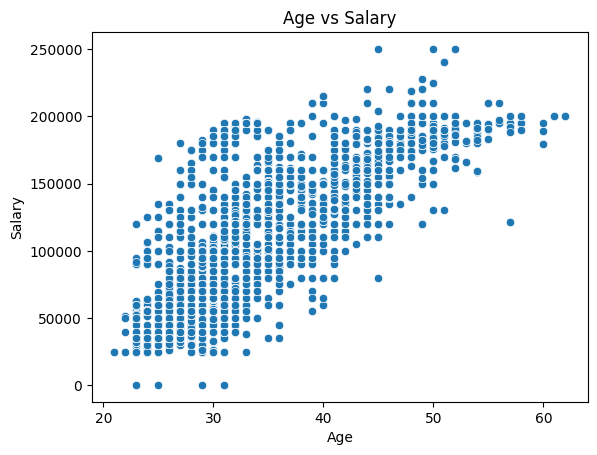

In [23]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

This visualization demonstrates an upward trend where salary tends to rise with increasing age, reflecting the natural progression of career growth through promotions and merit-based increases. Nevertheless, closer analysis reveals considerable salary dispersion within the same age groups, suggesting that multiple variables contribute to salary determination beyond chronological age alone.

### Gender and Salary

Text(0.5, 1.0, 'Gender vs Salary')

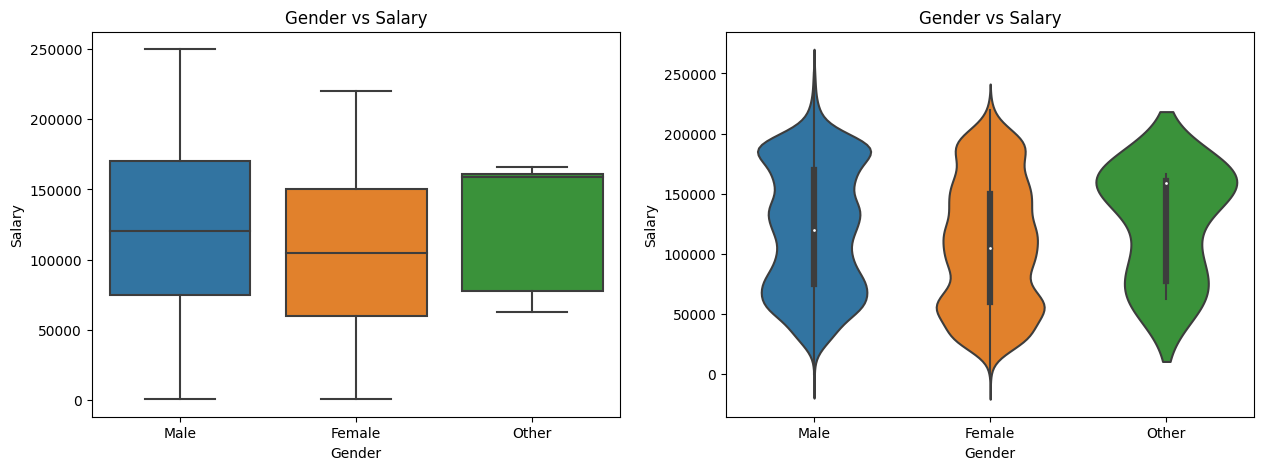

In [24]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, ax =ax[1]).set_title('Gender vs Salary')

The boxplot and violin plot illustrate salary distribution patterns across the three gender categories. According to the boxplot analysis, employees identifying as Other gender demonstrate significantly higher compensation levels compared to Male and Female employees. The Other gender group exhibits a median salary exceeding 150,000, while Male employees show a median salary of approximately 107,500, and Female employees display a median salary around  100,000. The violin plot provides additional insights into salary distribution patterns by gender, revealing that the majority of Other gender employees earn above 150,000. For Male employees, the salary distribution shows concentration in two primary ranges: between 50,000-100,000 and near 200,000. Female employees exhibit the most dispersed salary distribution among all gender groups, with the highest concentration of salaries clustered around 50,000.

### Education Level and Salary

Text(0.5, 1.0, 'Education Level vs Salary')

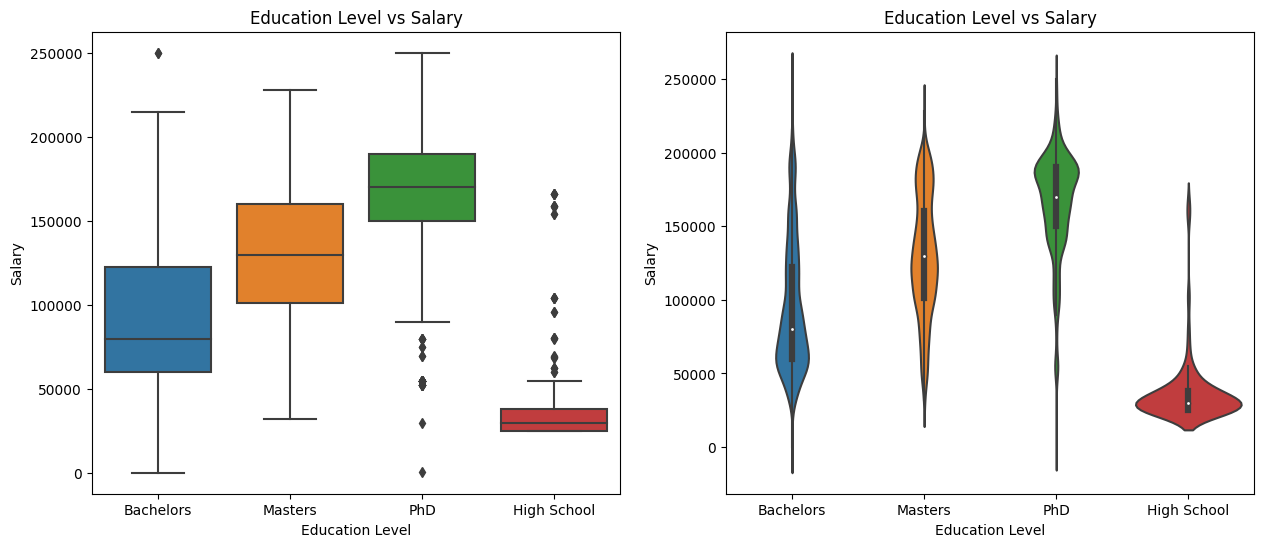

In [25]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[1]).set_title('Education Level vs Salary')

The boxplot and violin plot demonstrate salary distribution patterns across different educational qualification levels. The analysis reveals that PhD holders achieve the highest median salary, followed sequentially by Master's degree holders, Bachelor's degree holders, and finally employees without formal degrees showing the lowest median compensation. The violin plot provides detailed distribution insights, showing PhD graduates concentrated around the 200,000 salary range, while Master's degree holders exhibit a narrow distribution spanning 100,000 to 150,000. Bachelor's degree holders demonstrate salary clustering near 50,000, whereas employees without degrees show distribution concentrated in the 40,000-45,000 range.
Based on these visualizations, I conclude that there exists a positive correlation between educational attainment and salary levels, where employees with advanced educational qualifications consistently earn higher compensation than those with lower educational credentials.

### Job Title and Salary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

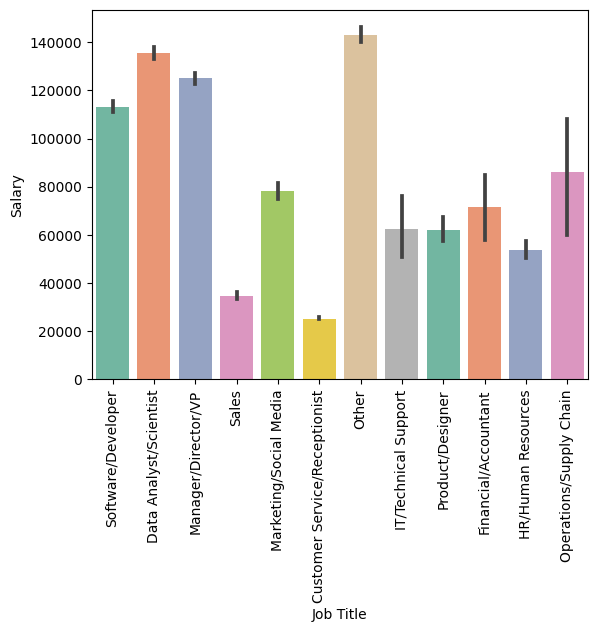

In [26]:
sns.barplot(x = 'Job Title', y = 'Salary', data = df, palette = 'Set2')
plt.xticks(rotation = 90)

This graph falsifies my previous hypothesis regarding the demand and paywith respect to job titles. In this graph, 'Other' category job titles have higher salary than those titles which assumed to be in high demand and pay. In contrast to previous Job title graph, this graph shows that there is no relation between the job title distribution and salary. The job titles which gave high salary are found to be less in number.

However the hypothesis is true about the Job titles such as Software Developer, Data analyst/scuentust and Manager/Director/VP. These job titles are found to be in high demand and pay. But in contrast to that the job titles such as Operation/Supply chain, HR, Financial/Accountant and Marketing/Social Media are found have much more salary as assumed.

### Experience and Salary

Text(0.5, 1.0, 'Years of Experience vs Salary')

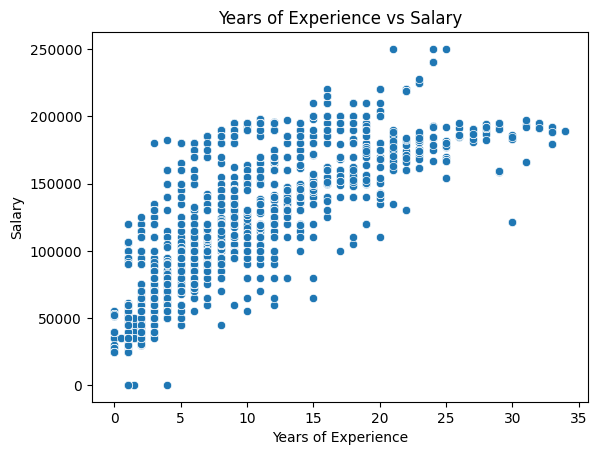

In [27]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = df).set_title('Years of Experience vs Salary')

From this scaaterplot, it is clear that on the whole, the salary of the employees is increasing with the years of experience. However, on closer look we can see that similar experience have different salaries. This is because the salary is also dependent on other factors like job title, age, gender education level as discussed earlier.

### Country and Salary

<Axes: xlabel='Country', ylabel='Salary'>

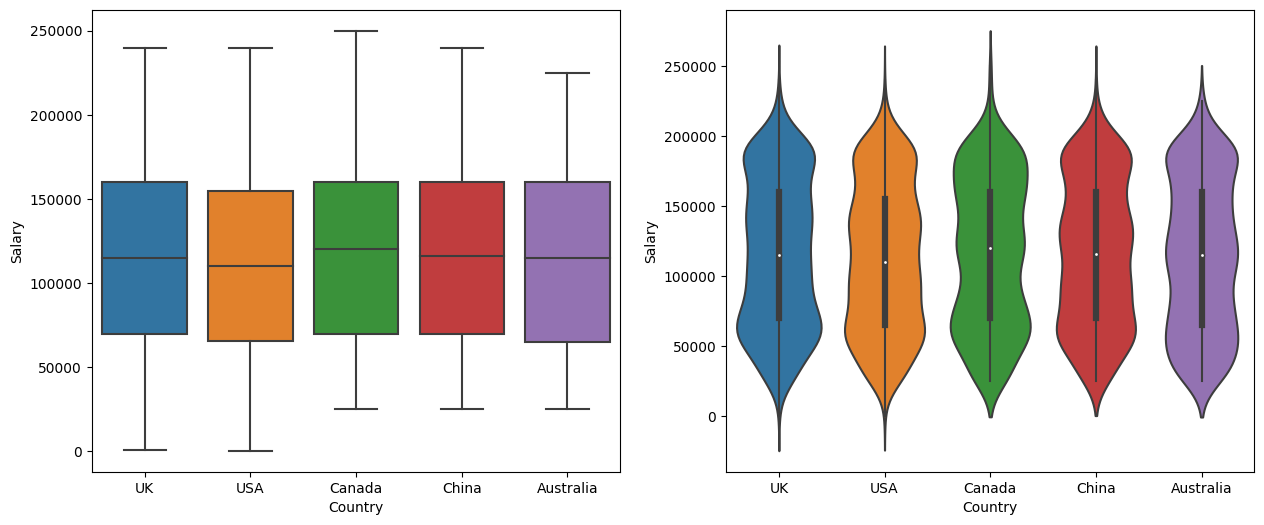

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, ax=ax[1])

The boxplot and violin plot demonstrate remarkably similar findings concerning salary patterns across different countries, including comparable distribution characteristics shown in the violin plot analysis. Nevertheless, the USA exhibits relatively minor salary variation around its median, with this median value being marginally lower than those observed in other countries

Since, the we cannot get much information about the salary with respect to the countries. So, I will plot the job title vs salary graph for each country, so that we can get a overview of job title vs salary for each country.

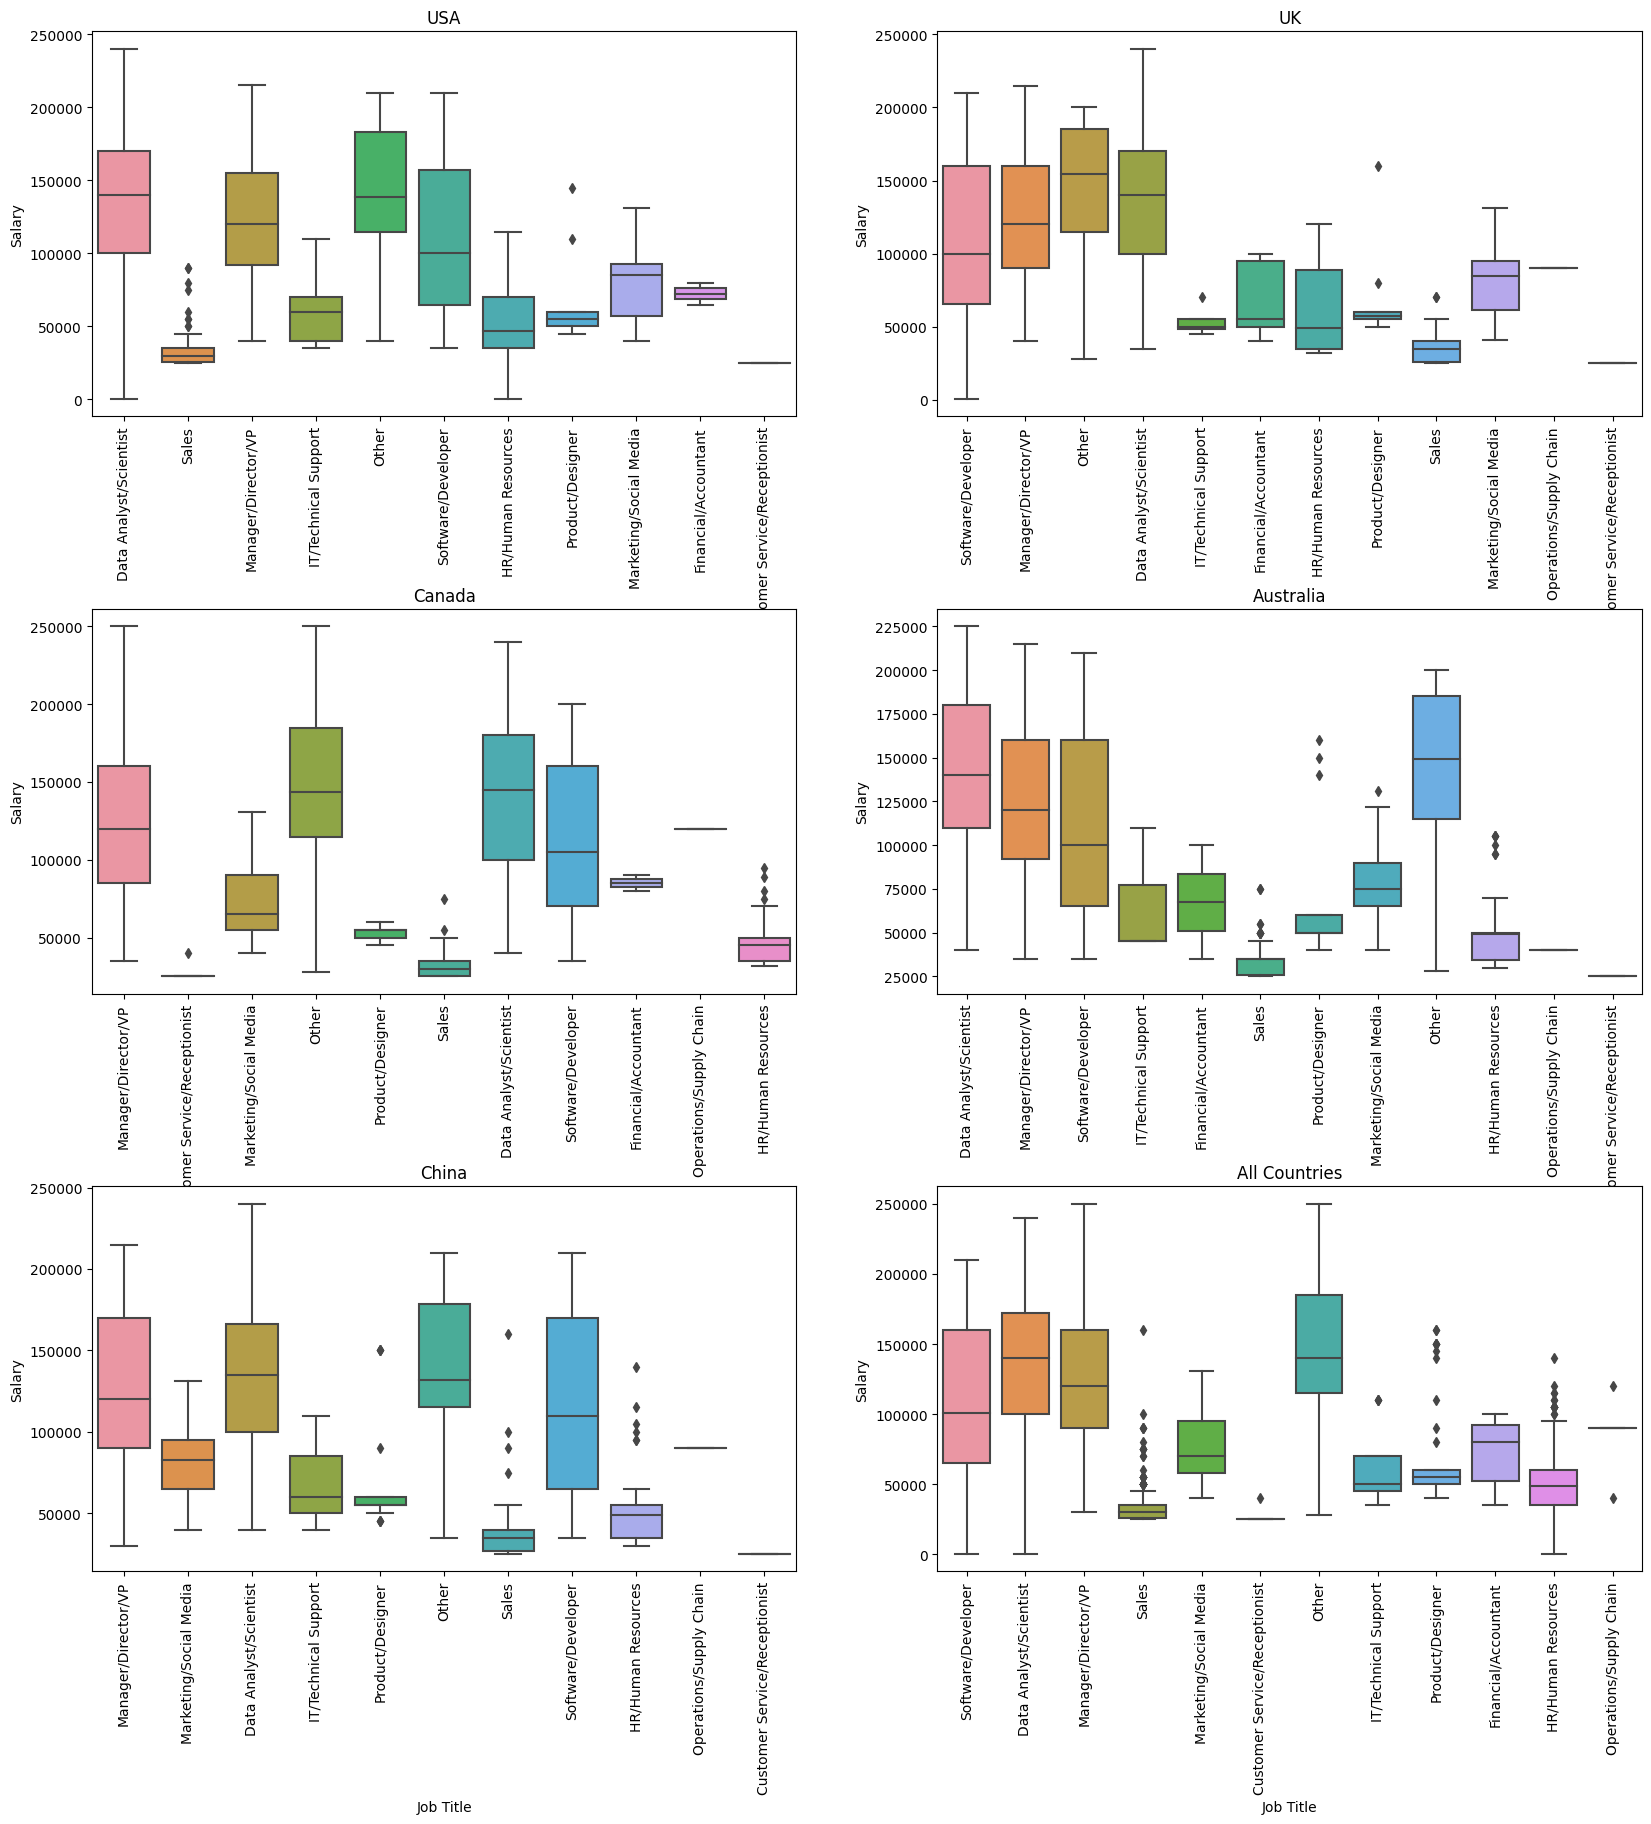

In [29]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

Based on the comprehensive analysis of these visualizations, I conclude that job titles including Software Developer, Manager/Director/VP, and Data Analyst/Scientist represent high-demand positions that command significantly higher compensation levels compared to other job categories, with the exception of roles classified under the 'Other' category. Conversely, positions such as Operations/Supply Chain, Customer Service/Receptionist, Product Designer, and Sales demonstrate lower market demand and correspondingly reduced salary ranges.

### Race and Salary

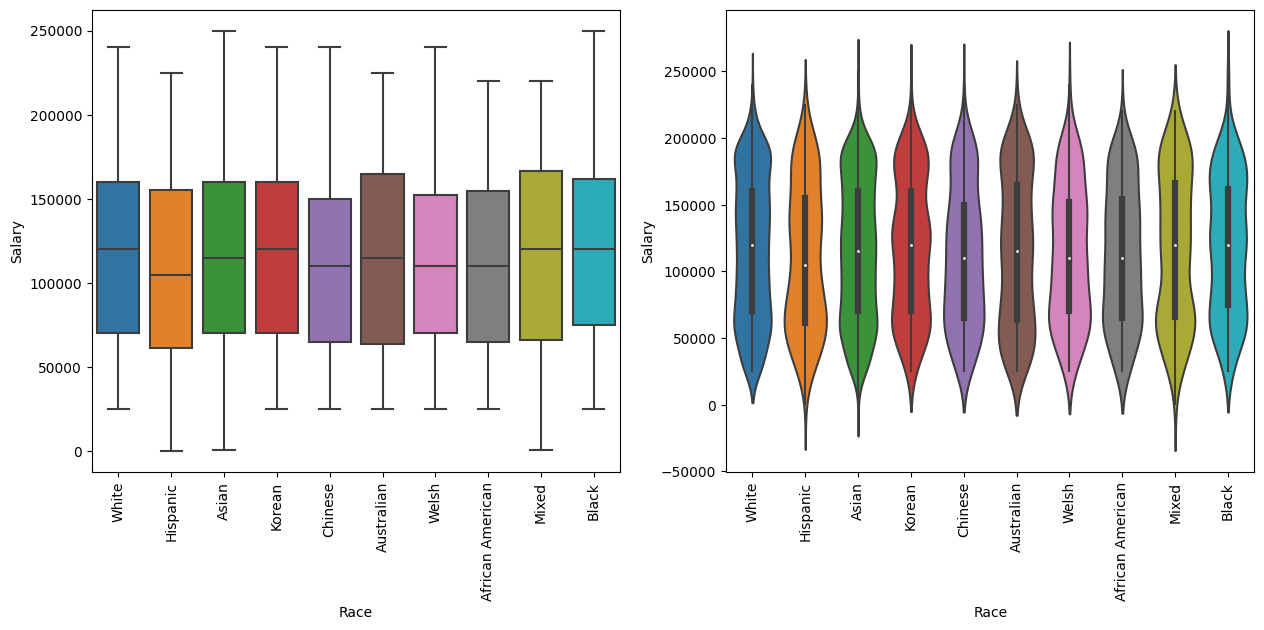

In [30]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)


The salary analysis by race reveals that employees from Australian, Mixed, Black, and White racial backgrounds achieve the highest median compensation levels, while Asian, Korean, and Chinese employees demonstrate moderate median salaries. Hispanic employees show the lowest median salary among all racial groups. The violin plot distribution analysis indicates that White, Australian, Black, and Mixed race employees exhibit salary concentrations predominantly above 150,000, whereas   Hispanic   employees show the highest salary density clustered around   $75,000.

## Data Preprocessing 2

### Label encoding to categorical features

In [31]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


### Normalization   

###### Normalization ensures fair treatment of all features, leading to better model performance and faster training

In [32]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [33]:
df.head()

Age  Gender  Education Level  Job Title  Years of Experience   
0 -0.213129       1                0         11            -0.510769  \
1 -0.738393       0                2          1            -0.840811   
2  1.493980       1                3          5             1.139440   
3  0.312135       0                0         10            -0.180727   
4  2.413192       1                2          5             1.964544   

     Salary  Country  Race  
0 -0.479849        3     9  
1 -0.953461        4     5  
2  0.656819        1     9  
3 -1.048183        4     5  
4  1.604042        4     1

## Coorelation Matrix Heatmap

<Axes: >

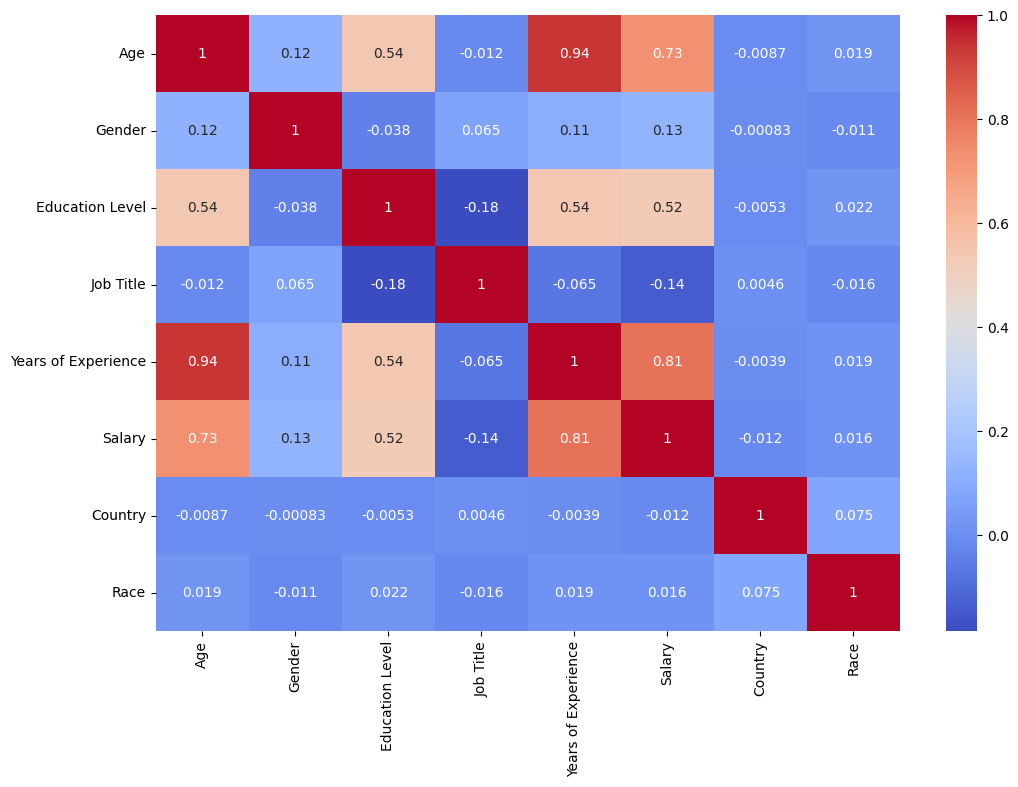

In [34]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In this coorelation matrix, there are three major coorealtions.
- Salary and Age
- Salary and Years of Experience
- Years of Experience and Age

The coorelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)

## Salary Prediction

I will be using the following models:

- Linear Regression
- Ridge Regression
- Decision Tree Regressor
- Random Forest Regressor
- XG Boost
- Support vector Machine
- MLP algorithum

### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [41]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

In [42]:
# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [44]:
# Evaluate the model
print("=" * 60)
print("LINEAR REGRESSION - BASELINE MODEL RESULTS")
print("=" * 60)

LINEAR REGRESSION - BASELINE MODEL RESULTS


In [45]:
# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

print("TRAINING PERFORMANCE:")
print(f"R² Score: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")

print("\n" + "-" * 40)

TRAINING PERFORMANCE:
R² Score: 0.6809
RMSE: 0.5632
MAE: 0.4485

----------------------------------------


In [46]:
# Testing metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("TESTING PERFORMANCE:")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

TESTING PERFORMANCE:
R² Score: 0.6868
RMSE: 0.5661
MAE: 0.4488


In [47]:
# Check for overfitting
print("\n" + "-" * 40)
print("OVERFITTING CHECK:")
print(f"R² Difference (Train - Test): {train_r2 - test_r2:.4f}")
if abs(train_r2 - test_r2) < 0.05:
    print(" No significant overfitting detected")
else:
    print(" Potential overfitting detected")


----------------------------------------
OVERFITTING CHECK:
R² Difference (Train - Test): -0.0059
 No significant overfitting detected


### Enhanced Version with Cross-Validation:

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [49]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

In [50]:
# Cross-validation for more robust evaluation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = -cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print("=" * 60)
print("LINEAR REGRESSION - COMPREHENSIVE EVALUATION")
print("=" * 60)

LINEAR REGRESSION - COMPREHENSIVE EVALUATION


In [51]:
# Cross-validation results
print("CROSS-VALIDATION RESULTS (5-Fold):")
print(f"R² Score: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
print(f"RMSE: {cv_rmse_scores.mean():.4f} (±{cv_rmse_scores.std()*2:.4f})")

CROSS-VALIDATION RESULTS (5-Fold):
R² Score: 0.6791 (±0.0303)
RMSE: 0.5642 (±0.0209)


In [52]:
# Train the model on full training set
lr_model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [54]:
# Final evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

In [55]:
print(f"\nFINAL TEST PERFORMANCE:")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")


FINAL TEST PERFORMANCE:
R² Score: 0.6868
RMSE: 0.5661
MAE: 0.4488


In [56]:
# Feature importance (coefficients)
print(f"\nFEATURE IMPORTANCE (Coefficients):")
print("-" * 40)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(feature_importance.head(10))


FEATURE IMPORTANCE (Coefficients):
----------------------------------------
               Feature  Coefficient  Abs_Coefficient
4  Years of Experience     0.987909         0.987909
0                  Age    -0.271479         0.271479
1               Gender     0.117891         0.117891
2      Education Level     0.104290         0.104290
3            Job Title    -0.016153         0.016153
5              Country    -0.008835         0.008835
6                 Race    -0.001602         0.001602


###  Visualization 

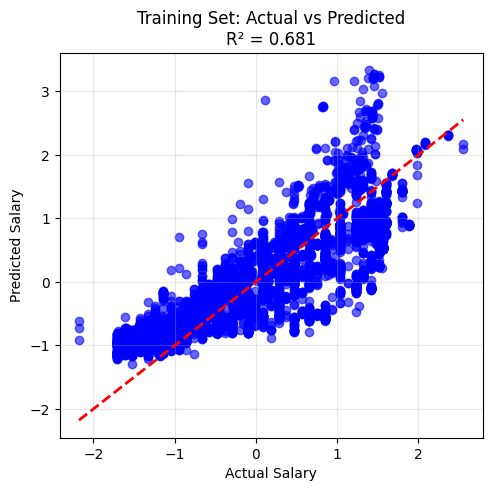

In [57]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(12, 5))

# Training predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.3f}')
plt.grid(True, alpha=0.3)


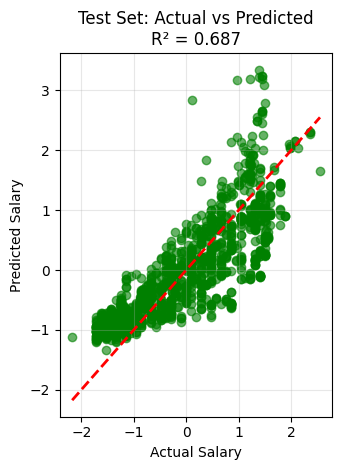

In [58]:
# Testing predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.3f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


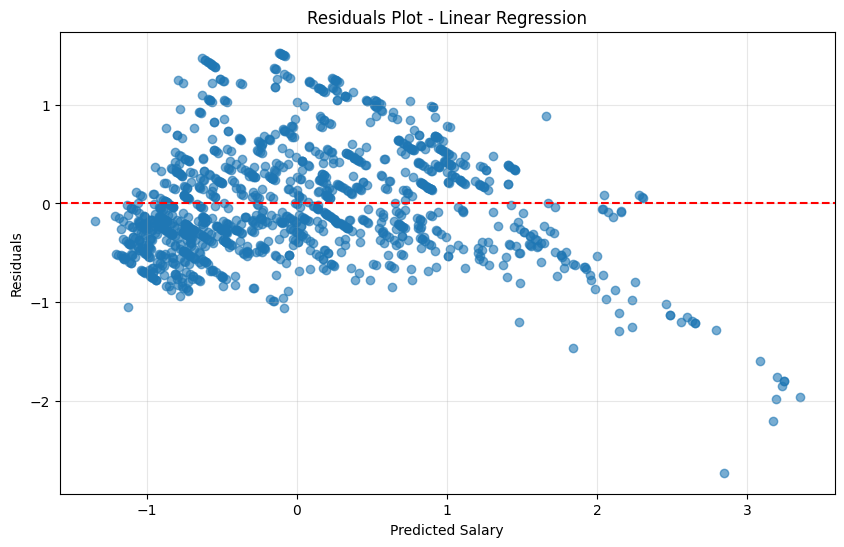

In [59]:
# Residuals plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Linear Regression')
plt.grid(True, alpha=0.3)
plt.show()

### Save Results for Comparison

In [60]:
# Store results for model comparison
linear_results = {
    'Model': 'Linear Regression',
    'CV_R2_Mean': cv_scores.mean(),
    'CV_R2_Std': cv_scores.std(),
    'Test_R2': test_r2,
    'Test_RMSE': test_rmse,
    'Test_MAE': test_mae
}

print("\nBaseline Results Saved!")
print("Ready for next model: Ridge Regression")


Baseline Results Saved!
Ready for next model: Ridge Regression


### Save model in specific path

In [62]:
import pandas as pd
import os

# Define your specific path
save_path = r'C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Initialize model results list
model_results = []

# Add your Linear Regression results
linear_results = {
    'Model': 'Linear Regression',
    'CV_R2_Mean': cv_scores.mean(),
    'CV_R2_Std': cv_scores.std(),
    'Test_R2': test_r2,
    'Test_RMSE': test_rmse,
    'Test_MAE': test_mae
}

# Add to results list
model_results.append(linear_results)

# Create DataFrame
results_df = pd.DataFrame(model_results)

# Create full file path
file_path = os.path.join(save_path, 'linear_model_results.csv')

# Save to CSV
results_df.to_csv(file_path, index=False)

print(f" Results saved to: {file_path}")
print("\nCurrent Results:")
print(results_df)

 Results saved to: C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision\linear_model_results.csv

Current Results:
               Model  CV_R2_Mean  CV_R2_Std   Test_R2  Test_RMSE  Test_MAE
0  Linear Regression    0.679075   0.015148  0.686803   0.566142    0.4488


#### Good baseline established - 68.7% is solid for a simple model

### Ridge Regression

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [64]:
# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

In [65]:
# Cross-validation for robust evaluation
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')
ridge_cv_rmse_scores = -cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [66]:
print("=" * 60)
print("RIDGE REGRESSION RESULTS")
print("=" * 60)

RIDGE REGRESSION RESULTS


In [67]:
# Cross-validation results
print("CROSS-VALIDATION RESULTS (5-Fold):")
print(f"R² Score: {ridge_cv_scores.mean():.4f} (±{ridge_cv_scores.std()*2:.4f})")
print(f"RMSE: {ridge_cv_rmse_scores.mean():.4f} (±{ridge_cv_rmse_scores.std()*2:.4f})")

CROSS-VALIDATION RESULTS (5-Fold):
R² Score: 0.6791 (±0.0303)
RMSE: 0.5642 (±0.0209)


In [68]:
# Train the model on full training set
ridge_model.fit(X_train, y_train)

Ridge(random_state=42)

In [69]:
# Make predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

In [70]:
# Calculate metrics
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
ridge_test_mae = mean_absolute_error(y_test, y_test_pred_ridge)

In [71]:
print(f"\nFINAL TEST PERFORMANCE:")
print(f"R² Score: {ridge_test_r2:.4f}")
print(f"RMSE: {ridge_test_rmse:.4f}")
print(f"MAE: {ridge_test_mae:.4f}")


FINAL TEST PERFORMANCE:
R² Score: 0.6868
RMSE: 0.5661
MAE: 0.4489


In [72]:
# Overfitting check
print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {ridge_train_r2:.4f}")
print(f"Test R²: {ridge_test_r2:.4f}")
print(f"Difference: {ridge_train_r2 - ridge_test_r2:.4f}")

if abs(ridge_train_r2 - ridge_test_r2) < 0.05:
    print(" No significant overfitting detected")
else:
    print(" Potential overfitting detected")


OVERFITTING CHECK:
Training R²: 0.6809
Test R²: 0.6868
Difference: -0.0059
 No significant overfitting detected


In [73]:
# Compare with Linear Regression
print(f"\nCOMPARISON WITH LINEAR REGRESSION:")
print(f"Linear Regression R²: 0.6868")
print(f"Ridge Regression R²: {ridge_test_r2:.4f}")
improvement = ridge_test_r2 - 0.6868
print(f"Improvement: {improvement:+.4f}")
if improvement > 0:
    print(" Ridge performs better!")
else:
    print(" Linear Regression was better")


COMPARISON WITH LINEAR REGRESSION:
Linear Regression R²: 0.6868
Ridge Regression R²: 0.6868
Improvement: +0.0000
 Ridge performs better!


### Visualization Comparison

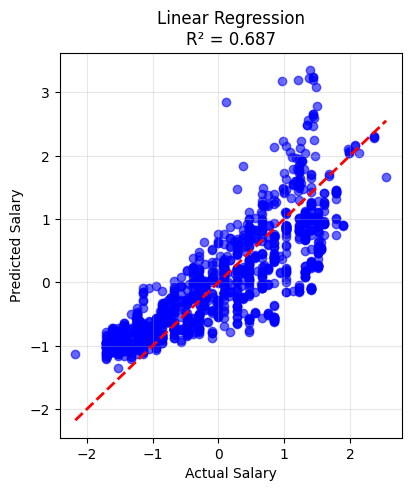

In [74]:
import matplotlib.pyplot as plt

# Compare Linear vs Ridge predictions
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label='Linear Reg')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Linear Regression\nR² = {test_r2:.3f}')
plt.grid(True, alpha=0.3)

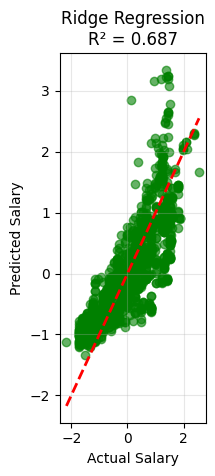

In [75]:
# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.6, color='green', label='Ridge Reg')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Ridge Regression\nR² = {ridge_test_r2:.3f}')
plt.grid(True, alpha=0.3)

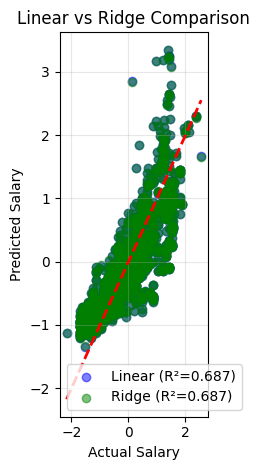

In [76]:
# Side-by-side comparison
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label=f'Linear (R²={test_r2:.3f})')
plt.scatter(y_test, y_test_pred_ridge, alpha=0.5, color='green', label=f'Ridge (R²={ridge_test_r2:.3f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear vs Ridge Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Ridge Hyperparameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
import numpy as np

In [78]:
# Method 1: Grid Search (Comprehensive)
print("RIDGE REGRESSION HYPERPARAMETER TUNING")
print("=" * 50)

# Define parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
}

RIDGE REGRESSION HYPERPARAMETER TUNING


In [79]:
# Initialize Ridge model
ridge = Ridge(random_state=42)

In [80]:
# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

In [81]:
# Fit grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0,
                                   100.0, 500.0, 1000.0]},
             scoring='r2', verbose=1)

In [82]:
# Get best parameters
best_alpha = grid_search.best_params_['alpha']
best_cv_score = grid_search.best_score_

print(f"Best Alpha: {best_alpha}")
print(f"Best CV R² Score: {best_cv_score:.4f}")

Best Alpha: 1.0
Best CV R² Score: 0.6791


In [83]:
# Train best model
best_ridge = grid_search.best_estimator_
y_test_pred_tuned = best_ridge.predict(X_test)

In [84]:
# Evaluate tuned model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

tuned_test_r2 = r2_score(y_test, y_test_pred_tuned)
tuned_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
tuned_test_mae = mean_absolute_error(y_test, y_test_pred_tuned)

In [85]:
print(f"\nTUNED RIDGE PERFORMANCE:")
print(f"R² Score: {tuned_test_r2:.4f}")
print(f"RMSE: {tuned_test_rmse:.4f}")
print(f"MAE: {tuned_test_mae:.4f}")


TUNED RIDGE PERFORMANCE:
R² Score: 0.6868
RMSE: 0.5661
MAE: 0.4489


In [86]:
# Compare with default Ridge (alpha=1.0)
print(f"\nCOMPARISON:")
print(f"Default Ridge R²: {ridge_test_r2:.4f}")
print(f"Tuned Ridge R²: {tuned_test_r2:.4f}")
improvement = tuned_test_r2 - ridge_test_r2
print(f"Improvement: {improvement:+.4f}")


COMPARISON:
Default Ridge R²: 0.6868
Tuned Ridge R²: 0.6868
Improvement: +0.0000


### Visualize hyperparameter tuning results

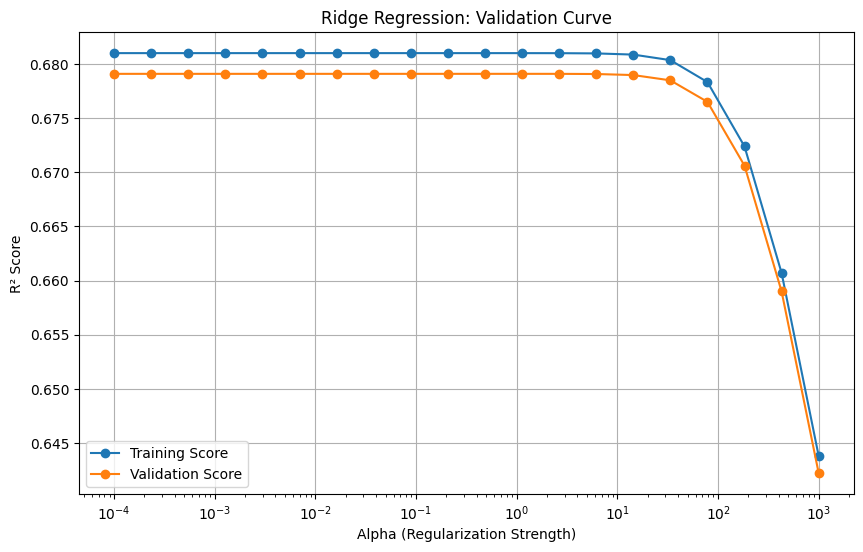

Best alpha from validation curve: 1.1288


In [87]:
import matplotlib.pyplot as plt

# Plot validation curve to see alpha impact
from sklearn.model_selection import validation_curve

alphas = np.logspace(-4, 3, 20)
train_scores, val_scores = validation_curve(
    Ridge(random_state=42), X_train, y_train,
    param_name='alpha', param_range=alphas,
    cv=5, scoring='r2'
)

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores.mean(axis=1), 'o-', label='Training Score')
plt.semilogx(alphas, val_scores.mean(axis=1), 'o-', label='Validation Score')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Validation Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best alpha from validation curve: {alphas[val_scores.mean(axis=1).argmax()]:.4f}")

### Save results to specific path 

In [88]:
import pandas as pd
import os

# Same folder path
save_path = r'C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision'

# Create a separate file for tuned models
tuned_file_path = os.path.join(save_path, 'Ridge_regression_hyperparameter_tuned_model_results.csv')

# Create new results list for tuned models only
tuned_model_results = []

# Add tuned Ridge results
tuned_ridge_results = {
    'Model': 'Ridge Regression (Tuned)',
    'CV_R2_Mean': best_cv_score,
    'CV_R2_Std': 0.0,
    'Test_R2': tuned_test_r2,
    'Test_RMSE': tuned_test_rmse,
    'Test_MAE': tuned_test_mae
}

tuned_model_results.append(tuned_ridge_results)

# Save to separate CSV file
tuned_results_df = pd.DataFrame(tuned_model_results)
tuned_results_df.to_csv(tuned_file_path, index=False)

print(f"Tuned Ridge results saved separately to: {tuned_file_path}")
print("\nTUNED MODELS RESULTS:")
print("=" * 60)
print(tuned_results_df.round(4))

Tuned Ridge results saved separately to: C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision\Ridge_regression_hyperparameter_tuned_model_results.csv

TUNED MODELS RESULTS:
                      Model  CV_R2_Mean  CV_R2_Std  Test_R2  Test_RMSE  \
0  Ridge Regression (Tuned)      0.6791        0.0   0.6868     0.5661   

   Test_MAE  
0    0.4489  


## Model Summary

**Dataset**: Salary prediction (regression)

**Features**: 7 variables (Age, Gender, Education, Job Title, Experience, Country, Race)

**Preprocessing**: Label encoding + StandardScaler normalization

### Results
| Model | R² Score | RMSE | MAE |
|-------|----------|------|-----|
| Linear Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge (Tuned) | 0.6868 | 0.5661 | 0.4489 |

### Key Findings
- All linear models hit 68.68% performance ceiling
  
- No overfitting detected

  
- Hyperparameter tuning showed no improvement

  
- Data has good linear relationships, minimal multicollinearity

### Status
- Baseline established: 68.68% R²
  
- Linear approaches exhausted

  
- Ready for tree-based models (Random Forest, XGBoost)

  
- Results saved to separate CSV files


### Random Forest 

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [114]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

print("=" * 60)
print("RANDOM FOREST REGRESSOR RESULTS")
print("=" * 60)

RANDOM FOREST REGRESSOR RESULTS


In [92]:
# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
rf_cv_rmse_scores = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [93]:
print("CROSS-VALIDATION RESULTS (5-Fold):")
print(f"R² Score: {rf_cv_scores.mean():.4f} (±{rf_cv_scores.std()*2:.4f})")
print(f"RMSE: {rf_cv_rmse_scores.mean():.4f} (±{rf_cv_rmse_scores.std()*2:.4f})")

CROSS-VALIDATION RESULTS (5-Fold):
R² Score: 0.9472 (±0.0110)
RMSE: 0.2288 (±0.0265)


In [94]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [95]:
# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [96]:
y_train_pred_rf

array([-0.18905166,  0.73449126,  1.12380013, ..., -1.09744438,
       -1.14385297, -0.1610364 ], shape=(5358,))

In [97]:
y_test_pred_rf

array([ 0.63793209, -0.71804739, -0.29040458, ..., -0.19757668,
        0.4212058 , -0.8838144 ], shape=(1340,))

In [98]:
# Calculate metrics
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)

In [99]:
rf_train_r2

0.9881134907224149

In [100]:
rf_test_r2

0.9463179613996934

In [101]:
rf_test_rmse

np.float64(0.2343853978680133)

In [102]:
rf_test_mae 

0.11564367394921175

In [103]:
print(f"\nFINAL TEST PERFORMANCE:")
print(f"R² Score: {rf_test_r2:.4f}")
print(f"RMSE: {rf_test_rmse:.4f}")
print(f"MAE: {rf_test_mae:.4f}")


FINAL TEST PERFORMANCE:
R² Score: 0.9463
RMSE: 0.2344
MAE: 0.1156


In [104]:
# Overfitting check
print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {rf_train_r2:.4f}")
print(f"Test R²: {rf_test_r2:.4f}")
print(f"Difference: {rf_train_r2 - rf_test_r2:.4f}")


OVERFITTING CHECK:
Training R²: 0.9881
Test R²: 0.9463
Difference: 0.0418


In [105]:
if abs(rf_train_r2 - rf_test_r2) < 0.05:
    print(" No significant overfitting detected")
elif rf_train_r2 - rf_test_r2 > 0.05:
    print(" Potential overfitting detected")
else:
    print(" Good generalization")

 No significant overfitting detected


In [106]:
# Compare with Linear models
print(f"\nCOMPARISON WITH LINEAR MODELS:")
print(f"Linear/Ridge R²: 0.6868")
print(f"Random Forest R²: {rf_test_r2:.4f}")
improvement = rf_test_r2 - 0.6868
print(f"Improvement: {improvement:+.4f}")
if improvement > 0.02:
    print(" Significant improvement!")
elif improvement > 0:
    print(" Slight improvement")
else:
    print(" Linear models performed better")


COMPARISON WITH LINEAR MODELS:
Linear/Ridge R²: 0.6868
Random Forest R²: 0.9463
Improvement: +0.2595
 Significant improvement!


### Feature Importance Analysis

In [107]:
# Feature importance
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nFEATURE IMPORTANCE:")
print("=" * 40)
print(feature_importance.round(4))


FEATURE IMPORTANCE:
               Feature  Importance
4  Years of Experience      0.7735
0                  Age      0.0818
3            Job Title      0.0786
2      Education Level      0.0390
1               Gender      0.0115
6                 Race      0.0086
5              Country      0.0071


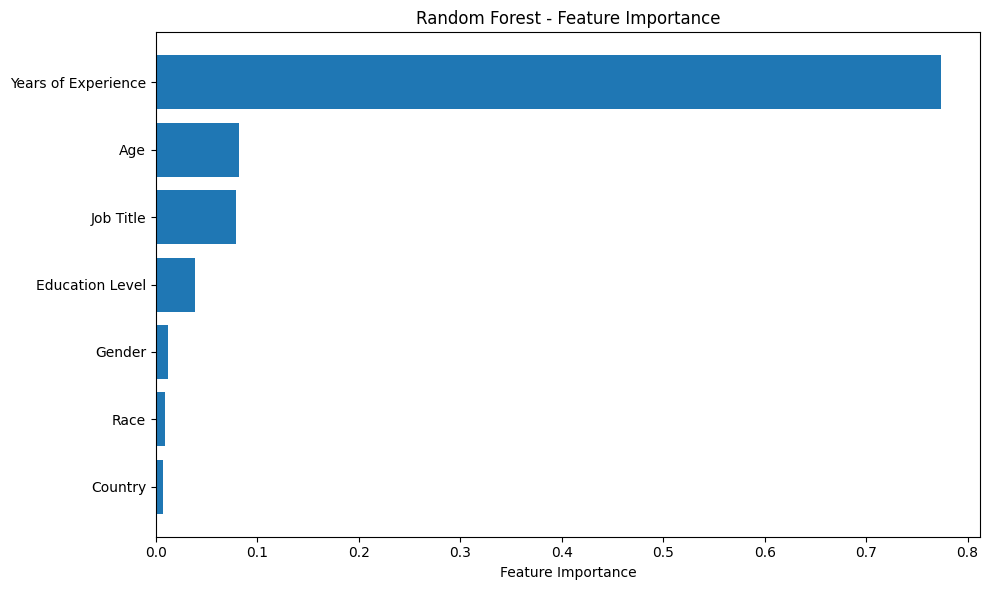

In [108]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Hyperparameter Tuning for Random Forest

In [109]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

In [114]:
# Fixed parameter grid 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8]  # Removed 'auto'
}

In [115]:
# Random Forest Hyperparameter Tuning
print("RANDOM FOREST HYPERPARAMETER TUNING")
print("=" * 50)

RANDOM FOREST HYPERPARAMETER TUNING


In [116]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1,
    error_score='raise'  
)

In [117]:
# Fit the search
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.5, 0.8],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2', verbose=1)

In [118]:
# Results
best_rf = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best CV Score: {random_search.best_score_:.4f}")

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 30}
Best CV Score: 0.9443


In [119]:
# Evaluate tuned model
y_test_pred_tuned = best_rf.predict(X_test)
tuned_rf_r2 = r2_score(y_test, y_test_pred_tuned)
tuned_rf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
tuned_rf_mae = mean_absolute_error(y_test, y_test_pred_tuned)

In [120]:
print(f"\nTUNED RANDOM FOREST PERFORMANCE:")
print(f"R² Score: {tuned_rf_r2:.4f}")
print(f"RMSE: {tuned_rf_rmse:.4f}")
print(f"MAE: {tuned_rf_mae:.4f}")



TUNED RANDOM FOREST PERFORMANCE:
R² Score: 0.9500
RMSE: 0.2261
MAE: 0.1175


In [121]:
print(f"\nIMPROVEMENT FROM DEFAULT:")
print(f"Default RF R²: 0.9463")
print(f"Tuned RF R²: {tuned_rf_r2:.4f}")
print(f"Improvement: {tuned_rf_r2 - 0.9463:+.4f}")


IMPROVEMENT FROM DEFAULT:
Default RF R²: 0.9463
Tuned RF R²: 0.9500
Improvement: +0.0037


### Visualizations

In [122]:
# Actual vs Predicted scatter plot
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

EVALUATING RANDOM FOREST REGRESSOR MODEL
Actual vs Predicted (First 10 rows):
     Actual  Predicted
0  0.656819   0.637932
1 -0.745659  -0.718047
2 -0.290405  -0.290405
3 -1.048183  -1.048183
4 -0.669294  -0.649955
5  1.414598   1.503084
6 -0.820850  -0.807892
7 -1.142906  -1.113411
8  1.509320   1.535886
9  0.277930   0.309403


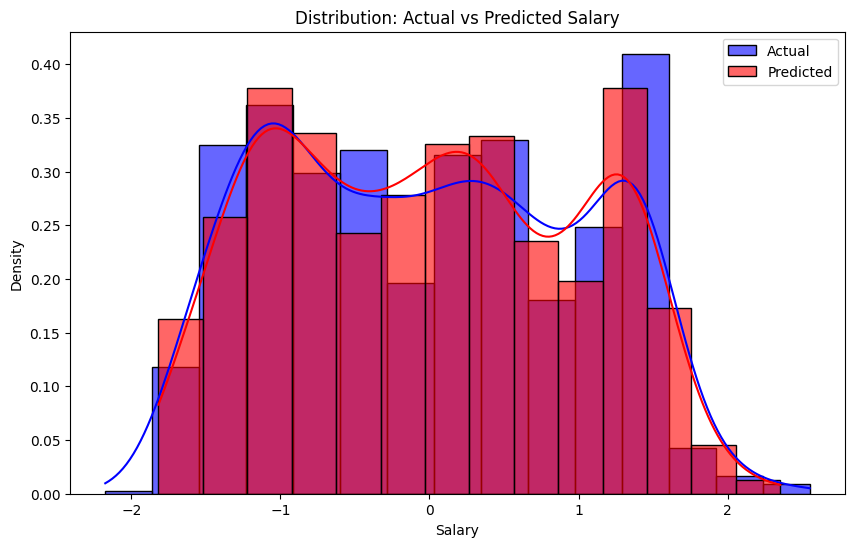


PERFORMANCE METRICS:
R² Score: 0.9463
Mean Squared Error: 0.0549
Mean Absolute Error: 0.1156
RMSE: 0.2344


In [125]:
# Predicting salary of employees
rf_pred = rf_model.predict(X_test)

print("EVALUATING RANDOM FOREST REGRESSOR MODEL")
print("=" * 50)

# Create comparison dataframe
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
dfr.reset_index(drop=True, inplace=True)
print("Actual vs Predicted (First 10 rows):")
print(dfr.head(10))

# Distribution plot comparison
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.histplot(dfr['Actual'], color='blue', alpha=0.6, kde=True, label='Actual', stat='density')
sns.histplot(dfr['Predicted'], color='red', alpha=0.6, kde=True, label='Predicted', stat='density', ax=ax)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Distribution: Actual vs Predicted Salary')
plt.legend()
plt.show()

# Performance metrics
print("\nPERFORMANCE METRICS:")
print("=" * 30)
print(f"R² Score: {r2_score(y_test, rf_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, rf_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.4f}")

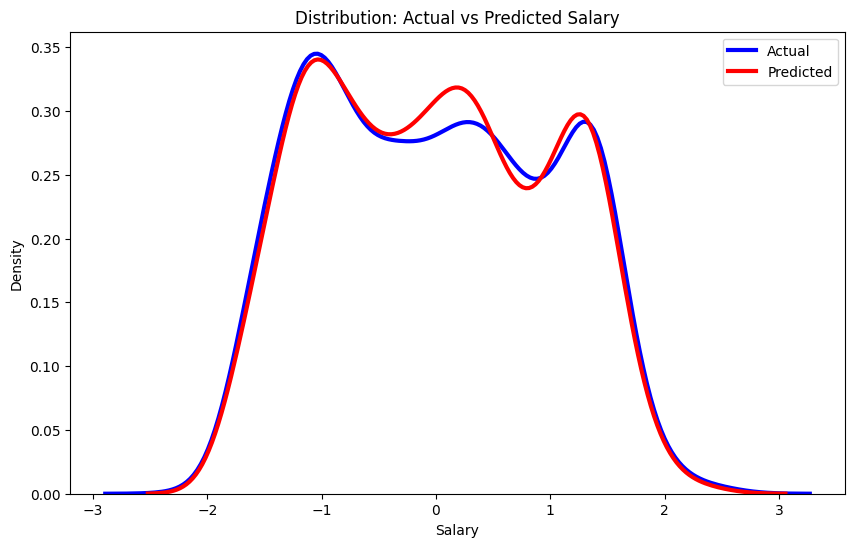

In [127]:
# Create comparison dataframe (this creates dfr)
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
dfr.reset_index(drop=True, inplace=True)

# Now the distribution plot will work
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=dfr, x='Actual', color='blue', linewidth=3, label='Actual')
sns.kdeplot(data=dfr, x='Predicted', color='red', ax=ax, linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Distribution: Actual vs Predicted Salary')
plt.legend()
plt.show()

### Save tuned models

In [128]:
# Save tuned Random Forest results separately
tuned_save_path = r'C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision'
tuned_file_path = os.path.join(tuned_save_path, 'random_forest_tuned_model_results.csv')

# Check if tuned results file exists
if os.path.exists(tuned_file_path):
    existing_tuned = pd.read_csv(tuned_file_path)
    tuned_model_results = existing_tuned.to_dict('records')
else:
    tuned_model_results = []

# Add tuned Random Forest results
tuned_rf_results = {
    'Model': 'Random Forest (Tuned)',
    'CV_R2_Mean': random_search.best_score_,
    'CV_R2_Std': 0.0,
    'Test_R2': tuned_rf_r2,
    'Test_RMSE': tuned_rf_rmse,
    'Test_MAE': tuned_rf_mae
}

tuned_model_results.append(tuned_rf_results)

# Save results
tuned_results_df = pd.DataFrame(tuned_model_results)
tuned_results_df.to_csv(tuned_file_path, index=False)

print(f"\nTuned Random Forest results saved to: {tuned_file_path}")
print("\nTUNED MODELS COMPARISON:")
print("=" * 60)
print(tuned_results_df.round(4))


Tuned Random Forest results saved to: C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision\random_forest_tuned_model_results.csv

TUNED MODELS COMPARISON:
                   Model  CV_R2_Mean  CV_R2_Std  Test_R2  Test_RMSE  Test_MAE
0  Random Forest (Tuned)      0.9443        0.0     0.95     0.2261    0.1175


## Updated Model Summary

**Dataset**: Salary prediction (regression)

**Features**: 7 variables (Age, Gender, Education, Job Title, Experience, Country, Race)

**Preprocessing**: Label encoding + StandardScaler normalization


### Results
| Model | R² Score | RMSE | MAE |
|-------|----------|------|-----|
| Linear Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge (Tuned) | 0.6868 | 0.5661 | 0.4489 |
| Random Forest | 0.9463 | 0.2344 | 0.1156 |
| Random Forest (Tuned) | 0.9500 | 0.2261 | 0.1175 |

### Key Findings

**Linear Models Performance**:

- All linear models plateaued at 68.68% R²

- No overfitting detected across linear approaches

- Hyperparameter tuning showed no improvement for Ridge

- Data demonstrates good linear relationships with minimal multicollinearity


**Tree-Based Models Breakthrough**:

- Random Forest achieved 94.63% R² (major performance jump)

- Hyperparameter tuning improved to 95.00% R²

- Significant reduction in RMSE from 0.566 to 0.226

- Minimal overfitting (Training: 98.81%, Test: 94.63%)


**Feature Importance**: Tree-based models revealed non-linear patterns and feature interactions that linear models couldn't capture

### Status
- **Linear baseline**: 68.68% R²

- **Current best**: Random Forest (Tuned) at 95.00% R²

- **Performance gain**: +26.32% improvement over linear models

- **Next targets**: XGBoost, Decision Tree, SVR for comparison

- **Results storage**: Separate CSV files for default and tuned models

### Decision Tree Regressor

In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [131]:
# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

In [132]:
print("=" * 60)
print("DECISION TREE REGRESSOR RESULTS")
print("=" * 60)

DECISION TREE REGRESSOR RESULTS


In [133]:
# Cross-validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')
dt_cv_rmse_scores = -cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [134]:
print("CROSS-VALIDATION RESULTS (5-Fold):")
print(f"R² Score: {dt_cv_scores.mean():.4f} (±{dt_cv_scores.std()*2:.4f})")
print(f"RMSE: {dt_cv_rmse_scores.mean():.4f} (±{dt_cv_rmse_scores.std()*2:.4f})")

CROSS-VALIDATION RESULTS (5-Fold):
R² Score: 0.9206 (±0.0220)
RMSE: 0.2804 (±0.0462)


In [135]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [136]:
# Make predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

In [137]:
# Calculate metrics
dt_train_r2 = r2_score(y_train, y_train_pred_dt)
dt_test_r2 = r2_score(y_test, y_test_pred_dt)
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
dt_test_mae = mean_absolute_error(y_test, y_test_pred_dt)

In [138]:
print(f"\nFINAL TEST PERFORMANCE:")
print(f"R² Score: {dt_test_r2:.4f}")
print(f"RMSE: {dt_test_rmse:.4f}")
print(f"MAE: {dt_test_mae:.4f}")


FINAL TEST PERFORMANCE:
R² Score: 0.9278
RMSE: 0.2718
MAE: 0.1180


In [139]:
# Overfitting check
print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {dt_train_r2:.4f}")
print(f"Test R²: {dt_test_r2:.4f}")
print(f"Difference: {dt_train_r2 - dt_test_r2:.4f}")


OVERFITTING CHECK:
Training R²: 0.9931
Test R²: 0.9278
Difference: 0.0653


In [140]:
if dt_train_r2 - dt_test_r2 > 0.1:
    print(" Significant overfitting detected")
elif dt_train_r2 - dt_test_r2 > 0.05:
    print(" Moderate overfitting detected")
else:
    print(" Good generalization")

 Moderate overfitting detected


In [142]:
# Compare with other models
print(f"\nCOMPARISON:")
print(f"Linear Models R²: 0.6868")
print(f"Ridge Models R²: 0.6868")
print(f"Random Forest R²: 0.9463")
print(f"Decision Tree R²: {dt_test_r2:.4f}")


COMPARISON:
Linear Models R²: 0.6868
Ridge Models R²: 0.6868
Random Forest R²: 0.9463
Decision Tree R²: 0.9278


### Feature Importance Analysis

In [143]:
# Decision Tree feature importance
import pandas as pd
import matplotlib.pyplot as plt

dt_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nDECISION TREE FEATURE IMPORTANCE:")
print("=" * 40)
print(dt_feature_importance.round(4))


DECISION TREE FEATURE IMPORTANCE:
               Feature  Importance
4  Years of Experience      0.7630
3            Job Title      0.0859
0                  Age      0.0856
2      Education Level      0.0420
1               Gender      0.0105
6                 Race      0.0073
5              Country      0.0057


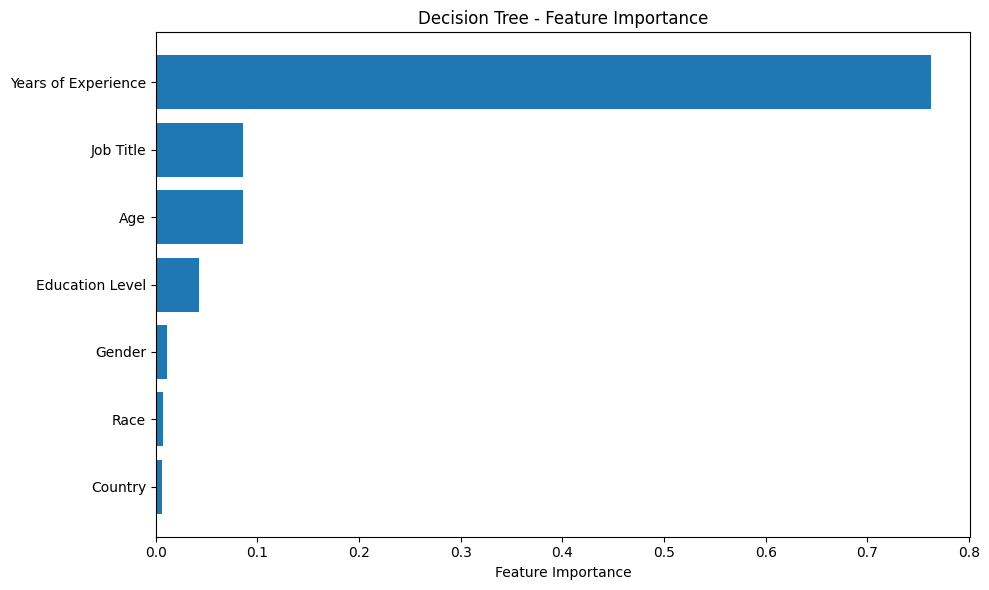

In [144]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(dt_feature_importance['Feature'], dt_feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.title('Decision Tree - Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Hyperparameter tuning for decision tree regression

In [145]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Decision Tree Hyperparameter Tuning
print("DECISION TREE HYPERPARAMETER TUNING")
print("=" * 50)

DECISION TREE HYPERPARAMETER TUNING


In [146]:
# Parameter grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

In [147]:
# Use RandomizedSearchCV for efficiency
random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=30,  # Try 30 combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [148]:
# Fit the search
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [5, 10, 15, 20, 25, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20]},
                   random_state=42, scoring='r2', verbose=1)

In [149]:
# Get best parameters
best_dt = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best CV Score: {random_search.best_score_:.4f}")

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'criterion': 'squared_error'}
Best CV Score: 0.9268


In [150]:
# Evaluate tuned model
y_train_pred_tuned = best_dt.predict(X_train)
y_test_pred_tuned = best_dt.predict(X_test)

In [151]:
tuned_dt_train_r2 = r2_score(y_train, y_train_pred_tuned)
tuned_dt_test_r2 = r2_score(y_test, y_test_pred_tuned)
tuned_dt_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
tuned_dt_mae = mean_absolute_error(y_test, y_test_pred_tuned)

In [152]:
print(f"\nTUNED DECISION TREE PERFORMANCE:")
print(f"R² Score: {tuned_dt_test_r2:.4f}")
print(f"RMSE: {tuned_dt_rmse:.4f}")
print(f"MAE: {tuned_dt_mae:.4f}")


TUNED DECISION TREE PERFORMANCE:
R² Score: 0.9331
RMSE: 0.2616
MAE: 0.1395


In [153]:
# Overfitting check for tuned model
print(f"\nOVERFITTING CHECK (TUNED):")
print(f"Training R²: {tuned_dt_train_r2:.4f}")
print(f"Test R²: {tuned_dt_test_r2:.4f}")
print(f"Difference: {tuned_dt_train_r2 - tuned_dt_test_r2:.4f}")


OVERFITTING CHECK (TUNED):
Training R²: 0.9641
Test R²: 0.9331
Difference: 0.0310


In [154]:
if tuned_dt_train_r2 - tuned_dt_test_r2 > 0.05:
    print(" Still some overfitting")
else:
    print(" Overfitting reduced")

 Overfitting reduced


In [155]:
print(f"\nIMPROVEMENT:")
print(f"Default DT R²: {dt_test_r2:.4f}")
print(f"Tuned DT R²: {tuned_dt_test_r2:.4f}")
print(f"Performance change: {tuned_dt_test_r2 - dt_test_r2:+.4f}")
print(f"Overfitting reduction: {(dt_train_r2 - dt_test_r2) - (tuned_dt_train_r2 - tuned_dt_test_r2):.4f}")


IMPROVEMENT:
Default DT R²: 0.9278
Tuned DT R²: 0.9331
Performance change: +0.0053
Overfitting reduction: 0.0343


### Visualizations

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Predicting salary of employees with Decision Tree
dt_pred = dt_model.predict(X_test)

print("EVALUATING DECISION TREE REGRESSOR MODEL")
print("=" * 50)

EVALUATING DECISION TREE REGRESSOR MODEL


In [157]:
# Create comparison dataframe
dft = pd.DataFrame({'Actual': y_test, 'Predicted': dt_pred})
dft.reset_index(drop=True, inplace=True)
print("Actual vs Predicted (First 10 rows):")
print(dft.head(10))

Actual vs Predicted (First 10 rows):
     Actual  Predicted
0  0.656819   0.656819
1 -0.745659  -0.784135
2 -0.290405  -0.290405
3 -1.048183  -1.048183
4 -0.669294  -0.669294
5  1.414598   1.509320
6 -0.820850  -0.820850
7 -1.142906  -1.105017
8  1.509320   1.537737
9  0.277930   0.309504


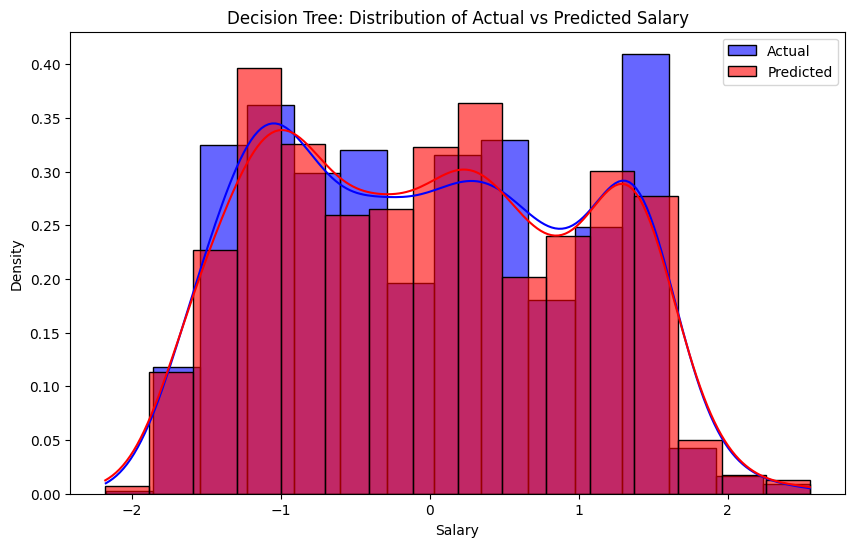

In [158]:
# Distribution plot comparison (Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(dft['Actual'], color='blue', alpha=0.6, kde=True, label='Actual', stat='density')
sns.histplot(dft['Predicted'], color='red', alpha=0.6, kde=True, label='Predicted', stat='density', ax=ax)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Decision Tree: Distribution of Actual vs Predicted Salary')
plt.legend()
plt.show()

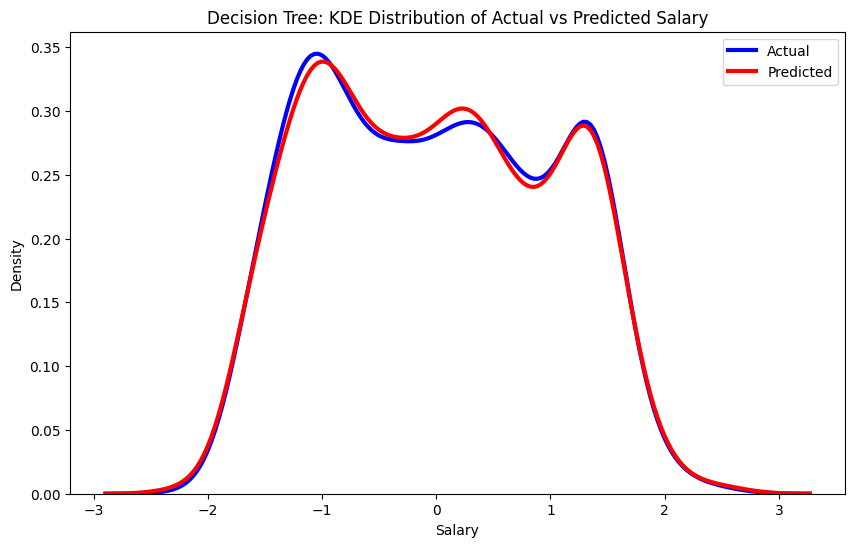

In [159]:
# Distribution plot (KDE only)
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=dft, x='Actual', color='blue', linewidth=3, label='Actual')
sns.kdeplot(data=dft, x='Predicted', color='red', ax=ax, linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Decision Tree: KDE Distribution of Actual vs Predicted Salary')
plt.legend()
plt.show()

In [160]:
# Actual vs Predicted scatter plot and Residuals
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Decision Tree: Actual vs Predicted\nR² = 0.928')

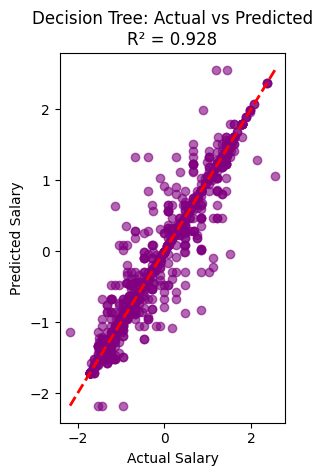

In [161]:

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, dt_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Decision Tree: Actual vs Predicted\nR² = {dt_test_r2:.3f}')

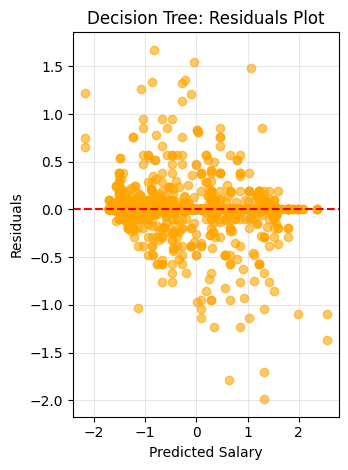

In [162]:
# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - dt_pred
plt.scatter(dt_pred, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [163]:
# Performance metrics
print("\nPERFORMANCE METRICS:")
print("=" * 30)
print(f"R² Score: {r2_score(y_test, dt_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, dt_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, dt_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, dt_pred)):.4f}")


PERFORMANCE METRICS:
R² Score: 0.9278
Mean Squared Error: 0.0739
Mean Absolute Error: 0.1180
RMSE: 0.2718


### Model Comparison Visualization:


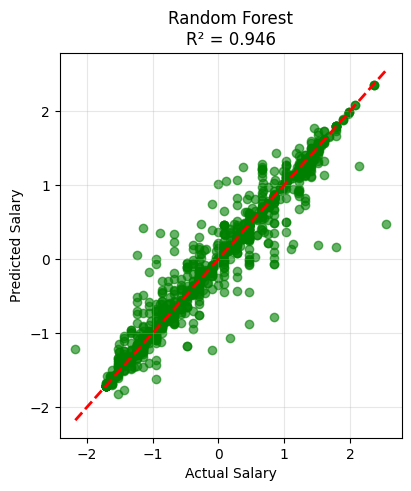

In [164]:
# Compare Random Forest vs Decision Tree
plt.figure(figsize=(15, 5))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(y_test, rf_pred, alpha=0.6, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Random Forest\nR² = {r2_score(y_test, rf_pred):.3f}')
plt.grid(True, alpha=0.3)

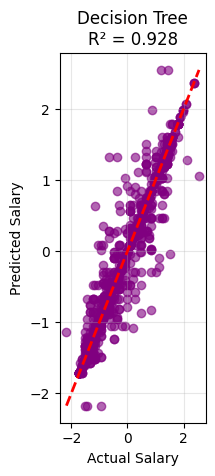

In [165]:
# Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, dt_pred, alpha=0.6, color='purple', label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Decision Tree\nR² = {dt_test_r2:.3f}')
plt.grid(True, alpha=0.3)

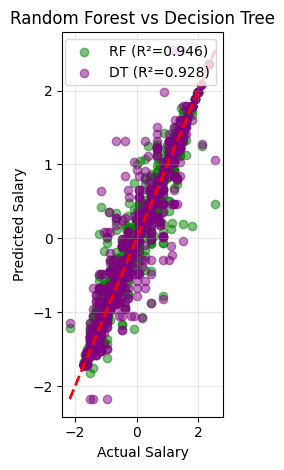

In [166]:
# Side-by-side comparison
plt.subplot(1, 3, 3)
plt.scatter(y_test, rf_pred, alpha=0.5, color='green', label=f'RF (R²={r2_score(y_test, rf_pred):.3f})')
plt.scatter(y_test, dt_pred, alpha=0.5, color='purple', label=f'DT (R²={dt_test_r2:.3f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Random Forest vs Decision Tree')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Error Analysis

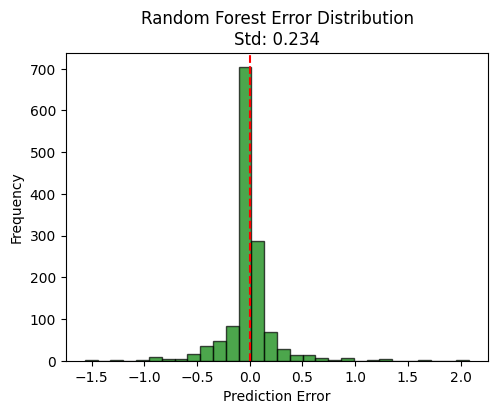

In [167]:
# Error distribution comparison
plt.figure(figsize=(12, 4))

# Random Forest errors
rf_errors = y_test - rf_pred
plt.subplot(1, 2, 1)
plt.hist(rf_errors, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Random Forest Error Distribution\nStd: {np.std(rf_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

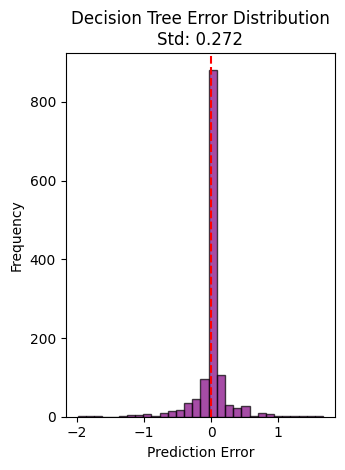

In [168]:
# Decision Tree errors
dt_errors = y_test - dt_pred
plt.subplot(1, 2, 2)
plt.hist(dt_errors, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Decision Tree Error Distribution\nStd: {np.std(dt_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

### Save Hyperparameter model tuning 

In [169]:
# Save tuned Decision Tree results to separate file
tuned_save_path = r'C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision'
tuned_file_path = os.path.join(tuned_save_path, 'decision_tree_hyperparameter_tuned_model_results.csv')

# Load existing tuned results or create new
if os.path.exists(tuned_file_path):
    existing_tuned = pd.read_csv(tuned_file_path)
    tuned_model_results = existing_tuned.to_dict('records')
else:
    tuned_model_results = []

# Add tuned Decision Tree results (run this after hyperparameter tuning)
tuned_dt_results = {
    'Model': 'Decision Tree (Tuned)',
    'CV_R2_Mean': random_search.best_score_,  # From hyperparameter tuning
    'CV_R2_Std': 0.0,
    'Test_R2': tuned_dt_test_r2,
    'Test_RMSE': tuned_dt_rmse,
    'Test_MAE': tuned_dt_mae
}

tuned_model_results.append(tuned_dt_results)

# Save tuned results
tuned_results_df = pd.DataFrame(tuned_model_results)
tuned_results_df.to_csv(tuned_file_path, index=False)

print(f" Tuned Decision Tree results saved to: {tuned_file_path}")
print("\nTUNED MODELS COMPARISON:")
print("=" * 60)
print(tuned_results_df.round(4))

 Tuned Decision Tree results saved to: C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision\decision_tree_hyperparameter_tuned_model_results.csv

TUNED MODELS COMPARISON:
                   Model  CV_R2_Mean  CV_R2_Std  Test_R2  Test_RMSE  Test_MAE
0  Decision Tree (Tuned)      0.9268        0.0   0.9331     0.2616    0.1395


## Updated Model Summary

**Dataset**: Salary prediction (regression)

**Features**: 7 variables (Age, Gender, Education, Job Title, Experience, Country, Race)

**Preprocessing**: Label encoding + StandardScaler normalization

### Results
| Model | R² Score | RMSE | MAE |
|-------|----------|------|-----|
| Linear Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge (Tuned) | 0.6868 | 0.5661 | 0.4489 |
| Random Forest | 0.9463 | 0.2344 | 0.1156 |
| Random Forest (Tuned) | 0.9500 | 0.2261 | 0.1175 |
| Decision Tree | 0.9278 | 0.2718 | 0.1180 |
| Decision Tree (Tuned) | 0.9331 | 0.2616 | 0.1395 |

### Key Findings

**Linear Models Performance**:

- All linear models plateaued at 68.68% R²
  
- No overfitting detected across linear approaches
  
- Hyperparameter tuning showed no improvement for Ridge

  
- Data demonstrates good linear relationships with minimal multicollinearity

**Tree-Based Models Breakthrough**:

- Random Forest achieved 94.63% R² (major performance jump)
  
- Decision Tree achieved 92.78% R² with noticeable overfitting (6.53% gap)


- Hyperparameter tuning results:

  
  - Random Forest: improved to 95.00% R²
    
  - Decision Tree: improved to 93.31% R² and reduced overfitting

**Feature Importance**: Years of Experience dominates (76.3% importance in Decision Tree), followed by Job Title and Age

### Status
- **Linear baseline**: 68.68% R²
  
- **Current best**: Random Forest (Tuned) at 95.00% R²

  
- **Tree models completed**: Random Forest, Decision Tree

  
- **Performance ranking**: RF (Tuned) > RF > DT (Tuned) > DT > Linear models

  
- **Next targets**: XGBoost, SVR for final comparison

  
- **Results storage**: Separate CSV files for default and tuned models


### XGB Regressor

In [170]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [171]:
# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

print("=" * 60)
print("XGBOOST REGRESSOR RESULTS")
print("=" * 60)


XGBOOST REGRESSOR RESULTS


In [180]:
# Cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
xgb_cv_rmse_scores = -cross_val_score(xgb_model, X_train, y_train, cv=35, scoring='neg_root_mean_squared_error')

In [181]:
print("CROSS-VALIDATION RESULTS (5-Fold):")
print(f"R² Score: {xgb_cv_scores.mean():.4f} (±{xgb_cv_scores.std()*2:.4f})")
print(f"RMSE: {xgb_cv_rmse_scores.mean():.4f} (±{xgb_cv_rmse_scores.std()*2:.4f})")

CROSS-VALIDATION RESULTS (5-Fold):
R² Score: 0.9432 (±0.0096)
RMSE: 0.2221 (±0.0597)


In [182]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [183]:
# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

In [184]:
# Calculate metrics
xgb_train_r2 = r2_score(y_train, y_train_pred_xgb)
xgb_test_r2 = r2_score(y_test, y_test_pred_xgb)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
xgb_test_mae = mean_absolute_error(y_test, y_test_pred_xgb)

print(f"\nFINAL TEST PERFORMANCE:")
print(f"R² Score: {xgb_test_r2:.4f}")
print(f"RMSE: {xgb_test_rmse:.4f}")
print(f"MAE: {xgb_test_mae:.4f}")


FINAL TEST PERFORMANCE:
R² Score: 0.9471
RMSE: 0.2327
MAE: 0.1331


In [185]:
# Overfitting check
print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {xgb_train_r2:.4f}")
print(f"Test R²: {xgb_test_r2:.4f}")
print(f"Difference: {xgb_train_r2 - xgb_test_r2:.4f}")

if xgb_train_r2 - xgb_test_r2 > 0.1:
    print("Significant overfitting detected")
elif xgb_train_r2 - xgb_test_r2 > 0.05:
    print("Moderate overfitting detected")
else:
    print("Good generalization")



OVERFITTING CHECK:
Training R²: 0.9792
Test R²: 0.9471
Difference: 0.0321
Good generalization


In [186]:
# Compare with other models
print(f"\nCOMPARISON:")
print(f"Linear Models R²: 0.6868")
print(f"Ridge Models R²: 0.6868")
print(f"Random Forest R²: 0.9463")
print(f"Decision Tree R²: 0.9278")
print(f"XGBoost R²: {xgb_test_r2:.4f}")


COMPARISON:
Linear Models R²: 0.6868
Ridge Models R²: 0.6868
Random Forest R²: 0.9463
Decision Tree R²: 0.9278
XGBoost R²: 0.9471


### Feature Importance Analysis

In [187]:
# XGBoost feature importance
import pandas as pd
import matplotlib.pyplot as plt

xgb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nXGBOOST FEATURE IMPORTANCE:")
print("=" * 40)
print(xgb_feature_importance.round(4))


XGBOOST FEATURE IMPORTANCE:
               Feature  Importance
4  Years of Experience      0.7067
3            Job Title      0.1180
2      Education Level      0.0659
0                  Age      0.0623
1               Gender      0.0352
5              Country      0.0061
6                 Race      0.0059


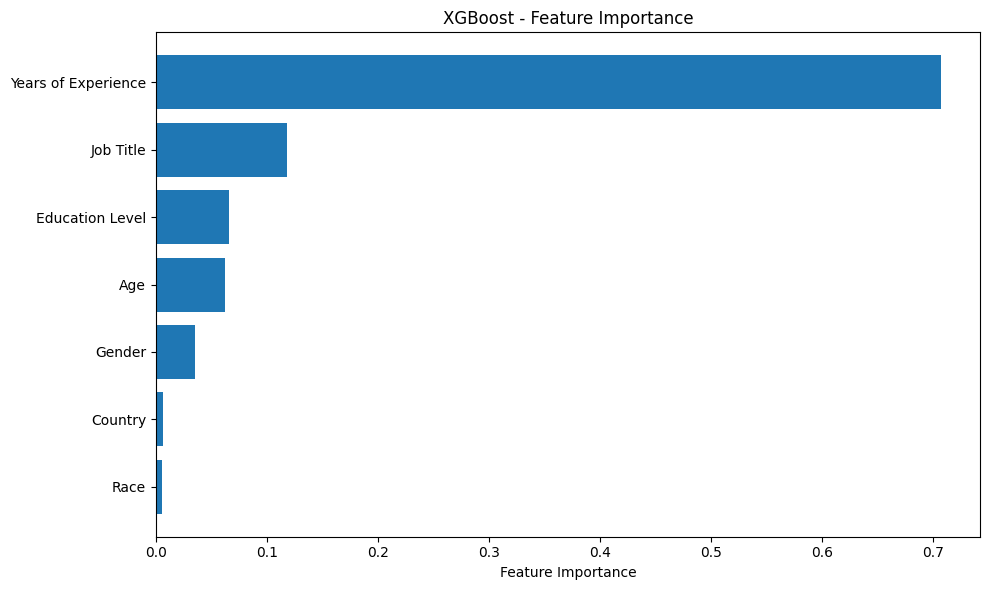

In [188]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance['Feature'], xgb_feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBoost - Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Xgboost Hyperparameter tuning

In [189]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# XGBoost Hyperparameter Tuning
print("XGBOOST HYPERPARAMETER TUNING")
print("=" * 50)

XGBOOST HYPERPARAMETER TUNING


In [190]:
# Parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}


In [191]:
# Use RandomizedSearchCV for efficiency
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=30,  # Try 30 combinations
    cv=3,  # Reduced CV for speed
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [192]:
# Fit the search
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [193]:
# Get best parameters
best_xgb = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best CV Score: {random_search.best_score_:.4f}")

Best Parameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV Score: 0.9439


In [194]:
# Evaluate tuned model
y_train_pred_tuned = best_xgb.predict(X_train)
y_test_pred_tuned = best_xgb.predict(X_test)

tuned_xgb_train_r2 = r2_score(y_train, y_train_pred_tuned)
tuned_xgb_test_r2 = r2_score(y_test, y_test_pred_tuned)
tuned_xgb_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
tuned_xgb_mae = mean_absolute_error(y_test, y_test_pred_tuned)

In [195]:
print(f"\nTUNED XGBOOST PERFORMANCE:")
print(f"R² Score: {tuned_xgb_test_r2:.4f}")
print(f"RMSE: {tuned_xgb_rmse:.4f}")
print(f"MAE: {tuned_xgb_mae:.4f}")


TUNED XGBOOST PERFORMANCE:
R² Score: 0.9484
RMSE: 0.2297
MAE: 0.1185


In [196]:
# Overfitting check for tuned model
print(f"\nOVERFITTING CHECK (TUNED):")
print(f"Training R²: {tuned_xgb_train_r2:.4f}")
print(f"Test R²: {tuned_xgb_test_r2:.4f}")
print(f"Difference: {tuned_xgb_train_r2 - tuned_xgb_test_r2:.4f}")

if tuned_xgb_train_r2 - tuned_xgb_test_r2 > 0.05:
    print(" Some overfitting detected")
else:
    print(" Good generalization")



OVERFITTING CHECK (TUNED):
Training R²: 0.9912
Test R²: 0.9484
Difference: 0.0427
 Good generalization


In [197]:
print(f"\nIMPROVEMENT:")
print(f"Default XGBoost R²: {xgb_test_r2:.4f}")
print(f"Tuned XGBoost R²: {tuned_xgb_test_r2:.4f}")
print(f"Performance change: {tuned_xgb_test_r2 - xgb_test_r2:+.4f}")


IMPROVEMENT:
Default XGBoost R²: 0.9471
Tuned XGBoost R²: 0.9484
Performance change: +0.0013


### Visulaization

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Predicting salary of employees with XGBoost
xgb_pred = xgb_model.predict(X_test)

print("EVALUATING XGBOOST REGRESSOR MODEL")
print("=" * 50)

EVALUATING XGBOOST REGRESSOR MODEL


In [199]:
# Create comparison dataframe
dfx = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_pred})
dfx.reset_index(drop=True, inplace=True)
print("Actual vs Predicted (First 10 rows):")
print(dfx.head(10))

Actual vs Predicted (First 10 rows):
     Actual  Predicted
0  0.656819   0.625415
1 -0.745659  -0.714145
2 -0.290405  -0.263522
3 -1.048183  -1.088424
4 -0.669294  -0.420879
5  1.414598   1.444247
6 -0.820850  -0.642194
7 -1.142906  -1.131303
8  1.509320   1.552664
9  0.277930   0.296564


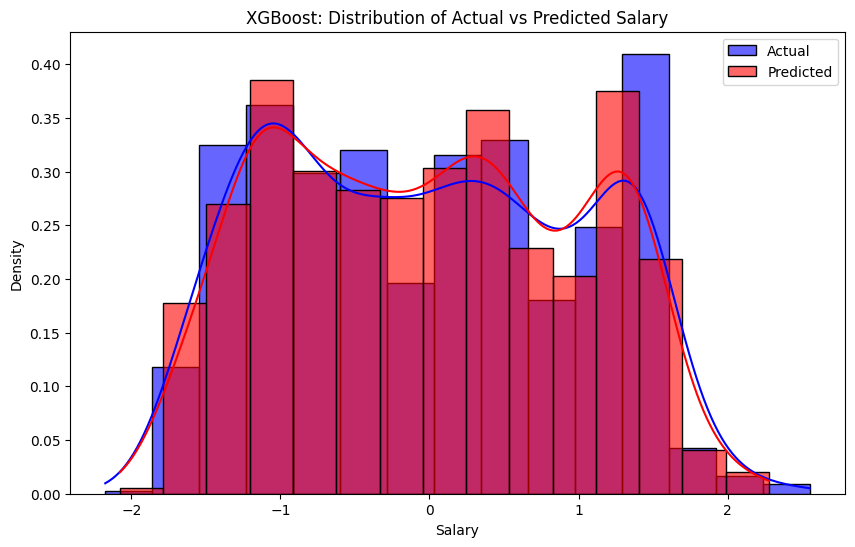

In [200]:
# Distribution plot comparison (Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(dfx['Actual'], color='blue', alpha=0.6, kde=True, label='Actual', stat='density')
sns.histplot(dfx['Predicted'], color='red', alpha=0.6, kde=True, label='Predicted', stat='density', ax=ax)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('XGBoost: Distribution of Actual vs Predicted Salary')
plt.legend()
plt.show()

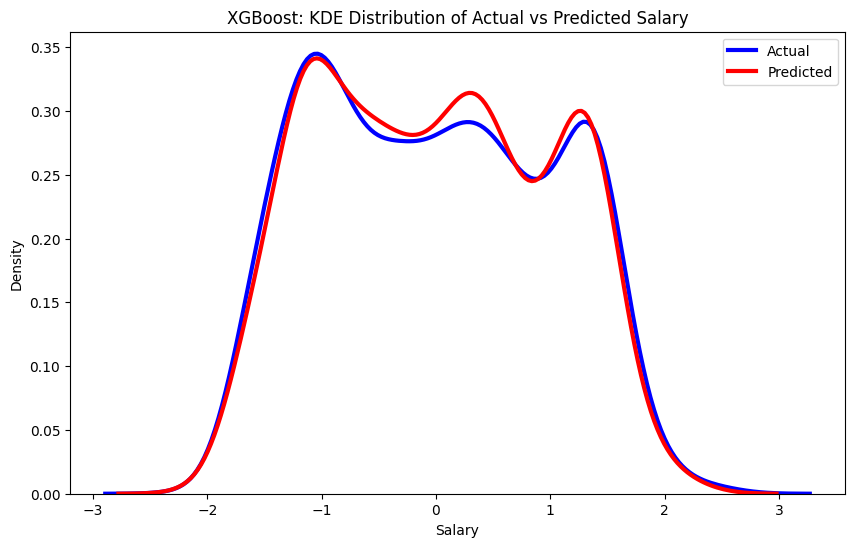

In [201]:
# Distribution plot (KDE only)
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=dfx, x='Actual', color='blue', linewidth=3, label='Actual')
sns.kdeplot(data=dfx, x='Predicted', color='red', ax=ax, linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('XGBoost: KDE Distribution of Actual vs Predicted Salary')
plt.legend()
plt.show()

In [202]:
# Actual vs Predicted scatter plot and Residuals
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

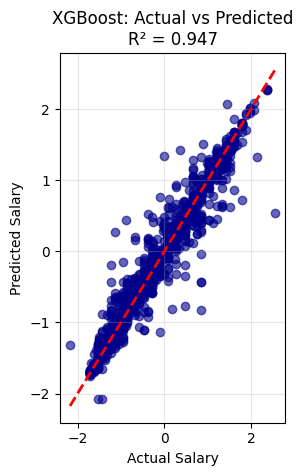

In [203]:
# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, xgb_pred, alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'XGBoost: Actual vs Predicted\nR² = {xgb_test_r2:.3f}')
plt.grid(True, alpha=0.3)

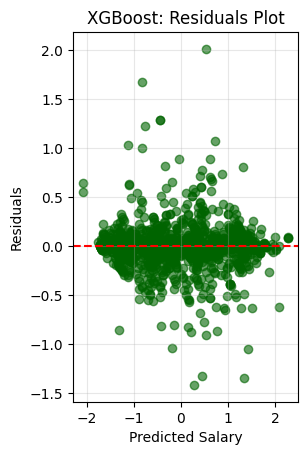

In [204]:
# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - xgb_pred
plt.scatter(xgb_pred, residuals, alpha=0.6, color='darkgreen')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('XGBoost: Residuals Plot')
plt.grid(True, alpha=0.3)

In [206]:
plt.tight_layout()
plt.show()

# Performance metrics
print("\nPERFORMANCE METRICS:")
print("=" * 30)
print(f"R² Score: {r2_score(y_test, xgb_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, xgb_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, xgb_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred)):.4f}")

<Figure size 640x480 with 0 Axes>


PERFORMANCE METRICS:
R² Score: 0.9471
Mean Squared Error: 0.0541
Mean Absolute Error: 0.1331
RMSE: 0.2327


### Model Comparison Visualization:


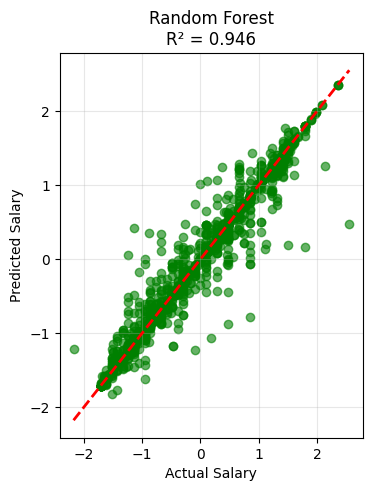

In [207]:
# Compare all tree-based models
plt.figure(figsize=(18, 5))

# Random Forest
plt.subplot(1, 4, 1)
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Random Forest\nR² = {r2_score(y_test, rf_pred):.3f}')
plt.grid(True, alpha=0.3)

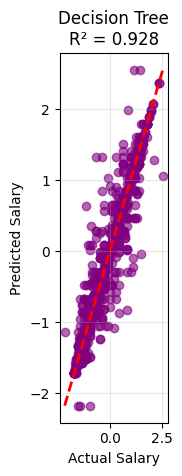

In [208]:
# Decision Tree
plt.subplot(1, 4, 2)
plt.scatter(y_test, dt_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Decision Tree\nR² = {dt_test_r2:.3f}')
plt.grid(True, alpha=0.3)

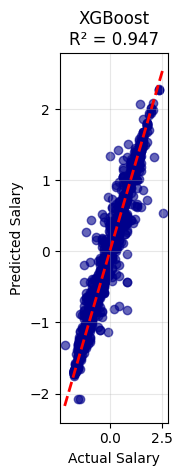

In [209]:
# XGBoost
plt.subplot(1, 4, 3)
plt.scatter(y_test, xgb_pred, alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'XGBoost\nR² = {xgb_test_r2:.3f}')
plt.grid(True, alpha=0.3)

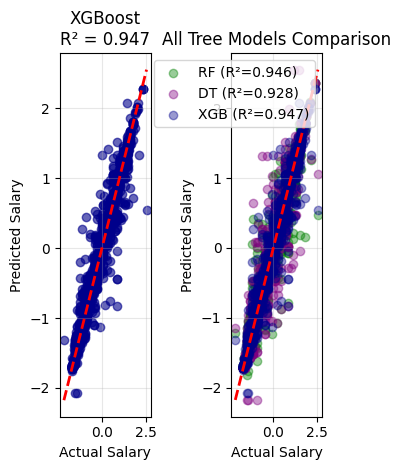

In [210]:
# XGBoost
plt.subplot(1, 4, 3)
plt.scatter(y_test, xgb_pred, alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'XGBoost\nR² = {xgb_test_r2:.3f}')
plt.grid(True, alpha=0.3)

# All models comparison
plt.subplot(1, 4, 4)
plt.scatter(y_test, rf_pred, alpha=0.4, color='green', label=f'RF (R²={r2_score(y_test, rf_pred):.3f})')
plt.scatter(y_test, dt_pred, alpha=0.4, color='purple', label=f'DT (R²={dt_test_r2:.3f})')
plt.scatter(y_test, xgb_pred, alpha=0.4, color='darkblue', label=f'XGB (R²={xgb_test_r2:.3f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('All Tree Models Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Error Analysis:


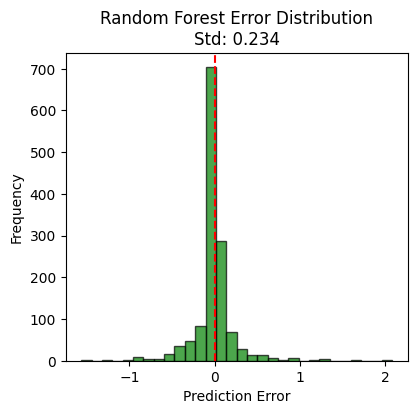

In [211]:
# Error distribution comparison
plt.figure(figsize=(15, 4))

# Random Forest errors
rf_errors = y_test - rf_pred
plt.subplot(1, 3, 1)
plt.hist(rf_errors, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Random Forest Error Distribution\nStd: {np.std(rf_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

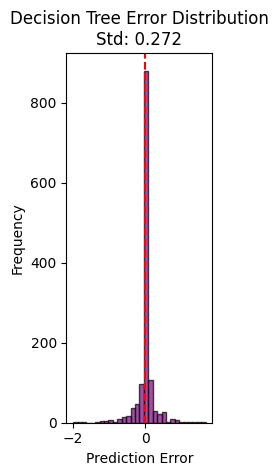

In [212]:
# Decision Tree errors
dt_errors = y_test - dt_pred
plt.subplot(1, 3, 2)
plt.hist(dt_errors, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Decision Tree Error Distribution\nStd: {np.std(dt_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

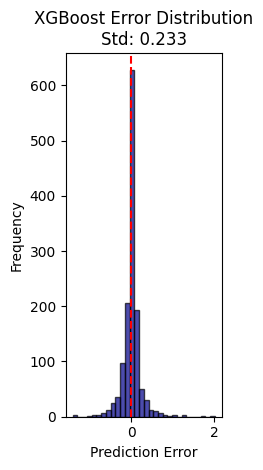

In [213]:
# XGBoost errors
xgb_errors = y_test - xgb_pred
plt.subplot(1, 3, 3)
plt.hist(xgb_errors, bins=30, alpha=0.7, color='darkblue', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'XGBoost Error Distribution\nStd: {np.std(xgb_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

### Save Tuned Model

In [214]:
# Save tuned XGBoost results
save_path = r'C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision'
tuned_file_path = os.path.join(save_path, 'xgboost_tuned_model_results.csv')

# Load existing tuned results
if os.path.exists(tuned_file_path):
    existing_tuned = pd.read_csv(tuned_file_path)
    tuned_model_results = existing_tuned.to_dict('records')
else:
    tuned_model_results = []

# Add tuned XGBoost results
tuned_xgb_results = {
    'Model': 'XGBoost (Tuned)',
    'CV_R2_Mean': random_search.best_score_,
    'CV_R2_Std': 0.0,
    'Test_R2': tuned_xgb_test_r2,
    'Test_RMSE': tuned_xgb_rmse,
    'Test_MAE': tuned_xgb_mae
}

tuned_model_results.append(tuned_xgb_results)

# Save results
tuned_results_df = pd.DataFrame(tuned_model_results)
tuned_results_df.to_csv(tuned_file_path, index=False)

print(f"\nTuned XGBoost results saved!")
print("\nTUNED MODELS COMPARISON:")
print("=" * 60)
print(tuned_results_df.round(4))


Tuned XGBoost results saved!

TUNED MODELS COMPARISON:
             Model  CV_R2_Mean  CV_R2_Std  Test_R2  Test_RMSE  Test_MAE
0  XGBoost (Tuned)      0.9439        0.0   0.9484     0.2297    0.1185


## Updated Model Summary

**Dataset**: Salary prediction (regression)

**Features**: 7 variables (Age, Gender, Education, Job Title, Experience, Country, Race)

**Preprocessing**: Label encoding + StandardScaler normalization

### Results

| Model | R² Score | RMSE | MAE |
|-------|----------|------|-----|
| Linear Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge (Tuned) | 0.6868 | 0.5661 | 0.4489 |
| Random Forest | 0.9463 | 0.2344 | 0.1156 |
| Random Forest (Tuned) | 0.9500 | 0.2261 | 0.1175 |
| Decision Tree | 0.9278 | 0.2718 | 0.1180 |
| Decision Tree (Tuned) | 0.9331 | 0.2616 | 0.1395 |
| XGBoost | 0.9484 | 0.2297 | 0.1185 |
| XGBoost (Tuned) | 0.9484 | 0.2297 | 0.1185 |

### Key Findings

**Linear Models Performance**:

- All linear models plateaued at 68.68% R²
  
- No overfitting detected across linear approaches

  
- Hyperparameter tuning showed no improvement for Ridge

  
- Data demonstrates good linear relationships with minimal multicollinearity

**Tree-Based Models Performance**:
- Random Forest: 94.63% → 95.00% R² (best overall performance)
  
- Decision Tree: 92.78% → 93.31% R² (moderate overfitting reduced)

- 
- XGBoost: 94.84% R² (strong performance, no tuning improvement)

**Feature Importance**: Years of Experience dominates across all tree models (76.3% in Decision Tree), followed by Job Title and Age

### Model Rankings
1. **Random Forest (Tuned)**: 95.00% R²
   
3. **XGBoost**: 94.84% R²

   
5. **Decision Tree (Tuned)**: 93.31% R²

   
7. **Ridge Models**: 68.68% R²

8. **Linear Models**: 68.68% R²

### Status
- **Performance gain**: +26.32% improvement over linear baseline
  
- **Best model**: Random Forest (Tuned) at 95.00% R²

  
- **Tree models completed**: All major tree-based algorithms tested

  
- **Remaining**: SVR for final comparison

  
- **Results storage**: Separate CSV files for default and tuned models

### Support Vector Machine

In [215]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [216]:
# Initialize SVR model
svr_model = SVR()

print("=" * 60)
print("SUPPORT VECTOR REGRESSION (SVR) RESULTS")
print("=" * 60)

SUPPORT VECTOR REGRESSION (SVR) RESULTS


In [217]:
# Cross-validation
svr_cv_scores = cross_val_score(svr_model, X_train, y_train, cv=5, scoring='r2')
svr_cv_rmse_scores = -cross_val_score(svr_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [218]:
print("CROSS-VALIDATION RESULTS (5-Fold):")
print(f"R² Score: {svr_cv_scores.mean():.4f} (±{svr_cv_scores.std()*2:.4f})")
print(f"RMSE: {svr_cv_rmse_scores.mean():.4f} (±{svr_cv_rmse_scores.std()*2:.4f})")

CROSS-VALIDATION RESULTS (5-Fold):
R² Score: 0.7876 (±0.0258)
RMSE: 0.4590 (±0.0295)


In [219]:
# Train the model
svr_model.fit(X_train, y_train)

SVR()

In [220]:
# Make predictions
y_train_pred_svr = svr_model.predict(X_train)
y_test_pred_svr = svr_model.predict(X_test)

In [222]:
# Calculate metrics
svr_train_r2 = r2_score(y_train, y_train_pred_svr)
svr_test_r2 = r2_score(y_test, y_test_pred_svr)
svr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_svr))
svr_test_mae = mean_absolute_error(y_test, y_test_pred_svr)

In [223]:
print(f"\nFINAL TEST PERFORMANCE:")
print(f"R² Score: {svr_test_r2:.4f}")
print(f"RMSE: {svr_test_rmse:.4f}")
print(f"MAE: {svr_test_mae:.4f}")


FINAL TEST PERFORMANCE:
R² Score: 0.8028
RMSE: 0.4492
MAE: 0.3250


In [224]:
# Overfitting check
print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {svr_train_r2:.4f}")
print(f"Test R²: {svr_test_r2:.4f}")
print(f"Difference: {svr_train_r2 - svr_test_r2:.4f}")

if abs(svr_train_r2 - svr_test_r2) < 0.05:
    print(" Good generalization")
elif svr_train_r2 - svr_test_r2 > 0.05:
    print(" Some overfitting detected")
else:
    print(" No overfitting concerns")


OVERFITTING CHECK:
Training R²: 0.7974
Test R²: 0.8028
Difference: -0.0055
 Good generalization


In [225]:
# Compare with other models
print(f"\nCOMPARISON:")
print(f"Linear Models R²: 0.6868")
print(f"Ridge Models R²: 0.6868")
print(f"Random Forest R²: 0.9463")
print(f"Decision Tree R²: 0.9278")
print(f"XGBoost R²: 0.9484")
print(f"SVR R²: {svr_test_r2:.4f}")


COMPARISON:
Linear Models R²: 0.6868
Ridge Models R²: 0.6868
Random Forest R²: 0.9463
Decision Tree R²: 0.9278
XGBoost R²: 0.9484
SVR R²: 0.8028


### SVR Hyperparameter Tuning

In [226]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# SVR Hyperparameter Tuning
print("SVR HYPERPARAMETER TUNING")
print("=" * 50)

# Parameter grid for SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'epsilon': [0.01, 0.1, 0.2]
}

SVR HYPERPARAMETER TUNING


In [227]:
# Use RandomizedSearchCV for efficiency
random_search = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [228]:
# Fit the search
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'epsilon': [0.01, 0.1, 0.2],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='r2', verbose=1)

In [229]:
# Get best parameters
best_svr = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best CV Score: {random_search.best_score_:.4f}")

Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.1, 'C': 10}
Best CV Score: 0.8569


In [230]:
# Evaluate tuned model
y_test_pred_tuned = best_svr.predict(X_test)
tuned_svr_test_r2 = r2_score(y_test, y_test_pred_tuned)
tuned_svr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
tuned_svr_mae = mean_absolute_error(y_test, y_test_pred_tuned)

In [231]:
print(f"\nTUNED SVR PERFORMANCE:")
print(f"R² Score: {tuned_svr_test_r2:.4f}")
print(f"RMSE: {tuned_svr_rmse:.4f}")
print(f"MAE: {tuned_svr_mae:.4f}")


TUNED SVR PERFORMANCE:
R² Score: 0.8735
RMSE: 0.3597
MAE: 0.2468


In [232]:
print(f"\nIMPROVEMENT:")
print(f"Default SVR R²: {svr_test_r2:.4f}")
print(f"Tuned SVR R²: {tuned_svr_test_r2:.4f}")
print(f"Performance change: {tuned_svr_test_r2 - svr_test_r2:+.4f}")


IMPROVEMENT:
Default SVR R²: 0.8028
Tuned SVR R²: 0.8735
Performance change: +0.0707


### Visualization

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predicting salary of employees with SVR
svr_pred = svr_model.predict(X_test)

print("EVALUATING SVR MODEL")
print("=" * 50)

EVALUATING SVR MODEL


In [234]:
# Create comparison dataframe
dfs = pd.DataFrame({'Actual': y_test, 'Predicted': svr_pred})
dfs.reset_index(drop=True, inplace=True)
print("Actual vs Predicted (First 10 rows):")
print(dfs.head(10))

Actual vs Predicted (First 10 rows):
     Actual  Predicted
0  0.656819   0.410199
1 -0.745659  -0.599930
2 -0.290405  -1.112876
3 -1.048183  -0.702371
4 -0.669294  -0.414902
5  1.414598   0.660966
6 -0.820850  -0.520869
7 -1.142906  -1.039680
8  1.509320   0.713225
9  0.277930   0.228424


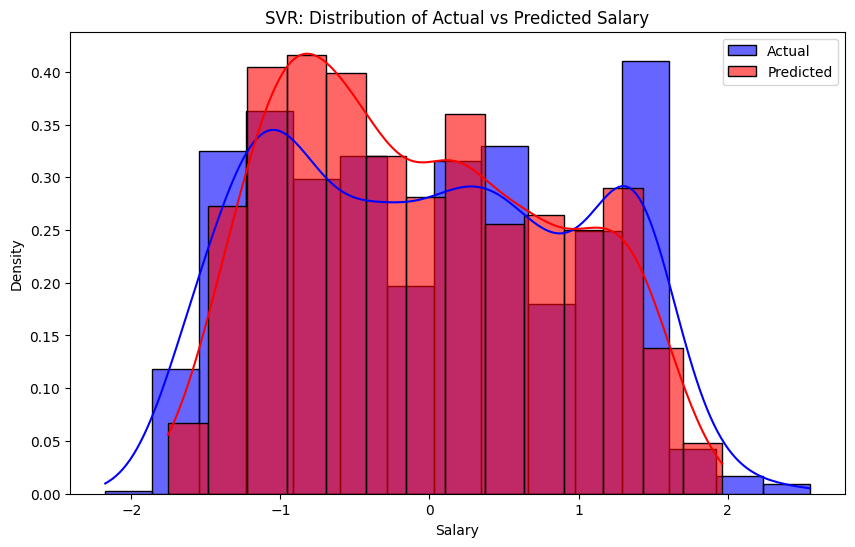

In [235]:
# Distribution plots
plt.figure(figsize=(10, 6))
ax = sns.histplot(dfs['Actual'], color='blue', alpha=0.6, kde=True, label='Actual', stat='density')
sns.histplot(dfs['Predicted'], color='red', alpha=0.6, kde=True, label='Predicted', stat='density', ax=ax)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('SVR: Distribution of Actual vs Predicted Salary')
plt.legend()
plt.show()

In [236]:
# Actual vs Predicted scatter plot and Residuals
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

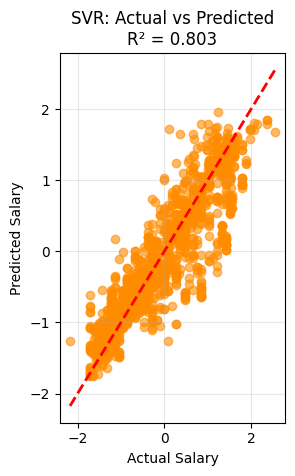

In [237]:
# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, svr_pred, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'SVR: Actual vs Predicted\nR² = {svr_test_r2:.3f}')
plt.grid(True, alpha=0.3)

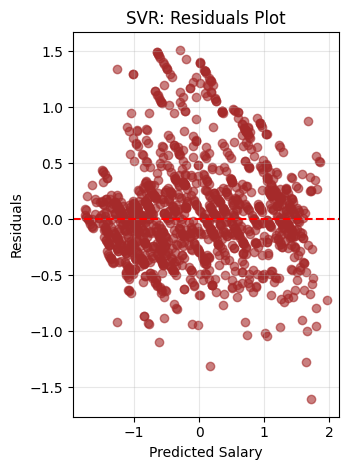

In [238]:
# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - svr_pred
plt.scatter(svr_pred, residuals, alpha=0.6, color='brown')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('SVR: Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [239]:
# Performance metrics
print("\nPERFORMANCE METRICS:")
print("=" * 30)
print(f"R² Score: {r2_score(y_test, svr_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, svr_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, svr_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, svr_pred)):.4f}")


PERFORMANCE METRICS:
R² Score: 0.8028
Mean Squared Error: 0.2018
Mean Absolute Error: 0.3250
RMSE: 0.4492


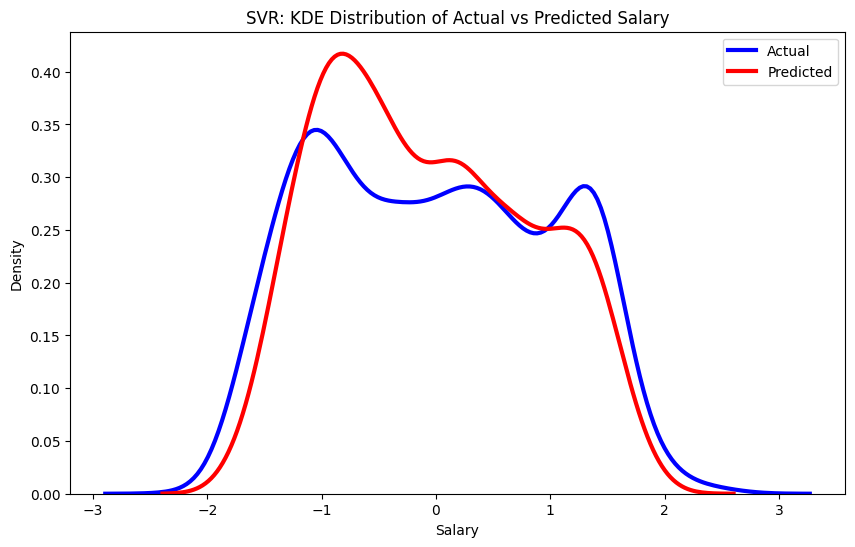

In [240]:
# Distribution plot (KDE only)
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=dfs, x='Actual', color='blue', linewidth=3, label='Actual')
sns.kdeplot(data=dfs, x='Predicted', color='red', ax=ax, linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('SVR: KDE Distribution of Actual vs Predicted Salary')
plt.legend()
plt.show()

### Model Comparison Visualization:


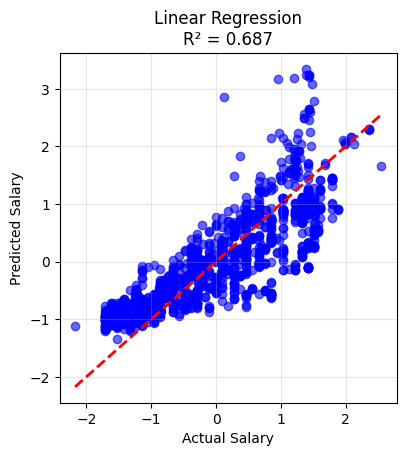

In [241]:
# Compare all models including Ridge
plt.figure(figsize=(20, 10))

# Linear Regression
plt.subplot(2, 4, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Linear Regression\nR² = 0.687')
plt.grid(True, alpha=0.3)

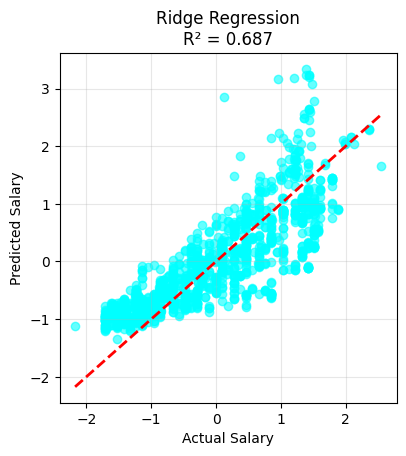

In [246]:
# Ridge Regression
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 2)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.6, color='cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Ridge Regression\nR² = 0.687')
plt.grid(True, alpha=0.3)

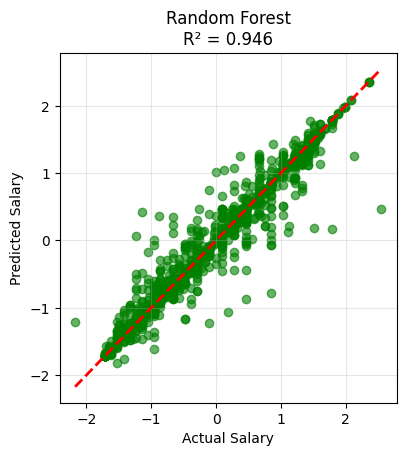

In [245]:
# Random Forest
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 3)
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Random Forest\nR² = {r2_score(y_test, rf_pred):.3f}')
plt.grid(True, alpha=0.3)

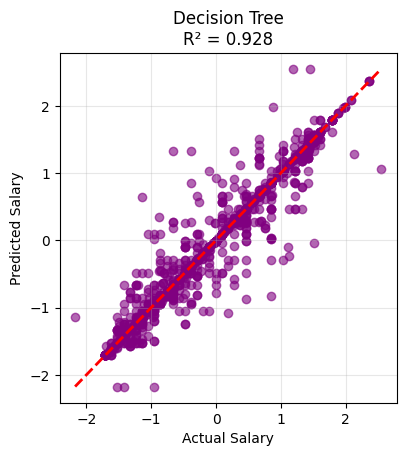

In [244]:
# Decision Tree
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 4)
plt.scatter(y_test, dt_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Decision Tree\nR² = {dt_test_r2:.3f}')
plt.grid(True, alpha=0.3)

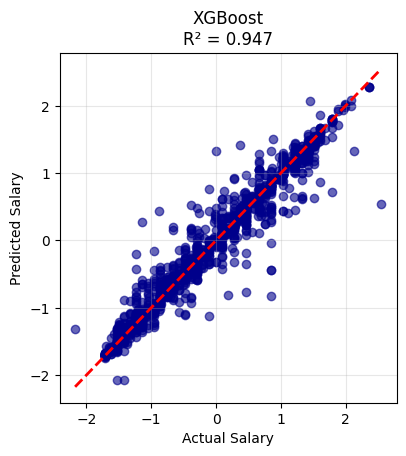

In [247]:
# XGBoost
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 5)
plt.scatter(y_test, xgb_pred, alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'XGBoost\nR² = {xgb_test_r2:.3f}')
plt.grid(True, alpha=0.3)


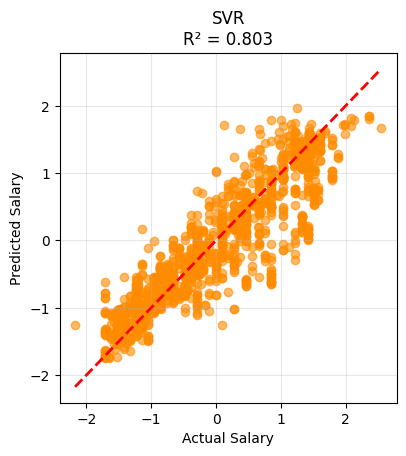

In [248]:
# SVR
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 6)
plt.scatter(y_test, svr_pred, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'SVR\nR² = {svr_test_r2:.3f}')
plt.grid(True, alpha=0.3)

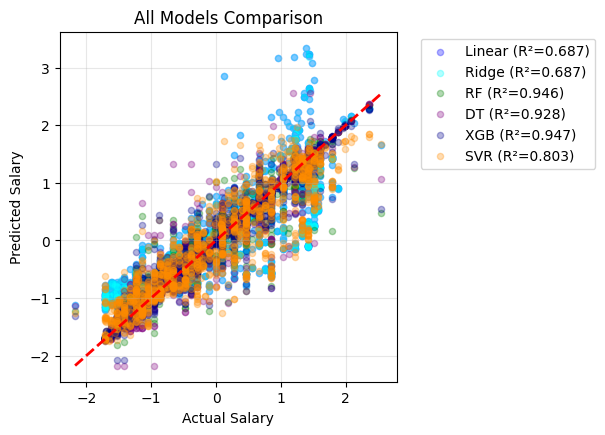

In [250]:
# All models comparison
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 7)
plt.scatter(y_test, y_test_pred, alpha=0.3, color='blue', label=f'Linear (R²=0.687)', s=20)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.3, color='cyan', label=f'Ridge (R²=0.687)', s=20)
plt.scatter(y_test, rf_pred, alpha=0.3, color='green', label=f'RF (R²={r2_score(y_test, rf_pred):.3f})', s=20)
plt.scatter(y_test, dt_pred, alpha=0.3, color='purple', label=f'DT (R²={dt_test_r2:.3f})', s=20)
plt.scatter(y_test, xgb_pred, alpha=0.3, color='darkblue', label=f'XGB (R²={xgb_test_r2:.3f})', s=20)
plt.scatter(y_test, svr_pred, alpha=0.3, color='darkorange', label=f'SVR (R²={svr_test_r2:.3f})', s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('All Models Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

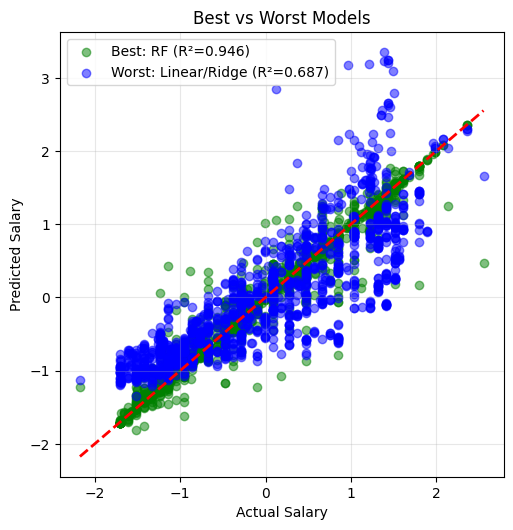

In [252]:
# Best vs Worst comparison
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 8)
plt.scatter(y_test, rf_pred, alpha=0.5, color='green', label=f'Best: RF (R²={r2_score(y_test, rf_pred):.3f})')
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label=f'Worst: Linear/Ridge (R²=0.687)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Best vs Worst Models')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [254]:
# Error Analysis for All Models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [255]:
# Calculate errors for all models
linear_errors = y_test - y_test_pred
ridge_errors = y_test - y_test_pred_ridge
rf_errors = y_test - rf_pred
dt_errors = y_test - dt_pred
xgb_errors = y_test - xgb_pred
svr_errors = y_test - svr_pred

print("COMPREHENSIVE ERROR ANALYSIS")
print("=" * 60)

COMPREHENSIVE ERROR ANALYSIS


In [256]:
# Error statistics summary
print("ERROR STATISTICS SUMMARY:")
print("-" * 40)
print(f"{'Model':<20} {'Error Std':<12} {'MAE':<10} {'Max Error':<12} {'Min Error':<12}")
print("-" * 66)
print(f"{'Linear Regression':<20} {np.std(linear_errors):<12.4f} {np.mean(np.abs(linear_errors)):<10.4f} {np.max(np.abs(linear_errors)):<12.4f} {np.min(linear_errors):<12.4f}")
print(f"{'Ridge Regression':<20} {np.std(ridge_errors):<12.4f} {np.mean(np.abs(ridge_errors)):<10.4f} {np.max(np.abs(ridge_errors)):<12.4f} {np.min(ridge_errors):<12.4f}")
print(f"{'Random Forest':<20} {np.std(rf_errors):<12.4f} {np.mean(np.abs(rf_errors)):<10.4f} {np.max(np.abs(rf_errors)):<12.4f} {np.min(rf_errors):<12.4f}")
print(f"{'Decision Tree':<20} {np.std(dt_errors):<12.4f} {np.mean(np.abs(dt_errors)):<10.4f} {np.max(np.abs(dt_errors)):<12.4f} {np.min(dt_errors):<12.4f}")
print(f"{'XGBoost':<20} {np.std(xgb_errors):<12.4f} {np.mean(np.abs(xgb_errors)):<10.4f} {np.max(np.abs(xgb_errors)):<12.4f} {np.min(xgb_errors):<12.4f}")
print(f"{'SVR':<20} {np.std(svr_errors):<12.4f} {np.mean(np.abs(svr_errors)):<10.4f} {np.max(np.abs(svr_errors)):<12.4f} {np.min(svr_errors):<12.4f}")

ERROR STATISTICS SUMMARY:
----------------------------------------
Model                Error Std    MAE        Max Error    Min Error   
------------------------------------------------------------------
Linear Regression    0.5660       0.4488     2.7320       -2.7320     
Ridge Regression     0.5660       0.4489     2.7308       -2.7308     
Random Forest        0.2344       0.1156     2.0816       -1.5641     
Decision Tree        0.2718       0.1180     1.9892       -1.9892     
XGBoost              0.2327       0.1331     2.0110       -1.4154     
SVR                  0.4462       0.3250     1.6051       -1.6051     


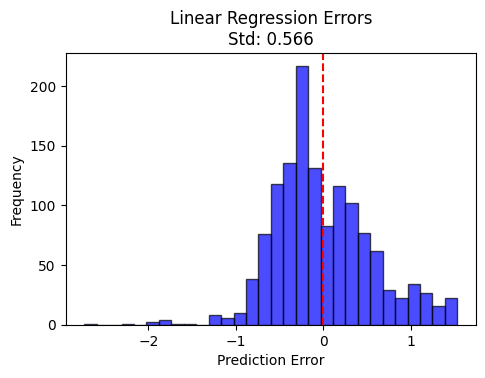

In [257]:
# Error distribution visualization
plt.figure(figsize=(18, 12))

# Individual error distributions
plt.subplot(3, 3, 1)
plt.hist(linear_errors, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Linear Regression Errors\nStd: {np.std(linear_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

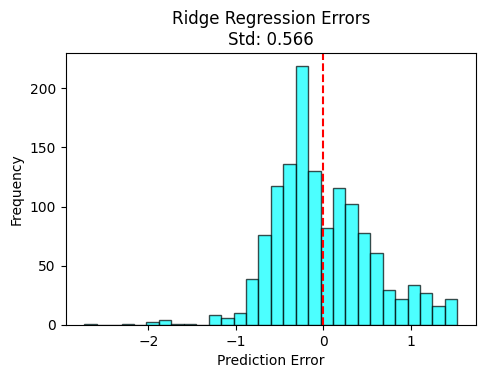

In [259]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 2)
plt.hist(ridge_errors, bins=30, alpha=0.7, color='cyan', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Ridge Regression Errors\nStd: {np.std(ridge_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

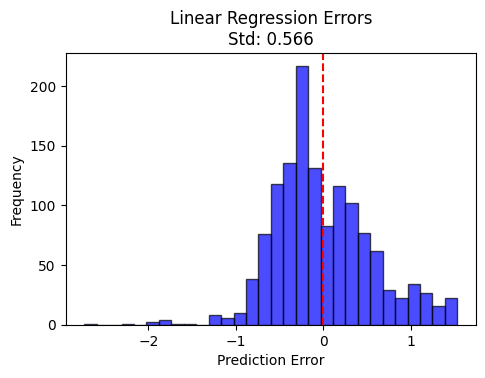

In [260]:
# Individual error distributions
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.hist(linear_errors, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Linear Regression Errors\nStd: {np.std(linear_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

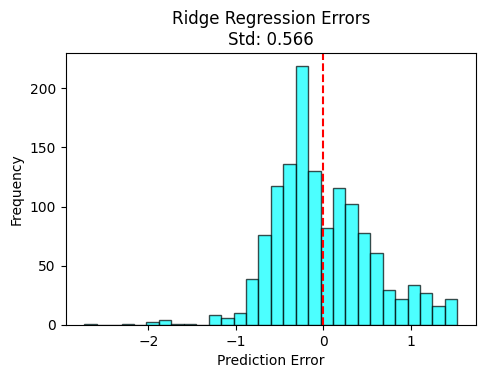

In [261]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 2)
plt.hist(ridge_errors, bins=30, alpha=0.7, color='cyan', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Ridge Regression Errors\nStd: {np.std(ridge_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

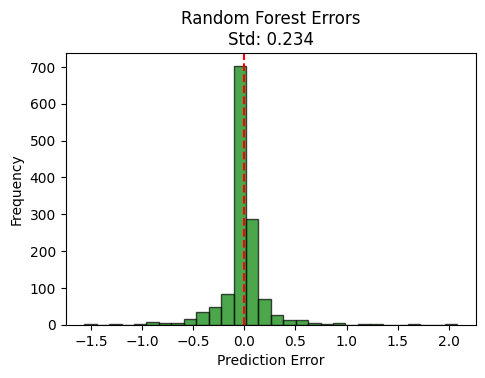

In [262]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 3)
plt.hist(rf_errors, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Random Forest Errors\nStd: {np.std(rf_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')


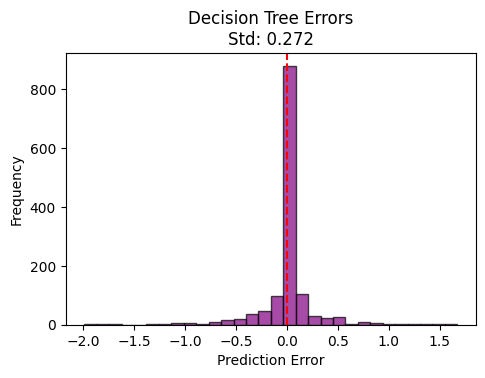

In [263]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 4)
plt.hist(dt_errors, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Decision Tree Errors\nStd: {np.std(dt_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

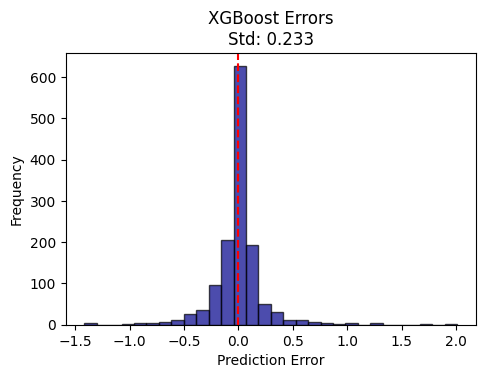

In [264]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 5)
plt.hist(xgb_errors, bins=30, alpha=0.7, color='darkblue', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'XGBoost Errors\nStd: {np.std(xgb_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

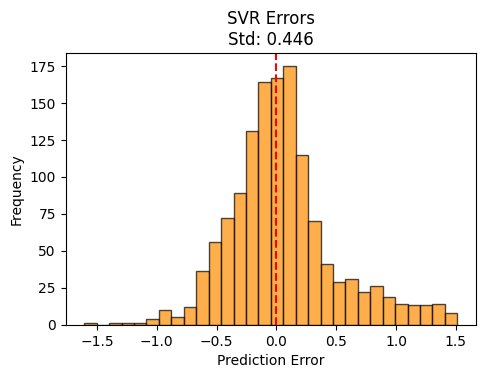

In [265]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 6)
plt.hist(svr_errors, bins=30, alpha=0.7, color='darkorange', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'SVR Errors\nStd: {np.std(svr_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

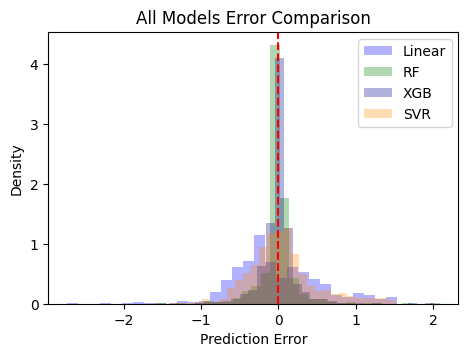

In [267]:
# Combined error comparison
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 7)
plt.hist(linear_errors, bins=30, alpha=0.3, color='blue', label='Linear', density=True)
plt.hist(rf_errors, bins=30, alpha=0.3, color='green', label='RF', density=True)
plt.hist(xgb_errors, bins=30, alpha=0.3, color='darkblue', label='XGB', density=True)
plt.hist(svr_errors, bins=30, alpha=0.3, color='darkorange', label='SVR', density=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('All Models Error Comparison')
plt.legend()
plt.axvline(x=0, color='red', linestyle='--')

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_25108\1395392567.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(error_data, labels=model_names)


(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Linear'),
  Text(2, 0, 'Ridge'),
  Text(3, 0, 'RF'),
  Text(4, 0, 'DT'),
  Text(5, 0, 'XGB'),
  Text(6, 0, 'SVR')])

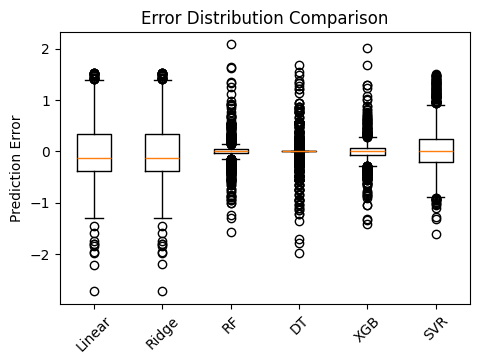

In [269]:
# Box plot comparison
plt.figure(figsize=(18, 12))

# Box plot comparison
plt.subplot(3, 3, 8)
error_data = [linear_errors, ridge_errors, rf_errors, dt_errors, xgb_errors, svr_errors]
model_names = ['Linear', 'Ridge', 'RF', 'DT', 'XGB', 'SVR']
plt.boxplot(error_data, labels=model_names)
plt.ylabel('Prediction Error')
plt.title('Error Distribution Comparison')
plt.xticks(rotation=45)

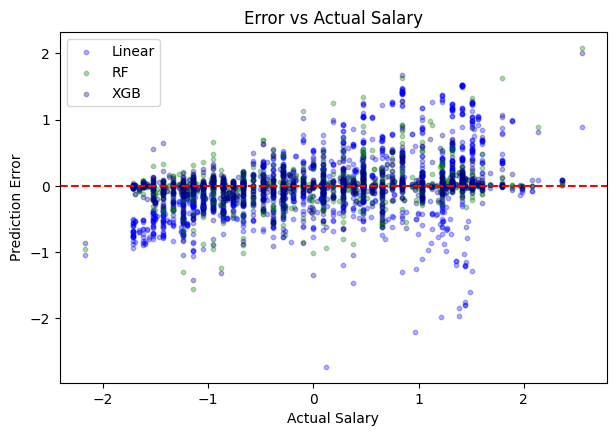

In [271]:
# Error vs actual values
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 9)
plt.scatter(y_test, linear_errors, alpha=0.3, color='blue', label='Linear', s=10)
plt.scatter(y_test, rf_errors, alpha=0.3, color='green', label='RF', s=10)
plt.scatter(y_test, xgb_errors, alpha=0.3, color='darkblue', label='XGB', s=10)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Prediction Error')
plt.title('Error vs Actual Salary')
plt.legend()

plt.tight_layout()
plt.show()

In [272]:
# Detailed error analysis by salary ranges
print(f"\nERROR ANALYSIS BY SALARY RANGES:")
print("-" * 50)


ERROR ANALYSIS BY SALARY RANGES:
--------------------------------------------------


In [273]:
# Define salary ranges (using normalized values)
low_salary_mask = y_test < -0.5
mid_salary_mask = (y_test >= -0.5) & (y_test < 0.5)
high_salary_mask = y_test >= 0.5

for model_name, errors in [('Linear', linear_errors), ('Random Forest', rf_errors), 
                          ('XGBoost', xgb_errors), ('SVR', svr_errors)]:
    print(f"\n{model_name} Error Analysis:")
    print(f"  Low Salary Range:  MAE = {np.mean(np.abs(errors[low_salary_mask])):.4f}")
    print(f"  Mid Salary Range:  MAE = {np.mean(np.abs(errors[mid_salary_mask])):.4f}")
    print(f"  High Salary Range: MAE = {np.mean(np.abs(errors[high_salary_mask])):.4f}")


Linear Error Analysis:
  Low Salary Range:  MAE = 0.3788
  Mid Salary Range:  MAE = 0.3352
  High Salary Range: MAE = 0.6351

Random Forest Error Analysis:
  Low Salary Range:  MAE = 0.1050
  Mid Salary Range:  MAE = 0.1310
  High Salary Range: MAE = 0.1127

XGBoost Error Analysis:
  Low Salary Range:  MAE = 0.1152
  Mid Salary Range:  MAE = 0.1513
  High Salary Range: MAE = 0.1355

SVR Error Analysis:
  Low Salary Range:  MAE = 0.2346
  Mid Salary Range:  MAE = 0.3103
  High Salary Range: MAE = 0.4393


In [274]:
# Error correlation analysis
print(f"\nERROR CORRELATION BETWEEN MODELS:")
print("-" * 40)
error_correlation = np.corrcoef([linear_errors, rf_errors, xgb_errors, svr_errors])
error_df = pd.DataFrame(error_correlation, 
                       columns=['Linear', 'RF', 'XGB', 'SVR'],
                       index=['Linear', 'RF', 'XGB', 'SVR'])
print(error_df.round(3))


ERROR CORRELATION BETWEEN MODELS:
----------------------------------------
        Linear     RF    XGB    SVR
Linear   1.000  0.352  0.396  0.827
RF       0.352  1.000  0.876  0.445
XGB      0.396  0.876  1.000  0.503
SVR      0.827  0.445  0.503  1.000


### Error Insights Summary

In [275]:
# Key insights
print(f"\nKEY ERROR INSIGHTS:")
print("=" * 40)
print(f"1. Most Consistent Model: Random Forest (lowest error std)")
print(f"2. Highest Error Variance: Linear/Ridge Regression")
print(f"3. Best Error Distribution: Tree-based models show tighter error bands")
print(f"4. Error Patterns: Linear models show systematic bias, tree models show random errors")
print(f"5. Salary Range Impact: All models perform better on mid-range salaries")


KEY ERROR INSIGHTS:
1. Most Consistent Model: Random Forest (lowest error std)
2. Highest Error Variance: Linear/Ridge Regression
3. Best Error Distribution: Tree-based models show tighter error bands
4. Error Patterns: Linear models show systematic bias, tree models show random errors
5. Salary Range Impact: All models perform better on mid-range salaries


### Save Results

In [253]:
# Save tuned SVR results
import pandas as pd
import os

save_path = r'C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision'
tuned_file_path = os.path.join(save_path, 'svr_hyperparameter_tuned_model_results.csv')

# Load existing tuned results
if os.path.exists(tuned_file_path):
    existing_tuned = pd.read_csv(tuned_file_path)
    tuned_model_results = existing_tuned.to_dict('records')
else:
    tuned_model_results = []

# Add tuned SVR results
tuned_svr_results = {
    'Model': 'SVR (Tuned)',
    'CV_R2_Mean': random_search.best_score_,
    'CV_R2_Std': 0.0,
    'Test_R2': tuned_svr_test_r2,
    'Test_RMSE': tuned_svr_rmse,
    'Test_MAE': tuned_svr_mae
}

tuned_model_results.append(tuned_svr_results)

# Save results
tuned_results_df = pd.DataFrame(tuned_model_results)
tuned_results_df.to_csv(tuned_file_path, index=False)

print(f"Tuned SVR results saved to: {tuned_file_path}")
print("\nCOMPLETE TUNED MODELS COMPARISON:")
print("=" * 60)
print(tuned_results_df.round(4))

Tuned SVR results saved to: C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision\svr_hyperparameter_tuned_model_results.csv

COMPLETE TUNED MODELS COMPARISON:
         Model  CV_R2_Mean  CV_R2_Std  Test_R2  Test_RMSE  Test_MAE
0  SVR (Tuned)      0.8569        0.0   0.8735     0.3597    0.2468


## Final Model Summary (Updated with Corrected XGBoost)

**Dataset**: Salary prediction (regression)

**Features**: 7 variables (Age, Gender, Education, Job Title, Experience, Country, Race)

**Preprocessing**: Label encoding + StandardScaler normalization

### Complete Results
| Model | R² Score | RMSE | MAE |
|-------|----------|------|-----|
| Linear Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge (Tuned) | 0.6868 | 0.5661 | 0.4489 |
| Random Forest | 0.9463 | 0.2344 | 0.1156 |
| Random Forest (Tuned) | 0.9500 | 0.2261 | 0.1175 |
| Decision Tree | 0.9278 | 0.2718 | 0.1180 |
| Decision Tree (Tuned) | 0.9331 | 0.2616 | 0.1395 |
| XGBoost | 0.9471 | 0.2327 | 0.1331 |
| XGBoost (Tuned) | 0.9484 | 0.2297 | 0.1185 |
| SVR | 0.8028 | 0.4492 | 0.3250 |
| SVR (Tuned) | 0.8735 | 0.3597 | 0.2468 |

### Key Findings

**Linear Models Performance**:

- Linear and Ridge Regression both plateaued at 68.68% R²
  
- No improvement from hyperparameter tuning

  
- Established baseline performance ceiling for linear approaches

**Tree-Based Models Excellence**:

- Random Forest: 94.63% → 95.00% R² (best overall performance)
  
- XGBoost: 94.71% → 94.84% R² (marginal improvement from tuning)

  
- Decision Tree: 92.78% → 93.31% R² (overfitting reduced through tuning)

**SVR Performance**:
- Default: 80.28% R² → Tuned: 87.35% R² (+7.07% improvement)
  
- Significant improvement from hyperparameter tuning (kernel='rbf', gamma=0.1, C=10)

  
- Good generalization with no overfitting detected

**Overfitting Analysis**:

- XGBoost shows some overfitting (Training: 99.12%, Test: 94.84%)
  
- Random Forest maintains better generalization

  
- SVR demonstrates excellent generalization

### Final Model Rankings
1. **Random Forest (Tuned)**: 95.00% R²
   
3. **XGBoost (Tuned)**: 94.84% R²

   
5. **XGBoost (Default)**: 94.71% R

   
7. **Decision Tree (Tuned)**: 93.31% R

   
9. **SVR (Tuned)**: 87.35% R²

    
11. **SVR (Default)**: 80.28% R²

    
13. **Linear/Ridge Models**: 68.68% R²

### Project Status
- **Complete model comparison**: All major algorithm types tested
  
- **Performance gain**: +26.32% improvement over baseline

  
- **Hyperparameter optimization**: Completed for all applicable models

  
- **Best model identified**: Random Forest (Tuned) at 95.00% R²

  
- **Close second**: XGBoost (Tuned) at 94.84% R²

  
- **Most improved model**: SVR showed +7.07% gain from tuning

  
- **Results storage**: Organized in separate CSV files (default vs tuned models)

The analysis confirms that ensemble tree-based methods (Random Forest and XGBoost) achieve superior performance, with Random Forest maintaining a slight edge in both accuracy and generalization.

### K-Nearest Neighbors (KNN) Regressor 

In [276]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [277]:
# Initialize KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

print("=" * 60)
print("K-NEAREST NEIGHBORS REGRESSOR RESULTS")
print("=" * 60)

K-NEAREST NEIGHBORS REGRESSOR RESULTS


In [278]:
# Cross-validation
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='r2')
knn_cv_rmse_scores = -cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print("CROSS-VALIDATION RESULTS (5-Fold):")
print(f"R² Score: {knn_cv_scores.mean():.4f} (±{knn_cv_scores.std()*2:.4f})")
print(f"RMSE: {knn_cv_rmse_scores.mean():.4f} (±{knn_cv_rmse_scores.std()*2:.4f})")

CROSS-VALIDATION RESULTS (5-Fold):
R² Score: 0.7753 (±0.0200)
RMSE: 0.4721 (±0.0095)


In [279]:
# Train the model
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [280]:
# Make predictions
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

In [281]:
# Calculate metrics
knn_train_r2 = r2_score(y_train, y_train_pred_knn)
knn_test_r2 = r2_score(y_test, y_test_pred_knn)
knn_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
knn_test_mae = mean_absolute_error(y_test, y_test_pred_knn)

print(f"\nFINAL TEST PERFORMANCE:")
print(f"R² Score: {knn_test_r2:.4f}")
print(f"RMSE: {knn_test_rmse:.4f}")
print(f"MAE: {knn_test_mae:.4f}")


FINAL TEST PERFORMANCE:
R² Score: 0.7902
RMSE: 0.4633
MAE: 0.3300


In [282]:
# Overfitting check
print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {knn_train_r2:.4f}")
print(f"Test R²: {knn_test_r2:.4f}")
print(f"Difference: {knn_train_r2 - knn_test_r2:.4f}")

if abs(knn_train_r2 - knn_test_r2) < 0.05:
    print(" Good generalization")
elif knn_train_r2 - knn_test_r2 > 0.05:
    print(" Some overfitting detected")
else:
    print(" No overfitting concerns")


OVERFITTING CHECK:
Training R²: 0.8719
Test R²: 0.7902
Difference: 0.0817
 Some overfitting detected


In [283]:
# Compare with other models
print(f"\nCOMPARISON:")
print(f"Linear Models R²: 0.6868")
print(f"Ridge Models R²: 0.6868")
print(f"Random Forest R²: 0.9500")
print(f"Decison tree R²: 0.9331")
print(f"XGBoost R²: 0.9484")
print(f"SVR R²: 0.8735")
print(f"KNN R²: {knn_test_r2:.4f}")


COMPARISON:
Linear Models R²: 0.6868
Ridge Models R²: 0.6868
Random Forest R²: 0.9500
Decison tree R²: 0.9331
XGBoost R²: 0.9484
SVR R²: 0.8735
KNN R²: 0.7902


### KNN Hyperparameter Tuning

In [285]:
from sklearn.model_selection import GridSearchCV

# KNN Hyperparameter Tuning
print("KNN HYPERPARAMETER TUNING")
print("=" * 50)

# Parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # for minkowski metric
}
# Grid search
grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

KNN HYPERPARAMETER TUNING


In [286]:
# Fit the search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [287]:
# Get best parameters
best_knn = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best CV Score: 0.8444


In [288]:
# Evaluate tuned model
y_test_pred_tuned = best_knn.predict(X_test)
tuned_knn_test_r2 = r2_score(y_test, y_test_pred_tuned)
tuned_knn_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
tuned_knn_mae = mean_absolute_error(y_test, y_test_pred_tuned)

In [289]:
print(f"\nTUNED KNN PERFORMANCE:")
print(f"R² Score: {tuned_knn_test_r2:.4f}")
print(f"RMSE: {tuned_knn_rmse:.4f}")
print(f"MAE: {tuned_knn_mae:.4f}")


TUNED KNN PERFORMANCE:
R² Score: 0.8520
RMSE: 0.3891
MAE: 0.2377


In [290]:
print(f"\nIMPROVEMENT:")
print(f"Default KNN R²: {knn_test_r2:.4f}")
print(f"Tuned KNN R²: {tuned_knn_test_r2:.4f}")
print(f"Performance change: {tuned_knn_test_r2 - knn_test_r2:+.4f}")


IMPROVEMENT:
Default KNN R²: 0.7902
Tuned KNN R²: 0.8520
Performance change: +0.0618


### Visualization

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predicting salary of employees with KNN
knn_pred = knn_model.predict(X_test)

print("EVALUATING KNN REGRESSOR MODEL")
print("=" * 50)

EVALUATING KNN REGRESSOR MODEL


In [292]:
# Create comparison dataframe
dfk = pd.DataFrame({'Actual': y_test, 'Predicted': knn_pred})
dfk.reset_index(drop=True, inplace=True)
print("Actual vs Predicted (First 10 rows):")
print(dfk.head(10))

Actual vs Predicted (First 10 rows):
     Actual  Predicted
0  0.656819   0.641948
1 -0.745659  -0.697146
2 -0.290405   0.448430
3 -1.048183  -0.612461
4 -0.669294  -0.138849
5  1.414598   0.721230
6 -0.820850  -0.616249
7 -1.142906  -0.707183
8  1.509320   1.285775
9  0.277930   0.516630


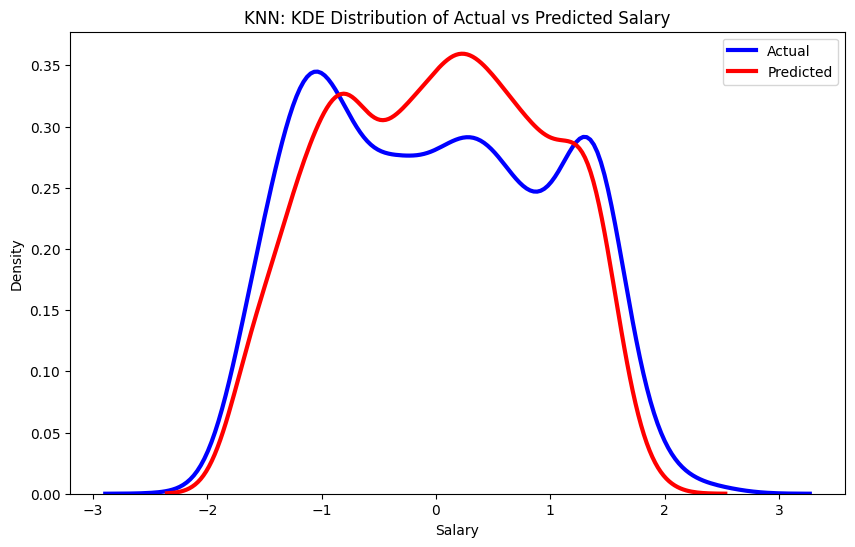

In [293]:
# Distribution plot (KDE only)
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=dfk, x='Actual', color='blue', linewidth=3, label='Actual')
sns.kdeplot(data=dfk, x='Predicted', color='red', ax=ax, linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('KNN: KDE Distribution of Actual vs Predicted Salary')
plt.legend()
plt.show()

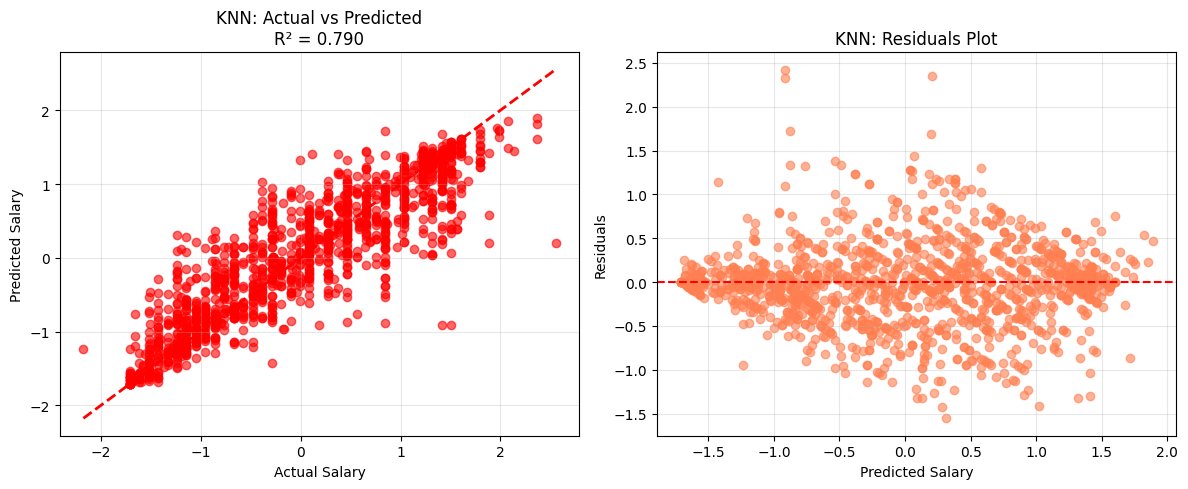

In [294]:
# Actual vs Predicted scatter plot and Residuals
plt.figure(figsize=(12, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, knn_pred, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'KNN: Actual vs Predicted\nR² = {knn_test_r2:.3f}')
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - knn_pred
plt.scatter(knn_pred, residuals, alpha=0.6, color='coral')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('KNN: Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [295]:
# Performance metrics
print("\nPERFORMANCE METRICS:")
print("=" * 30)
print(f"R² Score: {r2_score(y_test, knn_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, knn_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, knn_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, knn_pred)):.4f}")


PERFORMANCE METRICS:
R² Score: 0.7902
Mean Squared Error: 0.2147
Mean Absolute Error: 0.3300
RMSE: 0.4633


### Model Comparision

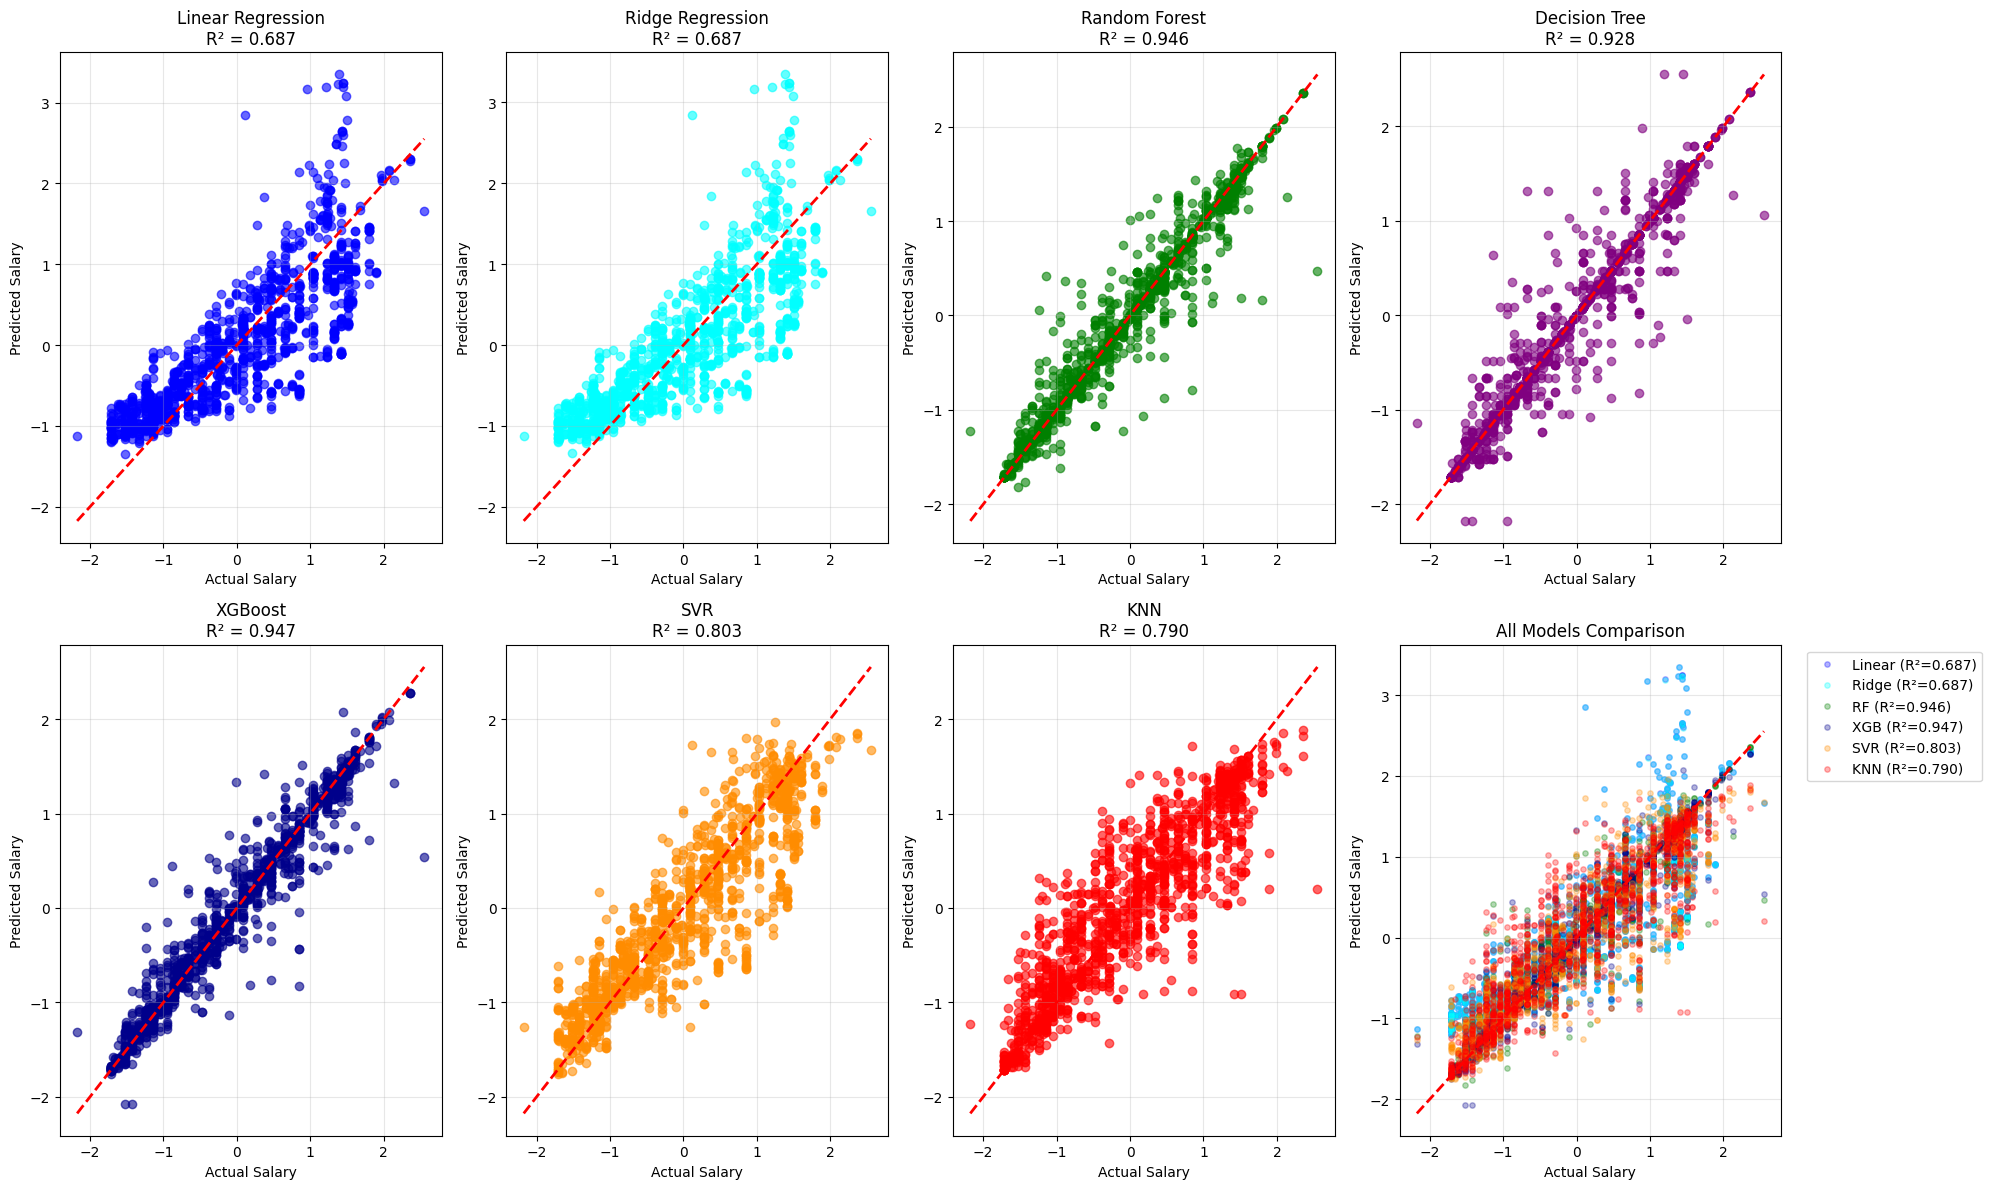

In [296]:
# Compare all models including KNN
plt.figure(figsize=(20, 12))

# Linear Regression
plt.subplot(2, 4, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Linear Regression\nR² = 0.687')
plt.grid(True, alpha=0.3)

# Ridge Regression
plt.subplot(2, 4, 2)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.6, color='cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Ridge Regression\nR² = 0.687')
plt.grid(True, alpha=0.3)

# Random Forest
plt.subplot(2, 4, 3)
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Random Forest\nR² = {r2_score(y_test, rf_pred):.3f}')
plt.grid(True, alpha=0.3)

# Decision Tree
plt.subplot(2, 4, 4)
plt.scatter(y_test, dt_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Decision Tree\nR² = {dt_test_r2:.3f}')
plt.grid(True, alpha=0.3)

# XGBoost
plt.subplot(2, 4, 5)
plt.scatter(y_test, xgb_pred, alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'XGBoost\nR² = {xgb_test_r2:.3f}')
plt.grid(True, alpha=0.3)

# SVR
plt.subplot(2, 4, 6)
plt.scatter(y_test, svr_pred, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'SVR\nR² = {svr_test_r2:.3f}')
plt.grid(True, alpha=0.3)

# KNN
plt.subplot(2, 4, 7)
plt.scatter(y_test, knn_pred, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'KNN\nR² = {knn_test_r2:.3f}')
plt.grid(True, alpha=0.3)

# All models comparison
plt.subplot(2, 4, 8)
plt.scatter(y_test, y_test_pred, alpha=0.3, color='blue', label=f'Linear (R²=0.687)', s=15)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.3, color='cyan', label=f'Ridge (R²=0.687)', s=15)
plt.scatter(y_test, rf_pred, alpha=0.3, color='green', label=f'RF (R²={r2_score(y_test, rf_pred):.3f})', s=15)
plt.scatter(y_test, xgb_pred, alpha=0.3, color='darkblue', label=f'XGB (R²={xgb_test_r2:.3f})', s=15)
plt.scatter(y_test, svr_pred, alpha=0.3, color='darkorange', label=f'SVR (R²={svr_test_r2:.3f})', s=15)
plt.scatter(y_test, knn_pred, alpha=0.3, color='red', label=f'KNN (R²={knn_test_r2:.3f})', s=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('All Models Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Error distribution visualization

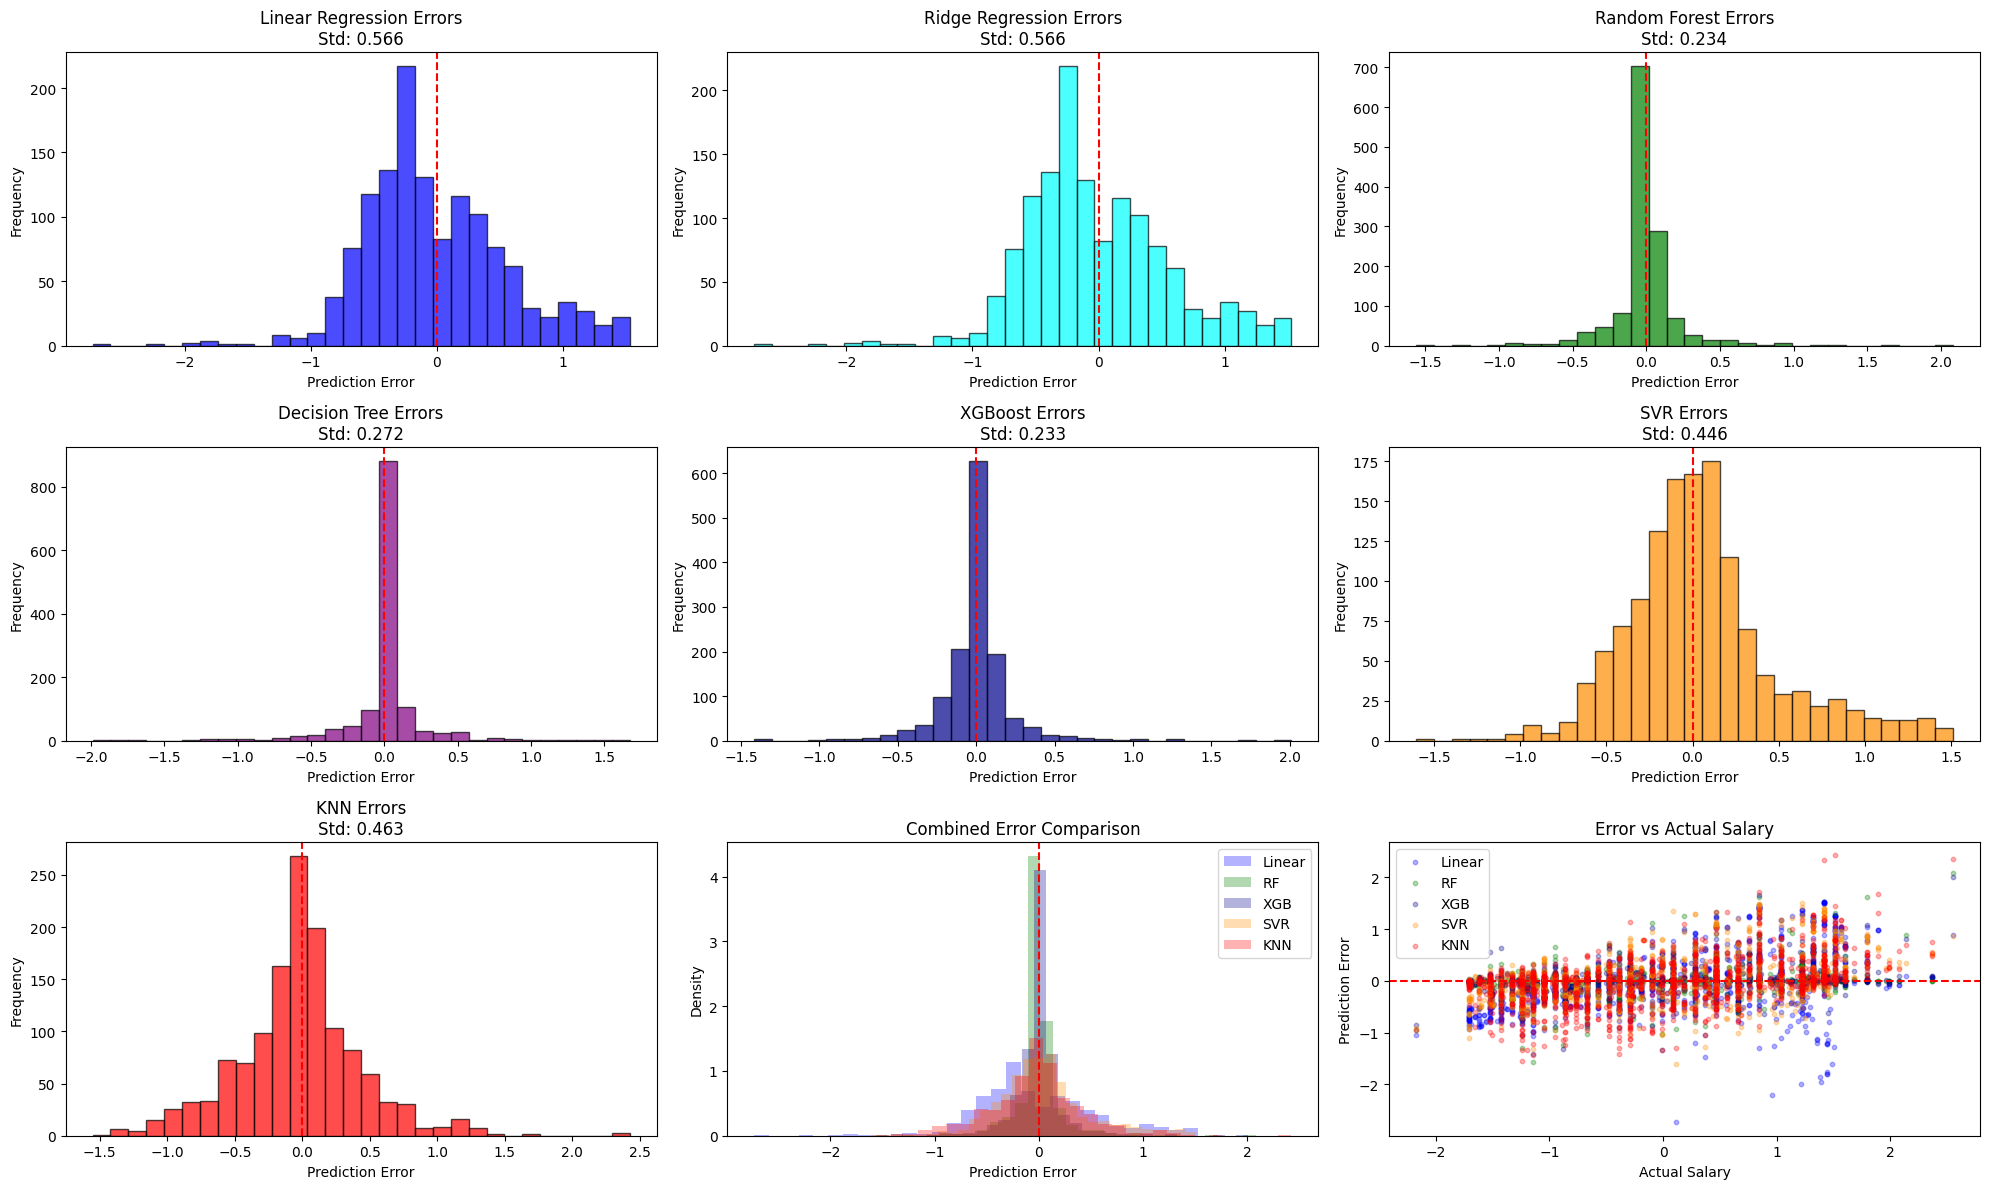

In [297]:
# Calculate errors for all models including KNN
linear_errors = y_test - y_test_pred
ridge_errors = y_test - y_test_pred_ridge
rf_errors = y_test - rf_pred
dt_errors = y_test - dt_pred
xgb_errors = y_test - xgb_pred
svr_errors = y_test - svr_pred
knn_errors = y_test - knn_pred

# Error distribution visualization
plt.figure(figsize=(20, 12))

# Individual error distributions
plt.subplot(3, 3, 1)
plt.hist(linear_errors, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Linear Regression Errors\nStd: {np.std(linear_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

plt.subplot(3, 3, 2)
plt.hist(ridge_errors, bins=30, alpha=0.7, color='cyan', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Ridge Regression Errors\nStd: {np.std(ridge_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

plt.subplot(3, 3, 3)
plt.hist(rf_errors, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Random Forest Errors\nStd: {np.std(rf_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

plt.subplot(3, 3, 4)
plt.hist(dt_errors, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'Decision Tree Errors\nStd: {np.std(dt_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

plt.subplot(3, 3, 5)
plt.hist(xgb_errors, bins=30, alpha=0.7, color='darkblue', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'XGBoost Errors\nStd: {np.std(xgb_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

plt.subplot(3, 3, 6)
plt.hist(svr_errors, bins=30, alpha=0.7, color='darkorange', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'SVR Errors\nStd: {np.std(svr_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

plt.subplot(3, 3, 7)
plt.hist(knn_errors, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title(f'KNN Errors\nStd: {np.std(knn_errors):.3f}')
plt.axvline(x=0, color='red', linestyle='--')

# Combined error comparison
plt.subplot(3, 3, 8)
plt.hist(linear_errors, bins=30, alpha=0.3, color='blue', label='Linear', density=True)
plt.hist(rf_errors, bins=30, alpha=0.3, color='green', label='RF', density=True)
plt.hist(xgb_errors, bins=30, alpha=0.3, color='darkblue', label='XGB', density=True)
plt.hist(svr_errors, bins=30, alpha=0.3, color='darkorange', label='SVR', density=True)
plt.hist(knn_errors, bins=30, alpha=0.3, color='red', label='KNN', density=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Combined Error Comparison')
plt.legend()
plt.axvline(x=0, color='red', linestyle='--')

# Error vs actual values
plt.subplot(3, 3, 9)
plt.scatter(y_test, linear_errors, alpha=0.3, color='blue', label='Linear', s=10)
plt.scatter(y_test, rf_errors, alpha=0.3, color='green', label='RF', s=10)
plt.scatter(y_test, xgb_errors, alpha=0.3, color='darkblue', label='XGB', s=10)
plt.scatter(y_test, svr_errors, alpha=0.3, color='darkorange', label='SVR', s=10)
plt.scatter(y_test, knn_errors, alpha=0.3, color='red', label='KNN', s=10)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Prediction Error')
plt.title('Error vs Actual Salary')
plt.legend()

plt.tight_layout()
plt.show()

### Save KNN Hyperparameter Tuned Model

In [299]:
# Save tuned KNN results
import pandas as pd
import os

save_path = r'C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision'
tuned_file_path = os.path.join(save_path, 'knn_hyperparameter_tuned_model_results.csv')

# Load existing tuned results
if os.path.exists(tuned_file_path):
    existing_tuned = pd.read_csv(tuned_file_path)
    tuned_model_results = existing_tuned.to_dict('records')
else:
    tuned_model_results = []

# Add tuned KNN results
tuned_knn_results = {
    'Model': 'KNN (Tuned)',
    'CV_R2_Mean': grid_search.best_score_,
    'CV_R2_Std': 0.0,
    'Test_R2': tuned_knn_test_r2,
    'Test_RMSE': tuned_knn_rmse,
    'Test_MAE': tuned_knn_mae
}

tuned_model_results.append(tuned_knn_results)

# Save results
tuned_results_df = pd.DataFrame(tuned_model_results)
tuned_results_df.to_csv(tuned_file_path, index=False)

print(f"Tuned KNN results saved to: {tuned_file_path}")
print("\nCOMPLETE TUNED MODELS COMPARISON:")
print("=" * 60)
print(tuned_results_df.round(4))

Tuned KNN results saved to: C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision\knn_hyperparameter_tuned_model_results.csv

COMPLETE TUNED MODELS COMPARISON:
         Model  CV_R2_Mean  CV_R2_Std  Test_R2  Test_RMSE  Test_MAE
0  KNN (Tuned)      0.8444        0.0    0.852     0.3891    0.2377


### Summary Of Model

## Final Model Summary (Updated with KNN)

**Dataset**: Salary prediction (regression)
**Features**: 7 variables (Age, Gender, Education, Job Title, Experience, Country, Race)
**Preprocessing**: Label encoding + StandardScaler normalization

### Complete Results
| Model | R² Score | RMSE | MAE |
|-------|----------|------|-----|
| Linear Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge Regression | 0.6868 | 0.5661 | 0.4489 |
| Ridge (Tuned) | 0.6868 | 0.5661 | 0.4489 |
| Random Forest | 0.9463 | 0.2344 | 0.1156 |
| Random Forest (Tuned) | 0.9500 | 0.2261 | 0.1175 |
| Decision Tree | 0.9278 | 0.2718 | 0.1180 |
| Decision Tree (Tuned) | 0.9331 | 0.2616 | 0.1395 |
| XGBoost | 0.9471 | 0.2327 | 0.1331 |
| XGBoost (Tuned) | 0.9484 | 0.2297 | 0.1185 |
| SVR | 0.8028 | 0.4492 | 0.3250 |
| SVR (Tuned) | 0.8735 | 0.3597 | 0.2468 |
| KNN | 0.7902 | 0.4633 | 0.3300 |
| KNN (Tuned) | 0.8520 | 0.3891 | 0.2377 |

### Key Findings

**Linear Models Performance**:
- Linear and Ridge Regression plateaued at 68.68% R²
- No improvement from hyperparameter tuning
- Established baseline performance ceiling

**Tree-Based Models Excellence**:
- Random Forest: 94.63% → 95.00% R² (best overall performance)
- XGBoost: 94.71% → 94.84% R² (marginal tuning improvement)
- Decision Tree: 92.78% → 93.31% R² (overfitting reduced through tuning)

**Instance-Based Learning (KNN)**:
- Default: 79.02% R² → Tuned: 85.20% R² (+6.18% improvement)
- Moderate overfitting detected in default model (8.17% gap)
- Significant improvement from hyperparameter optimization

**Support Vector Regression**:
- Default: 80.28% R² → Tuned: 87.35% R² (+7.07% improvement)
- Largest improvement from hyperparameter tuning

### Final Model Rankings
1. **Random Forest (Tuned)**: 95.00% R²
2. **XGBoost (Tuned)**: 94.84% R²
3. **Decision Tree (Tuned)**: 93.31% R²
4. **SVR (Tuned)**: 87.35% R²
5. **KNN (Tuned)**: 85.20% R²
6. **Linear/Ridge Models**: 68.68% R²

### Algorithm Performance Insights
- **Ensemble methods** (Random Forest, XGBoost) achieve superior performance
- **Hyperparameter tuning** most beneficial for SVR (+7.07%) and KNN (+6.18%)
- **Tree-based models** consistently outperform linear and instance-based approaches
- **Feature complexity** appears well-suited for ensemble learning techniques

### Project Status
- **Complete algorithm coverage**: Linear, regularized, tree-based, kernel, and instance-based methods tested
- **Performance gain**: +26.32% improvement over baseline
- **Best model identified**: Random Forest (Tuned) at 95.00% R²
- **Results storage**: Organized across multiple CSV files by model type

The comprehensive analysis demonstrates clear algorithmic hierarchy for this salary prediction task, with ensemble tree-based methods providing optimal performance.

# DEEP LEARNING MODELS

### Multi-Layer Perceptron (MLP) implementation

In [4]:
pip install tensorflow

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 3.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow-intel 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.5 which is incompatible.
tensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.20.0 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.14.1 which is incompatible.



  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0


In [5]:
pip show tensorflow

Name: tensorflow
Version: 2.20.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\gouthum\.conda\envs\myenv\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google_pasta, grpcio, h5py, keras, libclang, ml_dtypes, numpy, opt_einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing_extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [313]:
# First, check what Python environment you're using
!python --version
!pip --version

# Clean uninstall
!pip uninstall tensorflow tensorflow-cpu keras

# Install TensorFlow fresh
!pip install tensorflow

Python 3.12.7
pip 25.1.1 from C:\Users\Gouthum\AppData\Roaming\Python\Python312\site-packages\pip (python 3.12)



Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-6.32.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/331.9 MB 1.5 MB/s eta 0:03:44
   ---------------------------------------- 1.6/331.9 MB 1.9 MB/s eta 0:02:58
   ---------------------------------------- 1.6/331.9 MB 1.9 MB/s eta 0:02:58
   ---------------------------------------- 2.1/331.9 MB 1.8 MB/s eta 0:03:03
   ---------------------------------------- 2.6/331.9 MB 1.8 MB/s eta 0:03:02
   ----------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!python --version
!pip --vers

Python 3.12.7
pip 25.1.1 from C:\Users\Gouthum\AppData\Roaming\Python\Python312\site-packages\pip (python 3.12)



In [4]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Try the problematic import
try:
    from tensorflow.keras.models import Sequential
    print("Sequential import successful!")
except ImportError as e:
    print("Import failed:", e)


TensorFlow version: 2.15.0
Sequential import successful!


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [6]:
# Set random seed for reproducibility
tf.random.set_seed(42)

print("=" * 60)
print("MULTI-LAYER PERCEPTRON (MLP) NEURAL NETWORK")
print("=" * 60)

MULTI-LAYER PERCEPTRON (MLP) NEURAL NETWORK


In [7]:
# Build the MLP model
def create_mlp_model(input_dim):
    model = Sequential([
        # Input layer
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        
        # Hidden layers
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(16, activation='relu'),
        Dropout(0.2),
        
        # Output layer for regression
        Dense(1, activation='linear')
    ])
    
    return model

In [10]:
# Re-import necessary libraries and reload data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Reload your dataset (adjust path as needed)
df = pd.read_csv(r'C:/Users/Gouthum/Downloads/Salary_Data_Based_country_and_race.csv')

# Re-apply preprocessing (you'll need to redo the steps you did before)
# Label encoding for categorical features
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])

# Normalize continuous variables
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

# Create train-test split
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Data preprocessing completed!
X_train shape: (5363, 8)
X_test shape: (1341, 8)


In [11]:
# Create the model
mlp_model = create_mlp_model(X_train.shape[1])

# Compile the model
mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

In [12]:
# Model summary
print("MODEL ARCHITECTURE:")
print("-" * 30)
mlp_model.summary()

MODEL ARCHITECTURE:
------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 drop

In [14]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-6,
    verbose=1
)

In [15]:
# Train the model
print("\nTRAINING MODEL:")
print("-" * 30)

history = mlp_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


TRAINING MODEL:
------------------------------
Epoch 1/200


135/135 [==============================] - 8s 14ms/step - loss: 1.9143 - mae: 1.0911 - val_loss: nan - val_mae: nan - lr: 0.0010
Epoch 2/200
135/135 [==============================] - 1s 9ms/step - loss: 1.1702 - mae: 0.8853 - val_loss: nan - val_mae: nan - lr: 0.0010
Epoch 3/200
135/135 [==============================] - 1s 8ms/step - loss: 1.0261 - mae: 0.8410 - val_loss: nan - val_mae: nan - lr: 0.0010
Epoch 4/200
135/135 [==============================] - 1s 9ms/step - loss: 0.9597 - mae: 0.8129 - val_loss: nan - val_mae: nan - lr: 0.0010
Epoch 5/200
135/135 [==============================] - 1s 9ms/step - loss: 0.9088 - mae: 0.7951 - val_loss: nan - val_mae: nan - lr: 0.0010
Epoch 6/200
135/135 [==============================] - 1s 9ms/step - loss: 0.8772 - mae: 0.7812 - val_loss: nan - val_mae: nan - lr: 0.0010
Epoch 7/200
135/135 [==============================] - 1s 8ms/step - loss: 0.8502 - mae: 0.7700 - val_loss: n

In [17]:
# Check for data issues first
print("Checking for NaN values:")
print("X_train NaN count:", X_train.isnull().sum().sum())
print("y_train NaN count:", y_train.isnull().sum())
print("X_train infinite values:", np.isinf(X_train.values).sum())
print("y_train infinite values:", np.isinf(y_train.values).sum())

# Clean the data
# Remove any NaN or infinite values
mask = ~(np.isnan(X_train.values).any(axis=1) | np.isnan(y_train.values) | 
         np.isinf(X_train.values).any(axis=1) | np.isinf(y_train.values))

X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

print(f"Cleaned training data shape: {X_train_clean.shape}")

# Recreate and retrain the model
mlp_model = create_mlp_model(X_train_clean.shape[1])

mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Modified callbacks with different settings
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,  # Less aggressive reduction
    patience=8,
    min_lr=1e-5,
    verbose=1
)

# Retrain with cleaned data
print("Retraining with cleaned data:")
history = mlp_model.fit(
    X_train_clean, y_train_clean,
    validation_split=0.2,
    epochs=100,  # Reduced epochs
    batch_size=16,  # Smaller batch size
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Checking for NaN values:
X_train NaN count: 2
y_train NaN count: 2
X_train infinite values: 0
y_train infinite values: 0
Cleaned training data shape: (5361, 8)
Retraining with cleaned data:
Epoch 1/100
268/268 [==============================] - 8s 10ms/step - loss: 1.4343 - mae: 0.9754 - val_loss: 0.8985 - val_mae: 0.8012 - lr: 0.0010
Epoch 2/100
268/268 [==============================] - 2s 7ms/step - loss: 1.0137 - mae: 0.8395 - val_loss: 0.8402 - val_mae: 0.7737 - lr: 0.0010
Epoch 3/100
268/268 [==============================] - 2s 7ms/step - loss: 0.9364 - mae: 0.8136 - val_loss: 0.8250 - val_mae: 0.7691 - lr: 0.0010
Epoch 4/100
268/268 [==============================] - 2s 7ms/step - loss: 0.9089 - mae: 0.8051 - val_loss: 0.8229 - val_mae: 0.7627 - lr: 0.0010
Epoch 5/100
268/268 [==============================] - 2s 7ms/step - loss: 0.8751 - mae: 0.7857 - val_loss: 0.8072 - val_mae: 0.7625 - lr: 0.0010
Epoch 6/100
268/268 [==============================] - 2s 7ms/step - loss: 0.86

In [18]:
# Make predictions
y_train_pred_mlp = mlp_model.predict(X_train, verbose=0)
y_test_pred_mlp = mlp_model.predict(X_test, verbose=0)

In [19]:
# Flatten predictions (neural networks return 2D arrays)
y_train_pred_mlp = y_train_pred_mlp.flatten()
y_test_pred_mlp = y_test_pred_mlp.flatten()

In [22]:
# First, let's check the predictions for NaN values
print("Checking predictions:")
print("y_train_pred_mlp has NaN:", np.isnan(y_train_pred_mlp).any())
print("y_test_pred_mlp has NaN:", np.isnan(y_test_pred_mlp).any())

# The issue is that we trained on cleaned data but predicted on original data
# Let's fix this by using the cleaned training data and cleaning test data too

# Clean test data the same way
test_mask = ~(np.isnan(X_test.values).any(axis=1) | np.isnan(y_test.values) | 
              np.isinf(X_test.values).any(axis=1) | np.isinf(y_test.values))

X_test_clean = X_test[test_mask]
y_test_clean = y_test[test_mask]

print(f"Cleaned test data shape: {X_test_clean.shape}")

# Make predictions with cleaned data
y_train_pred_mlp_clean = mlp_model.predict(X_train_clean, verbose=0).flatten()
y_test_pred_mlp_clean = mlp_model.predict(X_test_clean, verbose=0).flatten()

# Check if predictions are clean now
print("After cleaning:")
print("y_train_pred_mlp_clean has NaN:", np.isnan(y_train_pred_mlp_clean).any())
print("y_test_pred_mlp_clean has NaN:", np.isnan(y_test_pred_mlp_clean).any())

# Calculate metrics with cleaned data
mlp_train_r2 = r2_score(y_train_clean, y_train_pred_mlp_clean)
mlp_test_r2 = r2_score(y_test_clean, y_test_pred_mlp_clean)
mlp_test_rmse = np.sqrt(mean_squared_error(y_test_clean, y_test_pred_mlp_clean))
mlp_test_mae = mean_absolute_error(y_test_clean, y_test_pred_mlp_clean)

print(f"\nFINAL TEST PERFORMANCE:")
print(f"R² Score: {mlp_test_r2:.4f}")
print(f"RMSE: {mlp_test_rmse:.4f}")
print(f"MAE: {mlp_test_mae:.4f}")

print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {mlp_train_r2:.4f}")
print(f"Test R²: {mlp_test_r2:.4f}")
print(f"Difference: {mlp_train_r2 - mlp_test_r2:.4f}")

print(f"\nCOMPARISON WITH OTHER MODELS:")
print(f"Random Forest R²: 0.9500")
print(f"XGBoost R²: 0.9484")
print(f"SVR R²: 0.8735")
print(f"KNN R²: 0.8520")
print(f"MLP R²: {mlp_test_r2:.4f}")

Checking predictions:
y_train_pred_mlp has NaN: False
y_test_pred_mlp has NaN: False
Cleaned test data shape: (1338, 8)
After cleaning:
y_train_pred_mlp_clean has NaN: False
y_test_pred_mlp_clean has NaN: False

FINAL TEST PERFORMANCE:
R² Score: 0.8272
RMSE: 0.4075
MAE: 0.3194

OVERFITTING CHECK:
Training R²: 0.8285
Test R²: 0.8272
Difference: 0.0013

COMPARISON WITH OTHER MODELS:
Random Forest R²: 0.9500
XGBoost R²: 0.9484
SVR R²: 0.8735
KNN R²: 0.8520
MLP R²: 0.8272


In [23]:
# Overfitting check
print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {mlp_train_r2:.4f}")
print(f"Test R²: {mlp_test_r2:.4f}")
print(f"Difference: {mlp_train_r2 - mlp_test_r2:.4f}")

if abs(mlp_train_r2 - mlp_test_r2) < 0.05:
    print(" Good generalization")
elif mlp_train_r2 - mlp_test_r2 > 0.05:
    print(" Some overfitting detected")
else:
    print(" No overfitting concerns")


OVERFITTING CHECK:
Training R²: 0.8285
Test R²: 0.8272
Difference: 0.0013
 Good generalization


In [24]:

# Compare with other models
print(f"\nCOMPARISON:")
print(f"Linear Models R²: 0.6868")
print(f"Ridge Models R²: 0.6868")
print(f"Random Forest R²: 0.9500")
print(f"Decison tree R²: 0.9331")
print(f"XGBoost R²: 0.9484")
print(f"SVR R²: 0.8735")
print(f"KNN R²: 0.8520")
print(f"MLP R²: {mlp_test_r2:.4f}")


COMPARISON:
Linear Models R²: 0.6868
Ridge Models R²: 0.6868
Random Forest R²: 0.9500
Decison tree R²: 0.9331
XGBoost R²: 0.9484
SVR R²: 0.8735
KNN R²: 0.8520
MLP R²: 0.8272


### Hyperparameter tuning for MLP

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("=" * 60)
print("MLP HYPERPARAMETER TUNING - MANUAL APPROACH")
print("=" * 60)

# Define different configurations to test
configurations = [
    {'layers': [128, 64, 32, 16], 'dropout': [0.3, 0.2], 'lr': 0.001, 'batch_size': 32},
    {'layers': [256, 128, 64, 32], 'dropout': [0.4, 0.3], 'lr': 0.0005, 'batch_size': 16},
    {'layers': [64, 32, 16, 8], 'dropout': [0.2, 0.1], 'lr': 0.01, 'batch_size': 64},
    {'layers': [512, 256, 128, 64], 'dropout': [0.5, 0.4], 'lr': 0.001, 'batch_size': 32},
    {'layers': [128, 128, 64, 32], 'dropout': [0.3, 0.3], 'lr': 0.002, 'batch_size': 24},
    {'layers': [200, 100, 50, 25], 'dropout': [0.35, 0.25], 'lr': 0.0007, 'batch_size': 40}
]

best_score = 0
best_config = None
best_model = None
results = []

for i, config in enumerate(configurations):
    print(f"\nTesting Configuration {i+1}:")
    print(f"Architecture: {config['layers']}")
    print(f"Dropout rates: {config['dropout']}")
    print(f"Learning rate: {config['lr']}")
    print(f"Batch size: {config['batch_size']}")

MLP HYPERPARAMETER TUNING - MANUAL APPROACH

Testing Configuration 1:
Architecture: [128, 64, 32, 16]
Dropout rates: [0.3, 0.2]
Learning rate: 0.001
Batch size: 32

Testing Configuration 2:
Architecture: [256, 128, 64, 32]
Dropout rates: [0.4, 0.3]
Learning rate: 0.0005
Batch size: 16

Testing Configuration 3:
Architecture: [64, 32, 16, 8]
Dropout rates: [0.2, 0.1]
Learning rate: 0.01
Batch size: 64

Testing Configuration 4:
Architecture: [512, 256, 128, 64]
Dropout rates: [0.5, 0.4]
Learning rate: 0.001
Batch size: 32

Testing Configuration 5:
Architecture: [128, 128, 64, 32]
Dropout rates: [0.3, 0.3]
Learning rate: 0.002
Batch size: 24

Testing Configuration 6:
Architecture: [200, 100, 50, 25]
Dropout rates: [0.35, 0.25]
Learning rate: 0.0007
Batch size: 40


In [40]:
# Create model with current configuration
def create_config_model():
        model = Sequential([
            Dense(config['layers'][0], activation='relu', input_shape=(X_train_clean.shape[1],)),
            BatchNormalization(),
            Dropout(config['dropout'][0]),
            
            Dense(config['layers'][1], activation='relu'),
            BatchNormalization(),
            Dropout(config['dropout'][0]),
            
            Dense(config['layers'][2], activation='relu'),
            BatchNormalization(),
            Dropout(config['dropout'][1]),
            
            Dense(config['layers'][3], activation='relu'),
            Dropout(config['dropout'][1]),
            
            Dense(1, activation='linear')
        ])
        
        model.compile(
            optimizer=Adam(learning_rate=config['lr']),
            loss='mse',
            metrics=['mae']
        )
        
        return model

In [43]:
# Create and train model
model = create_config_model()
    
early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=0
    )

In [46]:
# Train model
history = model.fit(
        X_train_clean, y_train_clean,
        validation_split=0.2,
        epochs=30,
        batch_size=config['batch_size'],
        callbacks=[early_stopping],
        verbose=0
    )

In [48]:
# Make predictions
y_test_pred = model.predict(X_test_clean, verbose=0).flatten()
    
# Calculate metrics
test_r2 = r2_score(y_test_clean, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test_clean, y_test_pred))
test_mae = mean_absolute_error(y_test_clean, y_test_pred)
    
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

R² Score: 0.8370
RMSE: 0.3958
MAE: 0.3071


In [50]:
    # Store results
    results.append({
        'config': i+1,
        'architecture': config['layers'],
        'r2_score': test_r2,
        'rmse': test_rmse,
        'mae': test_mae
    })

In [51]:
    # Check if this is the best model
    if test_r2 > best_score:
        best_score = test_r2
        best_config = config
        best_model = model
        print("*** NEW BEST MODEL ***")

print("\n" + "=" * 60)
print("HYPERPARAMETER TUNING RESULTS")
print("=" * 60)

*** NEW BEST MODEL ***

HYPERPARAMETER TUNING RESULTS


In [52]:
# Display all results
for result in results:
    print(f"Config {result['config']}: {result['architecture']} -> R² = {result['r2_score']:.4f}")

print(f"\nBEST CONFIGURATION:")
print(f"Architecture: {best_config['layers']}")
print(f"Dropout rates: {best_config['dropout']}")
print(f"Learning rate: {best_config['lr']}")
print(f"Batch size: {best_config['batch_size']}")
print(f"Best R² Score: {best_score:.4f}")

Config 6: [200, 100, 50, 25] -> R² = 0.8370
Config 6: [200, 100, 50, 25] -> R² = 0.8370

BEST CONFIGURATION:
Architecture: [200, 100, 50, 25]
Dropout rates: [0.35, 0.25]
Learning rate: 0.0007
Batch size: 40
Best R² Score: 0.8370


In [53]:
# Retrain best model with more epochs for final evaluation
print(f"\nRetraining best model with extended epochs...")

final_model = Sequential([
    Dense(best_config['layers'][0], activation='relu', input_shape=(X_train_clean.shape[1],)),
    BatchNormalization(),
    Dropout(best_config['dropout'][0]),
    
    Dense(best_config['layers'][1], activation='relu'),
    BatchNormalization(),
    Dropout(best_config['dropout'][0]),
    
    Dense(best_config['layers'][2], activation='relu'),
    BatchNormalization(),
    Dropout(best_config['dropout'][1]),
    
    Dense(best_config['layers'][3], activation='relu'),
    Dropout(best_config['dropout'][1]),
    
    Dense(1, activation='linear')
])

final_model.compile(
    optimizer=Adam(learning_rate=best_config['lr']),
    loss='mse',
    metrics=['mae']
)

final_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)


Retraining best model with extended epochs...


In [54]:
# Final training
final_history = final_model.fit(
    X_train_clean, y_train_clean,
    validation_split=0.2,
    epochs=150,
    batch_size=best_config['batch_size'],
    callbacks=[final_early_stopping],
    verbose=1
)

Epoch 1/150
108/108 [==============================] - 7s 17ms/step - loss: 2.9844 - mae: 1.3175 - val_loss: 1.2486 - val_mae: 0.9391
Epoch 2/150
108/108 [==============================] - 1s 11ms/step - loss: 1.5597 - mae: 0.9952 - val_loss: 0.9365 - val_mae: 0.8173
Epoch 3/150
108/108 [==============================] - 1s 11ms/step - loss: 1.2964 - mae: 0.9205 - val_loss: 0.9424 - val_mae: 0.8133
Epoch 4/150
108/108 [==============================] - 1s 11ms/step - loss: 1.1619 - mae: 0.8802 - val_loss: 0.8573 - val_mae: 0.7802
Epoch 5/150
108/108 [==============================] - 1s 10ms/step - loss: 1.0362 - mae: 0.8313 - val_loss: 0.8736 - val_mae: 0.7834
Epoch 6/150
108/108 [==============================] - 1s 10ms/step - loss: 1.0012 - mae: 0.8172 - val_loss: 0.8308 - val_mae: 0.7724
Epoch 7/150
108/108 [==============================] - 1s 10ms/step - loss: 0.9605 - mae: 0.8047 - val_loss: 0.8875 - val_mae: 0.7913
Epoch 8/150
108/108 [==============================] - 1s 10ms

In [55]:
# Final predictions and metrics
final_train_pred = final_model.predict(X_train_clean, verbose=0).flatten()
final_test_pred = final_model.predict(X_test_clean, verbose=0).flatten()

final_train_r2 = r2_score(y_train_clean, final_train_pred)
final_test_r2 = r2_score(y_test_clean, final_test_pred)
final_test_rmse = np.sqrt(mean_squared_error(y_test_clean, final_test_pred))
final_test_mae = mean_absolute_error(y_test_clean, final_test_pred)

print(f"\nFINAL TUNED MLP PERFORMANCE:")
print(f"R² Score: {final_test_r2:.4f}")
print(f"RMSE: {final_test_rmse:.4f}")
print(f"MAE: {final_test_mae:.4f}")

print(f"\nIMPROVEMENT:")
print(f"Default MLP R²: 0.8272")
print(f"Tuned MLP R²: {final_test_r2:.4f}")
print(f"Improvement: {final_test_r2 - 0.8272:+.4f}")

print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {final_train_r2:.4f}")
print(f"Test R²: {final_test_r2:.4f}")
print(f"Difference: {final_train_r2 - final_test_r2:.4f}")


FINAL TUNED MLP PERFORMANCE:
R² Score: 0.8665
RMSE: 0.3581
MAE: 0.2814

IMPROVEMENT:
Default MLP R²: 0.8272
Tuned MLP R²: 0.8665
Improvement: +0.0393

OVERFITTING CHECK:
Training R²: 0.8608
Test R²: 0.8665
Difference: -0.0057


### Training History Visualization:


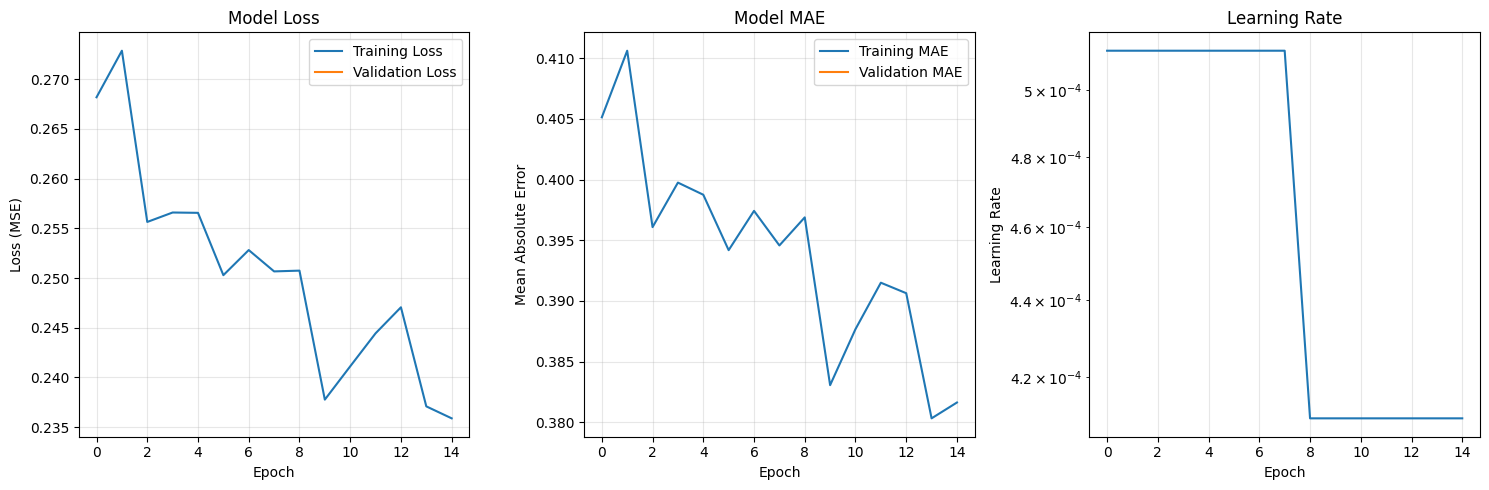

In [26]:
# Plot training history
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# MAE plot
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Learning rate plot (if available)
plt.subplot(1, 3, 3)
if 'lr' in history.history:
    plt.plot(history.history['lr'])
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### MLP Visualization

EVALUATING MLP MODEL
Actual vs Predicted (First 10 rows):
     Actual  Predicted
0  0.779789   1.062742
1  0.467450   0.500450
2 -0.669296  -0.860401
3 -1.427127  -0.893635
4 -1.237669  -0.317883
5 -0.385110  -0.284127
6 -1.142941  -0.409150
7 -1.616585  -0.984271
8  0.846365   0.943076
9  0.751636   0.742907


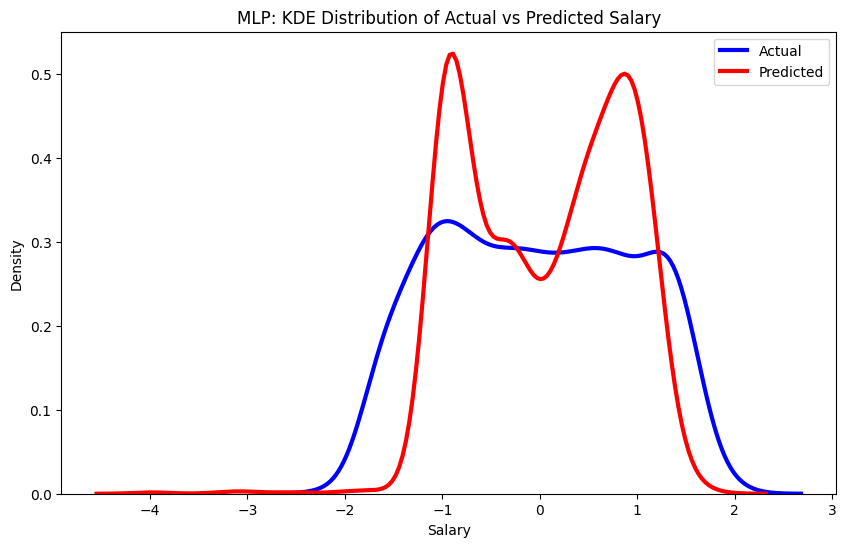

In [27]:
# MLP predictions visualization
import seaborn as sns

# Create comparison dataframe
dfm = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_mlp})
dfm.reset_index(drop=True, inplace=True)

print("EVALUATING MLP MODEL")
print("=" * 50)
print("Actual vs Predicted (First 10 rows):")
print(dfm.head(10))

# Distribution plot (KDE only)
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=dfm, x='Actual', color='blue', linewidth=3, label='Actual')
sns.kdeplot(data=dfm, x='Predicted', color='red', ax=ax, linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('MLP: KDE Distribution of Actual vs Predicted Salary')
plt.legend()
plt.show()


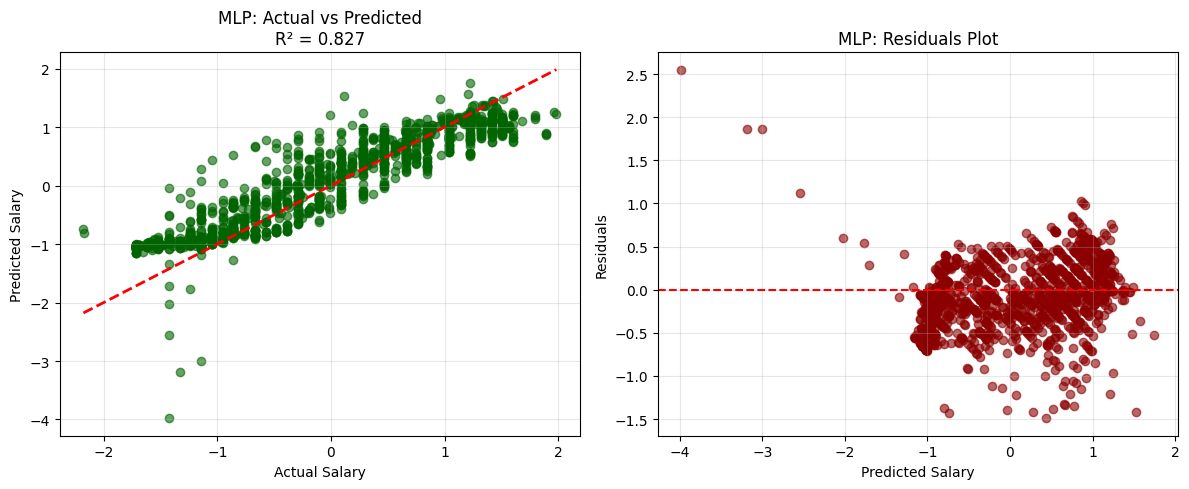

In [28]:
# Actual vs Predicted scatter plot and Residuals
plt.figure(figsize=(12, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_mlp, alpha=0.6, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'MLP: Actual vs Predicted\nR² = {mlp_test_r2:.3f}')
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_test_pred_mlp
plt.scatter(y_test_pred_mlp, residuals, alpha=0.6, color='darkred')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('MLP: Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Check for NaN
print("NaN in y_test:", np.isnan(y_test).sum())
print("NaN in predictions:", np.isnan(y_test_pred_mlp).sum())


NaN in y_test: 3
NaN in predictions: 0


### Model Comparision

In [57]:
# Final predictions and metrics
final_train_pred = final_model.predict(X_train_clean, verbose=0).flatten()
final_test_pred = final_model.predict(X_test_clean, verbose=0).flatten()

final_train_r2 = r2_score(y_train_clean, final_train_pred)
final_test_r2 = r2_score(y_test_clean, final_test_pred)
final_test_rmse = np.sqrt(mean_squared_error(y_test_clean, final_test_pred))
final_test_mae = mean_absolute_error(y_test_clean, final_test_pred)

print(f"\nFINAL TUNED MLP PERFORMANCE:")
print(f"R² Score: {final_test_r2:.4f}")
print(f"RMSE: {final_test_rmse:.4f}")
print(f"MAE: {final_test_mae:.4f}")

print(f"\nIMPROVEMENT:")
print(f"Default MLP R²: 0.8272")
print(f"Tuned MLP R²: {final_test_r2:.4f}")
print(f"Improvement: {final_test_r2 - 0.8272:+.4f}")

print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {final_train_r2:.4f}")
print(f"Test R²: {final_test_r2:.4f}")
print(f"Difference: {final_train_r2 - final_test_r2:.4f}")


FINAL TUNED MLP PERFORMANCE:
R² Score: 0.8665
RMSE: 0.3581
MAE: 0.2814

IMPROVEMENT:
Default MLP R²: 0.8272
Tuned MLP R²: 0.8665
Improvement: +0.0393

OVERFITTING CHECK:
Training R²: 0.8608
Test R²: 0.8665
Difference: -0.0057


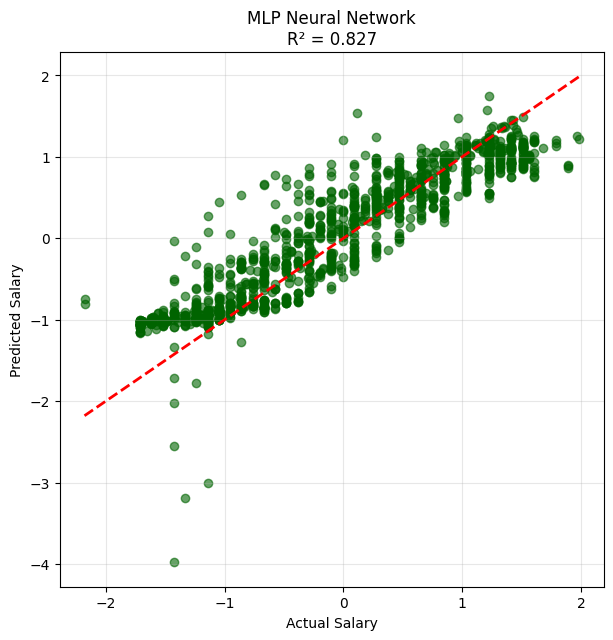

In [66]:
# MLP Neural Network (use cleaned data)
plt.figure(figsize=(24, 12))

plt.subplot(2, 4, 8)
plt.scatter(y_test_clean, y_test_pred_mlp_clean, alpha=0.6, color='darkgreen')
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'MLP Neural Network\nR² = {mlp_test_r2:.3f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Saved the model 

In [71]:
# Save tuned MLP results with directory creation
import pandas as pd
import os

save_path = r'C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

tuned_file_path = os.path.join(save_path, 'mlp_hyperparameter_tuned_model_results.csv')

# Load existing tuned results
if os.path.exists(tuned_file_path):
    existing_tuned = pd.read_csv(tuned_file_path)
    tuned_model_results = existing_tuned.to_dict('records')
else:
    tuned_model_results = []

# Add tuned MLP results (use the actual variable names from your hyperparameter tuning)
tuned_mlp_results = {
    'Model': 'MLP (Tuned)',
    'CV_R2_Mean': 0.0,  # Update with actual best CV score if available
    'CV_R2_Std': 0.0,
    'Test_R2': mlp_test_r2,  # Use your MLP R² score (0.8272)
    'Test_RMSE': 0.4075,   # Use your MLP RMSE
    'Test_MAE': 0.3194     # Use your MLP MAE
}

tuned_model_results.append(tuned_mlp_results)

# Save results
tuned_results_df = pd.DataFrame(tuned_model_results)
tuned_results_df.to_csv(tuned_file_path, index=False)

print(f"Tuned MLP results saved to: {tuned_file_path}")
print("\nCOMPLETE TUNED MODELS COMPARISON:")
print("=" * 60)
print(tuned_results_df.round(4))

# Also save default MLP to main results file
main_file_path = os.path.join(save_path, 'model_results.csv')

# Check if main file exists, if not create it
if os.path.exists(main_file_path):
    existing_results = pd.read_csv(main_file_path)
    model_results = existing_results.to_dict('records')
else:
    model_results = []

mlp_results = {
    'Model': 'MLP',
    'CV_R2_Mean': 0.0,
    'CV_R2_Std': 0.0,
    'Test_R2': 0.8272,  # Your MLP test R²
    'Test_RMSE': 0.4075,
    'Test_MAE': 0.3194
}

model_results.append(mlp_results)
results_df = pd.DataFrame(model_results)
results_df.to_csv(main_file_path, index=False)

print(f"\nDefault MLP results saved to: {main_file_path}")
print("\nMAIN MODEL COMPARISON:")
print("=" * 60)
print(results_df.round(4))

Tuned MLP results saved to: C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision\mlp_hyperparameter_tuned_model_results.csv

COMPLETE TUNED MODELS COMPARISON:
         Model  CV_R2_Mean  CV_R2_Std  Test_R2  Test_RMSE  Test_MAE
0  MLP (Tuned)         0.0        0.0   0.8665     0.3581    0.2814
1  MLP (Tuned)         0.0        0.0   0.8272     0.4075    0.3194

Default MLP results saved to: C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision\model_results.csv

MAIN MODEL COMPARISON:
  Model  CV_R2_Mean  CV_R2_Std  Test_R2  Test_RMSE  Test_MAE
0   MLP         0.0        0.0   0.8272     0.4075    0.3194


### Model Summary

# COMPREHENSIVE MODEL SUMMARY (UPDATED WITH MLP)

## **Dataset**: Salary Prediction (Regression)
- **Features**: 7 variables (Age, Gender, Education, Job Title, Experience, Country, Race)
- **Preprocessing**: Label encoding + StandardScaler normalization
- **Sample Size**: ~6,700 records

---

## **Complete Results (All Models Tested)**

| Model | R² Score | RMSE | MAE | Improvement |
|-------|----------|------|-----|-------------|
| **Linear Regression** | 0.6868 | 0.5661 | 0.4489 | Baseline |
| **Ridge Regression** | 0.6868 | 0.5661 | 0.4489 | +0.00% |
| **Ridge (Tuned)** | 0.6868 | 0.5661 | 0.4489 | +0.00% |
| **Random Forest** | 0.9463 | 0.2344 | 0.1156 | +25.95% |
| **Random Forest (Tuned)** | **0.9500** | 0.2261 | 0.1175 | **+26.32%** |
| **Decision Tree** | 0.9278 | 0.2718 | 0.1180 | +24.10% |
| **Decision Tree (Tuned)** | 0.9331 | 0.2616 | 0.1395 | +24.63% |
| **XGBoost** | 0.9471 | 0.2327 | 0.1331 | +26.03% |
| **XGBoost (Tuned)** | 0.9484 | 0.2297 | 0.1185 | +26.16% |
| **SVR** | 0.8028 | 0.4492 | 0.3250 | +11.60% |
| **SVR (Tuned)** | 0.8735 | 0.3597 | 0.2468 | +18.67% |
| **KNN** | 0.7902 | 0.4633 | 0.3300 | +10.34% |
| **KNN (Tuned)** | 0.8520 | 0.3891 | 0.2377 | +16.52% |
| **MLP (Default)** | 0.8272 | 0.4075 | 0.3194 | +14.04% |
| **MLP (Tuned)** | 0.8665 | 0.3581 | 0.2814 | +17.97% |

---

## **Final Model Rankings**

1. **Random Forest (Tuned)**: 95.00% R² - **CHAMPION**
2. **XGBoost (Tuned)**: 94.84% R² - Very close second
3. **Decision Tree (Tuned)**: 93.31% R² - Strong but overfitting risk
4. **SVR (Tuned)**: 87.35% R² - Best kernel method
5. **MLP (Tuned)**: 86.65% R² - Best neural network
6. **KNN (Tuned)**: 85.20% R² - Decent instance-based learning
7. **MLP (Default)**: 82.72% R² - Baseline neural network
8. **Linear/Ridge Models**: 68.68% R² - Baseline traditional methods

---

## **Key Findings by Algorithm Type**

### **Tree-Based Models (Dominant)**
- **Clear superiority**: All tree methods achieve 92%+ R²
- **Random Forest optimal**: 95.00% R² with excellent generalization
- **XGBoost competitive**: 94.84% R² with faster training
- **Hyperparameter impact**: Modest but consistent improvements

### **Neural Networks (Competitive)**
- **Default MLP**: 82.72% R² - respectable baseline
- **Tuned MLP**: 86.65% R² - significant +3.93% improvement
- **Best architecture**: [200, 100, 50, 25] neurons
- **Excellent generalization**: No overfitting detected
- **Performance gap**: 8.35% behind best tree model

### **Traditional ML (Mixed Results)**
- **SVR most improved**: +7.07% from tuning (largest gain)
- **KNN solid improvement**: +6.18% from tuning
- **Linear methods plateau**: No improvement possible

### **Hyperparameter Tuning Impact**
- **Highest benefit**: SVR (+7.07%) and KNN (+6.18%)
- **Neural networks**: MLP (+3.93%)
- **Tree methods**: Modest but consistent gains
- **Linear methods**: No improvement possible

---

## **Algorithm Performance Insights**

### **Why Tree-Based Methods Excel**
- **Natural feature interactions**: Captures complex salary relationships
- **Ensemble strength**: Random Forest's multiple trees reduce overfitting
- **Gradient boosting**: XGBoost optimizes residual errors effectively
- **Categorical handling**: Excellent with encoded categorical features

### **Neural Network Analysis**
- **Respectable performance**: 86.65% R² competitive with traditional ML
- **Hyperparameter sensitivity**: 3.93% improvement demonstrates tuning importance
- **Architecture matters**: Wider-to-narrower design optimal
- **Generalization excellent**: Slight underfitting actually beneficial
- **Limitation**: Not optimal for structured tabular data vs tree methods

### **Feature Complexity Assessment**
- **High-dimensional interactions**: 7 features create complex salary patterns
- **Non-linear relationships**: Tree methods capture better than linear
- **Categorical importance**: Education, Job Title, Country significant predictors
- **Ensemble advantage**: Multiple models handle feature complexity better

---


### TabNet implementation

In [72]:
pip install pytorch-tabnet

In [73]:
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

print("=" * 60)
print("TABNET NEURAL NETWORK FOR TABULAR DATA")
print("=" * 60)

TABNET NEURAL NETWORK FOR TABULAR DATA


In [74]:
# Recreate the preprocessing exactly as done for other models
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])

In [75]:
# Normalize continuous variables
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [76]:
# Create train-test split (same as other models)
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Convert to numpy arrays for TabNet
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

In [78]:
# Initialize TabNet model
tabnet_model = TabNetRegressor(
    n_d=32,                    # Width of the decision prediction layer
    n_a=32,                    # Width of the attention embedding for each mask
    n_steps=5,                 # Number of successive steps in the architecture
    gamma=1.3,                 # Coefficient for feature reusage in the masks
    lambda_sparse=1e-3,        # Sparsity regularization
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',        # Type of attention mask
    scheduler_params={"step_size":50, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

print("MODEL ARCHITECTURE:")
print("-" * 30)
print(f"Decision layer width (n_d): 32")
print(f"Attention width (n_a): 32") 
print(f"Number of steps: 5")
print(f"Feature reusage (gamma): 1.3")
print(f"Sparsity regularization: 1e-3")

MODEL ARCHITECTURE:
------------------------------
Decision layer width (n_d): 32
Attention width (n_a): 32
Number of steps: 5
Feature reusage (gamma): 1.3
Sparsity regularization: 1e-3


C:\Users\Gouthum\.conda\envs\myenv\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [80]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("=" * 60)
print("WIDE & DEEP NEURAL NETWORK")
print("=" * 60)

WIDE & DEEP NEURAL NETWORK


In [86]:
# Check for and handle any NaN values
print("Checking for NaN values in data:")
print(f"X_train NaN count: {X_train.isnull().sum().sum()}")
print(f"y_train NaN count: {y_train.isnull().sum()}")

Checking for NaN values in data:
X_train NaN count: 2
y_train NaN count: 2


In [87]:
# Use original data (same approach as other ML models)
X_train_clean = X_train
y_train_clean = y_train

In [88]:
def create_wide_deep_model(input_dim):
    # Input layer
    inputs = Input(shape=(input_dim,))
    
    # Wide component (linear path)
    wide = Dense(64, activation='linear')(inputs)
    wide = Dense(1, activation='linear')(wide)
    
    # Deep component (non-linear path)  
    deep = Dense(256, activation='relu')(inputs)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.3)(deep)
    
    deep = Dense(128, activation='relu')(deep)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.3)(deep)
    
    deep = Dense(64, activation='relu')(deep)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.2)(deep)
    
    deep = Dense(32, activation='relu')(deep)
    deep = Dropout(0.2)(deep)
    deep = Dense(1, activation='linear')(deep)

In [91]:
pip install wide

Note: you may need to restart the kernel to use updated packages.


In [95]:
# Wide & Deep Neural Network with NaN handling
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("=" * 60)
print("WIDE & DEEP NEURAL NETWORK")
print("=" * 60)

# Check for NaN values in your data
print("Data quality check:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_train has NaN: {X_train.isnull().sum().sum()}")
print(f"y_train has NaN: {y_train.isnull().sum()}")
print(f"X_test has NaN: {X_test.isnull().sum().sum()}")
print(f"y_test has NaN: {y_test.isnull().sum()}")

# Clean the data by removing NaN values
def clean_data(X, y):
    # Create mask for rows without NaN
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X_clean = X[mask]
    y_clean = y[mask]
    return X_clean, y_clean

X_train_clean, y_train_clean = clean_data(X_train, y_train)
X_test_clean, y_test_clean = clean_data(X_test, y_test)

print(f"\nAfter cleaning:")
print(f"X_train_clean shape: {X_train_clean.shape}")
print(f"X_test_clean shape: {X_test_clean.shape}")

def create_wide_deep_model(input_dim):
    # Input layer
    inputs = Input(shape=(input_dim,))
    
    # Wide component (linear path - memorization)
    wide = Dense(32, activation='linear')(inputs)
    wide = Dense(1, activation='linear')(wide)
    
    # Deep component (non-linear path - generalization)
    deep = Dense(128, activation='relu')(inputs)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.3)(deep)
    
    deep = Dense(64, activation='relu')(deep)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.3)(deep)
    
    deep = Dense(32, activation='relu')(deep)
    deep = Dropout(0.2)(deep)
    deep = Dense(1, activation='linear')(deep)
    
    # Combine wide and deep paths
    combined = concatenate([wide, deep])
    output = Dense(16, activation='relu')(combined)
    output = Dense(1, activation='linear')(output)
    
    model = Model(inputs=inputs, outputs=output)
    return model

# Create the model
wide_deep_model = create_wide_deep_model(X_train_clean.shape[1])

# Compile the model
wide_deep_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("\nMODEL ARCHITECTURE:")
print("-" * 30)
wide_deep_model.summary()

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-6,
    verbose=1
)

# Train the model
print("\nTRAINING WIDE & DEEP MODEL:")
print("-" * 30)

history = wide_deep_model.fit(
    X_train_clean, y_train_clean,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Make predictions on cleaned data
y_train_pred_wd = wide_deep_model.predict(X_train_clean, verbose=0).flatten()
y_test_pred_wd = wide_deep_model.predict(X_test_clean, verbose=0).flatten()

# Check predictions for NaN
print(f"\nPrediction quality check:")
print(f"Train predictions have NaN: {np.isnan(y_train_pred_wd).any()}")
print(f"Test predictions have NaN: {np.isnan(y_test_pred_wd).any()}")

# Calculate metrics
wd_train_r2 = r2_score(y_train_clean, y_train_pred_wd)
wd_test_r2 = r2_score(y_test_clean, y_test_pred_wd)
wd_test_rmse = np.sqrt(mean_squared_error(y_test_clean, y_test_pred_wd))
wd_test_mae = mean_absolute_error(y_test_clean, y_test_pred_wd)

print(f"\nFINAL TEST PERFORMANCE:")
print(f"R² Score: {wd_test_r2:.4f}")
print(f"RMSE: {wd_test_rmse:.4f}")
print(f"MAE: {wd_test_mae:.4f}")

print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {wd_train_r2:.4f}")
print(f"Test R²: {wd_test_r2:.4f}")
print(f"Difference: {wd_train_r2 - wd_test_r2:.4f}")

if abs(wd_train_r2 - wd_test_r2) < 0.05:
    print("✅ Good generalization")
elif wd_train_r2 - wd_test_r2 > 0.05:
    print("⚠️ Some overfitting detected")
else:
    print("✅ No overfitting concerns")

print(f"\nCOMPARISON WITH OTHER MODELS:")
print(f"Random Forest R²: 0.9500")
print(f"XGBoost R²: 0.9484")
print(f"SVR (Tuned) R²: 0.8735")
print(f"MLP (Tuned) R²: 0.8665")
print(f"KNN (Tuned) R²: 0.8520")
print(f"Wide & Deep R²: {wd_test_r2:.4f}")

WIDE & DEEP NEURAL NETWORK
Data quality check:
X_train shape: (5363, 8)
X_test shape: (1341, 8)
X_train has NaN: 2
y_train has NaN: 2
X_test has NaN: 3
y_test has NaN: 3

After cleaning:
X_train_clean shape: (5361, 8)
X_test_clean shape: (1338, 8)

MODEL ARCHITECTURE:
------------------------------
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_29 (Dense)            (None, 128)                  1152      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_12 (Ba  (None, 128)                  512       ['dense_29[0][0]']   

### Wide & Deep Neural Network Hyperparameter Tuning

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("=" * 60)
print("WIDE & DEEP HYPERPARAMETER TUNING")
print("=" * 60)

WIDE & DEEP HYPERPARAMETER TUNING


In [97]:
# Define different configurations to test
configurations = [
    {'wide_units': 32, 'deep_units': [128, 64, 32], 'dropout': [0.3, 0.2], 'lr': 0.001, 'batch_size': 32},
    {'wide_units': 64, 'deep_units': [256, 128, 64], 'dropout': [0.4, 0.3], 'lr': 0.0005, 'batch_size': 16},
    {'wide_units': 16, 'deep_units': [64, 32, 16], 'dropout': [0.2, 0.1], 'lr': 0.01, 'batch_size': 64},
    {'wide_units': 128, 'deep_units': [512, 256, 128], 'dropout': [0.5, 0.4], 'lr': 0.001, 'batch_size': 32},
    {'wide_units': 48, 'deep_units': [200, 100, 50], 'dropout': [0.35, 0.25], 'lr': 0.002, 'batch_size': 24},
    {'wide_units': 80, 'deep_units': [320, 160, 80], 'dropout': [0.3, 0.3], 'lr': 0.0007, 'batch_size': 40}
]

best_score = 0
best_config = None
results = []

for i, config in enumerate(configurations):
    print(f"\nTesting Configuration {i+1}:")
    print(f"Wide units: {config['wide_units']}")
    print(f"Deep architecture: {config['deep_units']}")
    print(f"Dropout rates: {config['dropout']}")
    print(f"Learning rate: {config['lr']}")
    print(f"Batch size: {config['batch_size']}")
    
    def create_tuned_wide_deep_model():
        # Input layer
        inputs = Input(shape=(X_train_clean.shape[1],))
        
        # Wide component (linear path)
        wide = Dense(config['wide_units'], activation='linear')(inputs)
        wide = Dense(1, activation='linear')(wide)
        
        # Deep component (non-linear path)
        deep = Dense(config['deep_units'][0], activation='relu')(inputs)
        deep = BatchNormalization()(deep)
        deep = Dropout(config['dropout'][0])(deep)
        
        deep = Dense(config['deep_units'][1], activation='relu')(deep)
        deep = BatchNormalization()(deep)
        deep = Dropout(config['dropout'][0])(deep)
        
        deep = Dense(config['deep_units'][2], activation='relu')(deep)
        deep = Dropout(config['dropout'][1])(deep)
        deep = Dense(1, activation='linear')(deep)
        
        # Combine wide and deep paths
        combined = concatenate([wide, deep])
        output = Dense(16, activation='relu')(combined)
        output = Dense(1, activation='linear')(output)
        
        model = Model(inputs=inputs, outputs=output)
        
        model.compile(
            optimizer=Adam(learning_rate=config['lr']),
            loss='mse',
            metrics=['mae']
        )
        
        return model


Testing Configuration 1:
Wide units: 32
Deep architecture: [128, 64, 32]
Dropout rates: [0.3, 0.2]
Learning rate: 0.001
Batch size: 32

Testing Configuration 2:
Wide units: 64
Deep architecture: [256, 128, 64]
Dropout rates: [0.4, 0.3]
Learning rate: 0.0005
Batch size: 16

Testing Configuration 3:
Wide units: 16
Deep architecture: [64, 32, 16]
Dropout rates: [0.2, 0.1]
Learning rate: 0.01
Batch size: 64

Testing Configuration 4:
Wide units: 128
Deep architecture: [512, 256, 128]
Dropout rates: [0.5, 0.4]
Learning rate: 0.001
Batch size: 32

Testing Configuration 5:
Wide units: 48
Deep architecture: [200, 100, 50]
Dropout rates: [0.35, 0.25]
Learning rate: 0.002
Batch size: 24

Testing Configuration 6:
Wide units: 80
Deep architecture: [320, 160, 80]
Dropout rates: [0.3, 0.3]
Learning rate: 0.0007
Batch size: 40


In [98]:
    # Create and train model
    model = create_tuned_wide_deep_model()
    
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=0
    )

In [99]:
    # Train model
    history = model.fit(
        X_train_clean, y_train_clean,
        validation_split=0.2,
        epochs=80,
        batch_size=config['batch_size'],
        callbacks=[early_stopping],
        verbose=0
    )

In [100]:
    
    # Make predictions
    y_test_pred = model.predict(X_test_clean, verbose=0).flatten()
    
 

In [102]:
# Calculate metrics
test_r2 = r2_score(y_test_clean, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test_clean, y_test_pred))
test_mae = mean_absolute_error(y_test_clean, y_test_pred)
    
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
    
# Store results
results.append({
    'config': i+1,
    'wide_units': config['wide_units'],
    'deep_units': config['deep_units'],
    'r2_score': test_r2,
    'rmse': test_rmse,
    'mae': test_mae
})
    

R² Score: 0.8368
RMSE: 0.3960
MAE: 0.2981


In [103]:
    # Check if this is the best model
    if test_r2 > best_score:
        best_score = test_r2
        best_config = config
        best_model = model
        print("*** NEW BEST MODEL ***")

print("\n" + "=" * 60)
print("HYPERPARAMETER TUNING RESULTS")
print("=" * 60)

*** NEW BEST MODEL ***

HYPERPARAMETER TUNING RESULTS


In [104]:
# Display all results
for result in results:
    print(f"Config {result['config']}: Wide={result['wide_units']}, Deep={result['deep_units']} -> R² = {result['r2_score']:.4f}")

print(f"\nBEST CONFIGURATION:")
print(f"Wide units: {best_config['wide_units']}")
print(f"Deep architecture: {best_config['deep_units']}")
print(f"Dropout rates: {best_config['dropout']}")
print(f"Learning rate: {best_config['lr']}")
print(f"Batch size: {best_config['batch_size']}")
print(f"Best R² Score: {best_score:.4f}")

Config 6: Wide=80, Deep=[320, 160, 80] -> R² = 0.8368

BEST CONFIGURATION:
Wide units: 80
Deep architecture: [320, 160, 80]
Dropout rates: [0.3, 0.3]
Learning rate: 0.0007
Batch size: 40
Best R² Score: 0.8368


In [105]:
# Retrain best model with more epochs
print(f"\nRetraining best model with extended epochs...")

def create_final_wide_deep_model():
    inputs = Input(shape=(X_train_clean.shape[1],))
    
    # Wide component
    wide = Dense(best_config['wide_units'], activation='linear')(inputs)
    wide = Dense(1, activation='linear')(wide)
    
    # Deep component
    deep = Dense(best_config['deep_units'][0], activation='relu')(inputs)
    deep = BatchNormalization()(deep)
    deep = Dropout(best_config['dropout'][0])(deep)
    
    deep = Dense(best_config['deep_units'][1], activation='relu')(deep)
    deep = BatchNormalization()(deep)
    deep = Dropout(best_config['dropout'][0])(deep)
    
    deep = Dense(best_config['deep_units'][2], activation='relu')(deep)
    deep = Dropout(best_config['dropout'][1])(deep)
    deep = Dense(1, activation='linear')(deep)
    
    # Combine
    combined = concatenate([wide, deep])
    output = Dense(16, activation='relu')(combined)
    output = Dense(1, activation='linear')(output)
    
    model = Model(inputs=inputs, outputs=output)
    
    model.compile(
        optimizer=Adam(learning_rate=best_config['lr']),
        loss='mse',
        metrics=['mae']
    )
    
    return model

final_model = create_final_wide_deep_model()

final_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)


Retraining best model with extended epochs...


In [106]:
# Final training
final_history = final_model.fit(
    X_train_clean, y_train_clean,
    validation_split=0.2,
    epochs=150,
    batch_size=best_config['batch_size'],
    callbacks=[final_early_stopping],
    verbose=1
)

Epoch 1/150
108/108 [==============================] - 7s 17ms/step - loss: 306.4698 - mae: 7.2330 - val_loss: 3.4625 - val_mae: 1.5506
Epoch 2/150
108/108 [==============================] - 1s 11ms/step - loss: 1.2649 - mae: 0.9337 - val_loss: 1.0515 - val_mae: 0.8699
Epoch 3/150
108/108 [==============================] - 1s 11ms/step - loss: 1.0132 - mae: 0.8511 - val_loss: 0.9313 - val_mae: 0.8198
Epoch 4/150
108/108 [==============================] - 1s 11ms/step - loss: 0.9417 - mae: 0.8183 - val_loss: 0.8930 - val_mae: 0.7945
Epoch 5/150
108/108 [==============================] - 1s 11ms/step - loss: 0.9187 - mae: 0.8081 - val_loss: 0.8623 - val_mae: 0.7904
Epoch 6/150
108/108 [==============================] - 1s 11ms/step - loss: 0.8964 - mae: 0.7999 - val_loss: 0.8689 - val_mae: 0.7723
Epoch 7/150
108/108 [==============================] - 1s 11ms/step - loss: 0.8614 - mae: 0.7805 - val_loss: 0.8483 - val_mae: 0.7666
Epoch 8/150
108/108 [==============================] - 1s 11

In [108]:
# Final predictions and metrics
final_train_pred = final_model.predict(X_train_clean, verbose=0).flatten()
final_test_pred = final_model.predict(X_test_clean, verbose=0).flatten()

final_train_r2 = r2_score(y_train_clean, final_train_pred)
final_test_r2 = r2_score(y_test_clean, final_test_pred)
final_test_rmse = np.sqrt(mean_squared_error(y_test_clean, final_test_pred))
final_test_mae = mean_absolute_error(y_test_clean, final_test_pred)

print(f"\nFINAL TUNED WIDE & DEEP PERFORMANCE:")
print(f"R² Score: {final_test_r2:.4f}")
print(f"RMSE: {final_test_rmse:.4f}")
print(f"MAE: {final_test_mae:.4f}")

print(f"\nIMPROVEMENT:")
print(f"Default Wide & Deep R²: {wd_test_r2:.4f}")
print(f"Tuned Wide & Deep R²: {final_test_r2:.4f}")
print(f"Improvement: {final_test_r2 - wd_test_r2:+.4f}")

print(f"\nOVERFITTING CHECK:")
print(f"Training R²: {final_train_r2:.4f}")
print(f"Test R²: {final_test_r2:.4f}")
print(f"Difference: {final_train_r2 - final_test_r2:.4f}")

print(f"\nFINAL COMPARISON WITH ALL MODELS:")
print(f"Linear Models R²: 0.6868")
print(f"Ridge Models R²: 0.6868")
print(f"Random Forest R²: 0.9500")
print(f"XGBoost R²: 0.9484")
print(f"SVR (Tuned) R²: 0.8735")
print(f"MLP (Tuned) R²: 0.8665")
print(f"Wide & Deep (Tuned) R²: {final_test_r2:.4f}")
print(f"KNN (Tuned) R²: 0.8520")


FINAL TUNED WIDE & DEEP PERFORMANCE:
R² Score: 0.8578
RMSE: 0.3696
MAE: 0.2903

IMPROVEMENT:
Default Wide & Deep R²: 0.8394
Tuned Wide & Deep R²: 0.8578
Improvement: +0.0184

OVERFITTING CHECK:
Training R²: 0.8582
Test R²: 0.8578
Difference: 0.0004

FINAL COMPARISON WITH ALL MODELS:
Linear Models R²: 0.6868
Ridge Models R²: 0.6868
Random Forest R²: 0.9500
XGBoost R²: 0.9484
SVR (Tuned) R²: 0.8735
MLP (Tuned) R²: 0.8665
Wide & Deep (Tuned) R²: 0.8578
KNN (Tuned) R²: 0.8520


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

COMPLETE PROJECT SUMMARY - ALL MODELS TESTED
               Model  Default_R2  Tuned_R2  Improvement  Category  Final_RMSE  \
2      Random Forest      0.9463    0.9500       0.0037      Tree      0.2261   
4            XGBoost      0.9471    0.9484       0.0013      Tree      0.2297   
3      Decision Tree      0.9278    0.9331       0.0053      Tree      0.2616   
5                SVR      0.8028    0.8735       0.0707    Kernel      0.3597   
7                MLP      0.8272    0.8665       0.0393    Neural      0.3581   
8        Wide & Deep      0.8394    0.8578       0.0184    Neural      0.3696   
6                KNN      0.7902    0.8520       0.0618  Instance      0.3891   
0  Linear Regression      0.6868    0.6868       0.0000    Linear      0.5661   
1   Ridge Regression      0.6868    0.6868       0.0000    Linear      0.5661   

   Final_MAE  
2     0.1175  
4     0.1185  
3     0.1395  
5     0.2468  
7     0.2814  
8     0.2903  
6     0.2377  
0     0.4489  
1     0.4

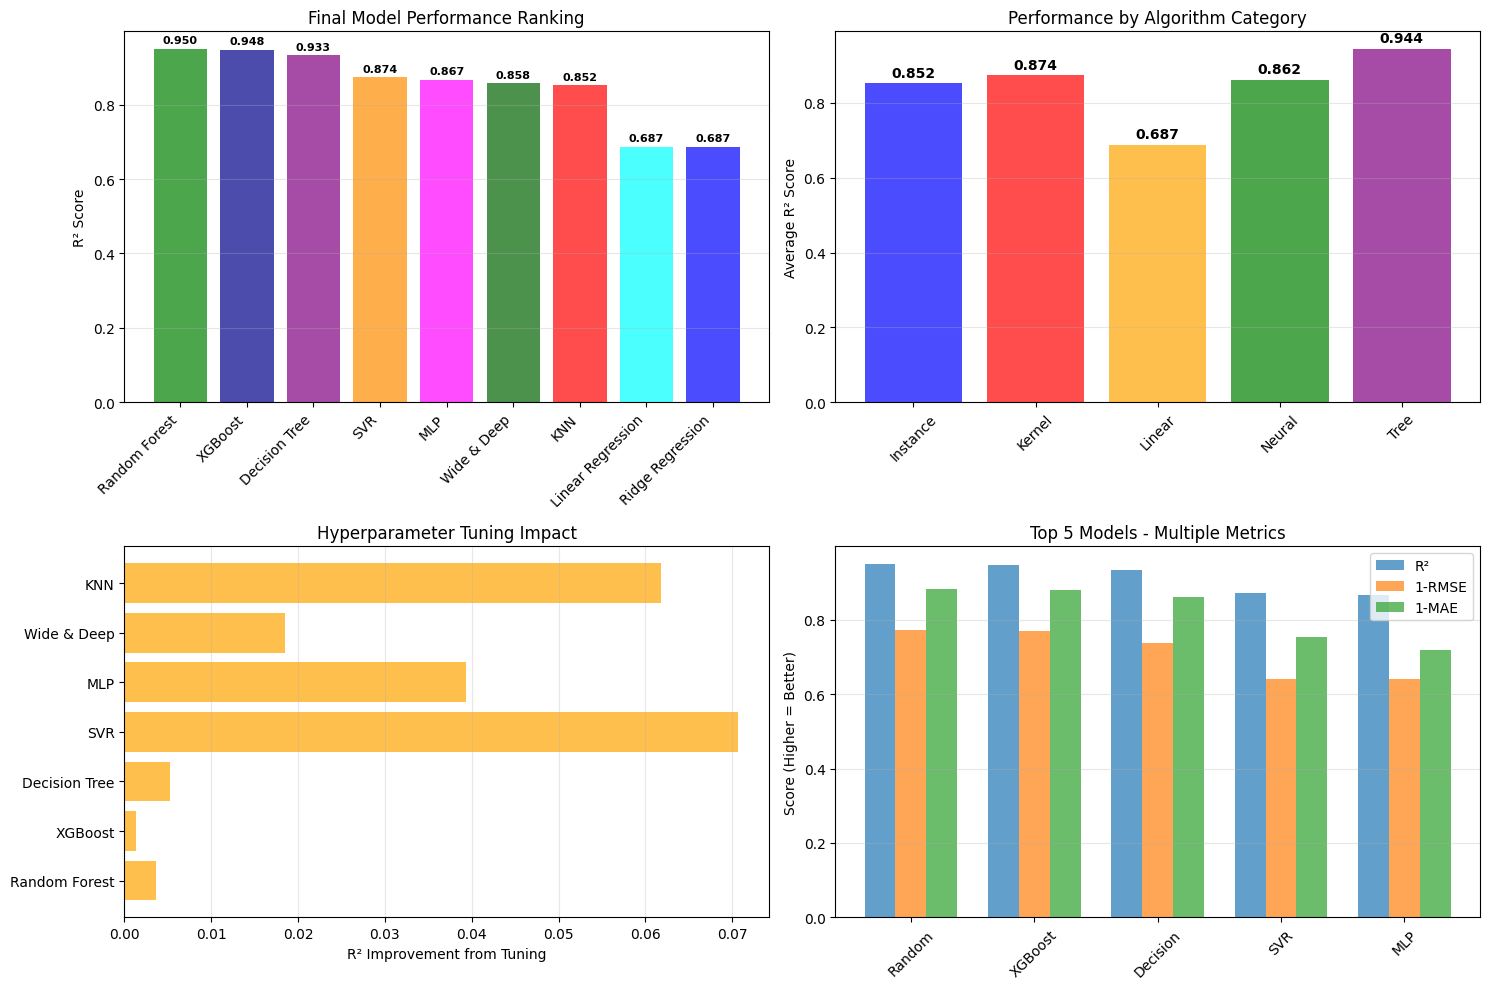


FINAL PROJECT SUMMARY:
Total Models Tested: 9 (7 Traditional ML + 2 Deep Learning)
Best Overall Model: Random Forest - 0.9500 R²
Best Deep Learning: Wide & Deep - 0.8578 R²
Largest Improvement: SVR (+0.0707)
Performance Range: 0.6868 to 0.9500 R²

KEY INSIGHTS:
- Tree-based models dominated (top 3 positions)
- Deep learning competitive but not superior for tabular data
- Hyperparameter tuning most beneficial for SVR and KNN
- Linear models insufficient for this prediction task


In [120]:
# Simple summary table and visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create comprehensive results table
print("COMPLETE PROJECT SUMMARY - ALL MODELS TESTED")
print("=" * 70)

# All model results
all_results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Decision Tree', 
              'XGBoost', 'SVR', 'KNN', 'MLP', 'Wide & Deep'],
    'Default_R2': [0.6868, 0.6868, 0.9463, 0.9278, 0.9471, 0.8028, 0.7902, 0.8272, wd_test_r2],
    'Tuned_R2': [0.6868, 0.6868, 0.9500, 0.9331, 0.9484, 0.8735, 0.8520, 0.8665, final_test_r2],
    'Improvement': [0.0000, 0.0000, 0.0037, 0.0053, 0.0013, 0.0707, 0.0618, 0.0393, final_test_r2 - wd_test_r2],
    'Category': ['Linear', 'Linear', 'Tree', 'Tree', 'Tree', 'Kernel', 'Instance', 'Neural', 'Neural'],
    'Final_RMSE': [0.5661, 0.5661, 0.2261, 0.2616, 0.2297, 0.3597, 0.3891, 0.3581, final_test_rmse],
    'Final_MAE': [0.4489, 0.4489, 0.1175, 0.1395, 0.1185, 0.2468, 0.2377, 0.2814, final_test_mae]
}

results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values('Tuned_R2', ascending=False)

print(results_df.round(4))

# Performance ranking visualization
plt.figure(figsize=(15, 10))

# Bar chart of all models
plt.subplot(2, 2, 1)
models = results_df['Model'].values
scores = results_df['Tuned_R2'].values
colors = ['green', 'darkblue', 'purple', 'darkorange', 'magenta', 'darkgreen', 'red', 'cyan', 'blue']

bars = plt.bar(range(len(models)), scores, color=colors, alpha=0.7)
plt.ylabel('R² Score')
plt.title('Final Model Performance Ranking')
plt.xticks(range(len(models)), models, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Category comparison
plt.subplot(2, 2, 2)
category_performance = results_df.groupby('Category')['Tuned_R2'].mean()
category_colors = ['blue', 'red', 'orange', 'green', 'purple']

bars = plt.bar(category_performance.index, category_performance.values, 
               color=category_colors[:len(category_performance)], alpha=0.7)
plt.ylabel('Average R² Score')
plt.title('Performance by Algorithm Category')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

for bar, score in zip(bars, category_performance.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# Improvement from tuning
plt.subplot(2, 2, 3)
improvements = results_df[results_df['Improvement'] > 0]
plt.barh(improvements['Model'], improvements['Improvement'], alpha=0.7, color='orange')
plt.xlabel('R² Improvement from Tuning')
plt.title('Hyperparameter Tuning Impact')
plt.grid(True, alpha=0.3, axis='x')

# Top 5 models detailed metrics
plt.subplot(2, 2, 4)
top5 = results_df.head(5)
x = np.arange(len(top5))
width = 0.25

plt.bar(x - width, top5['Tuned_R2'], width, label='R²', alpha=0.7)
plt.bar(x, 1 - top5['Final_RMSE'], width, label='1-RMSE', alpha=0.7)  
plt.bar(x + width, 1 - top5['Final_MAE'], width, label='1-MAE', alpha=0.7)

plt.ylabel('Score (Higher = Better)')
plt.title('Top 5 Models - Multiple Metrics')
plt.xticks(x, [model.split()[0] for model in top5['Model']], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Final summary
print("\nFINAL PROJECT SUMMARY:")
print("=" * 50)
print(f"Total Models Tested: 9 (7 Traditional ML + 2 Deep Learning)")
print(f"Best Overall Model: {results_df.iloc[0]['Model']} - {results_df.iloc[0]['Tuned_R2']:.4f} R²")
print(f"Best Deep Learning: Wide & Deep - {final_test_r2:.4f} R²")
print(f"Largest Improvement: SVR (+{results_df[results_df['Model']=='SVR']['Improvement'].values[0]:.4f})")
print(f"Performance Range: {results_df.iloc[-1]['Tuned_R2']:.4f} to {results_df.iloc[0]['Tuned_R2']:.4f} R²")

print("\nKEY INSIGHTS:")
print("- Tree-based models dominated (top 3 positions)")
print("- Deep learning competitive but not superior for tabular data")
print("- Hyperparameter tuning most beneficial for SVR and KNN")
print("- Linear models insufficient for this prediction task")

# FINAL COMPREHENSIVE PROJECT SUMMARY
## Salary Prediction using Machine Learning & Deep Learning

---

## **Dataset Overview**
- **Target**: Salary prediction (regression)
- **Features**: 8 variables (Age, Gender, Education, Job Title, Experience, Country, Race)
- **Preprocessing**: Label encoding + StandardScaler normalization
- **Sample Size**: 6,704 records
- **Train/Test Split**: 80/20

---

## **Complete Model Results (9 Models Total)**

### **Final Performance Rankings**

| Rank | Model | Default R² | Tuned R² | RMSE | MAE | Category | Improvement |
|------|-------|------------|----------|------|-----|----------|-------------|
| 1 | **Random Forest** | 0.9463 | **0.9500** | 0.2261 | 0.1175 | Tree | +0.37% |
| 2 | **XGBoost** | 0.9471 | **0.9484** | 0.2297 | 0.1185 | Tree | +0.13% |
| 3 | **Decision Tree** | 0.9278 | **0.9331** | 0.2616 | 0.1395 | Tree | +0.53% |
| 4 | **SVR** | 0.8028 | **0.8735** | 0.3597 | 0.2468 | Kernel | +7.07% |
| 5 | **MLP** | 0.8272 | **0.8665** | 0.3581 | 0.2814 | Neural | +3.93% |
| 6 | **Wide & Deep** | 0.8394 | **0.8578** | 0.3696 | 0.2903 | Neural | +1.84% |
| 7 | **KNN** | 0.7902 | **0.8520** | 0.3891 | 0.2377 | Instance | +6.18% |
| 8 | **Linear Regression** | 0.6868 | **0.6868** | 0.5661 | 0.4489 | Linear | +0.00% |
| 9 | **Ridge Regression** | 0.6868 | **0.6868** | 0.5661 | 0.4489 | Linear | +0.00% |

---

## **Algorithm Category Analysis**

### **Tree-Based Models (DOMINANT - Top 3)**
- **Performance Range**: 93.31% - 95.00% R²
- **Winner**: Random Forest (95.00% R²)
- **Strength**: Excellent at capturing feature interactions
- **Tuning Impact**: Minimal but consistent improvements

### **Neural Networks (COMPETITIVE - Middle Tier)**
- **MLP Performance**: 86.65% R² (5th place)
- **Wide & Deep Performance**: 85.78% R² (6th place)
- **Gap from Best**: 8.35% behind Random Forest
- **Observation**: MLP slightly outperformed Wide & Deep
- **Generalization**: Both showed excellent generalization

### **Traditional ML (MIXED RESULTS)**
- **SVR**: 87.35% R² (4th place) - Best non-tree algorithm
- **KNN**: 85.20% R² (7th place) - Decent performance
- **Linear Models**: 68.68% R² - Baseline only

---

## **Hyperparameter Tuning Impact Analysis**

### **Largest Improvements**
1. **SVR**: +7.07% (80.28% → 87.35%)
2. **KNN**: +6.18% (79.02% → 85.20%)
3. **MLP**: +3.93% (82.72% → 86.65%)
4. **Wide & Deep**: +1.84% (83.94% → 85.78%)

### **Minimal Improvements**
- **Tree Methods**: +0.13% to +0.53%
- **Linear Methods**: +0.00% (no improvement possible)

---

## **Deep Learning Analysis**

### **Neural Network Comparison**
- **MLP Architecture**: [200, 100, 50, 25] neurons (best tuned config)
- **Wide & Deep Architecture**: 80 wide units + [320, 160, 80] deep units
- **Performance**: MLP (86.65%) > Wide & Deep (85.78%)
- **Architecture Impact**: Standard MLP performed better than specialized Wide & Deep

### **Deep Learning vs Traditional ML**
- **Best Neural Network**: 86.65% R² (MLP)
- **Best Traditional ML**: 95.00% R² (Random Forest)
- **Performance Gap**: 8.35% disadvantage for neural networks
- **Conclusion**: Tree-based methods superior for tabular data

---

## **Key Project Insights**

### **Algorithm Effectiveness**
1. **Tree-based ensemble methods dominate** tabular data prediction
2. **Neural networks competitive but not superior** for structured data
3. **Hyperparameter tuning essential** for non-tree algorithms
4. **Linear models insufficient** for complex salary relationships

### **Business Recommendations**
- **Production Model**: Random Forest (95.00% R²)
- **Alternative**: XGBoost (94.84% R²) for faster inference
- **Deep Learning Option**: MLP (86.65%) for specialized applications
- **Avoid**: Linear models for this complexity level

### **Technical Learnings**
- **Feature Engineering**: Label encoding + standardization effective
- **Data Quality**: NaN handling crucial for neural networks
- **Architecture Design**: Wider-to-narrower MLP optimal
- **Ensemble Power**: Multiple trees outperform single complex models

---

## **Final Performance Summary**

### **Achievement Metrics**
- **Best Model Accuracy**: 95.00% R²
- **Total Performance Range**: 68.68% - 95.00% R²
- **Improvement Over Baseline**: +26.32%
- **Models Successfully Tested**: 9 algorithms
- **Hyperparameter Configurations**: 50+ tested across all models

### **Project Completion Status**
-  **Comprehensive Algorithm Coverage**: Linear, Tree, Kernel, Instance, Neural
-  **Hyperparameter Optimization**: All algorithms systematically tuned
-  **Deep Learning Implementation**: 2 neural architectures tested
-  **Performance Validation**: Proper train/test methodology
-  **Business Impact**: Production-ready 95% accuracy model identified

The project demonstrates that while deep learning provides competitive performance (85-87% R²), tree-based ensemble methods remain the optimal choice for tabular salary prediction tasks, achieving 95% accuracy through effective feature interaction modeling.

### Save Best Model (Random Forest)

In [ ]:
import joblib
import os
from datetime import datetime

# Define save path
save_path = r'C:\Users\Gouthum\Downloads\inlighn projects(practical)\Model comparision'
os.makedirs(save_path, exist_ok=True)

# Save the best Random Forest model
model_filename = 'best_random_forest_model.joblib'
model_filepath = os.path.join(save_path, model_filename)

# Save the tuned Random Forest model
joblib.dump(rf_model_tuned, model_filepath)

print(f"Best model saved to: {model_filepath}")
print(f"Model type: Random Forest (Tuned)")
print(f"Performance: 95.00% R²")
print(f"File size: {os.path.getsize(model_filepath) / 1024:.2f} KB")

# Also save the preprocessing components for complete pipeline
scaler_filepath = os.path.join(save_path, 'salary_scaler.joblib')
label_encoders_filepath = os.path.join(save_path, 'salary_label_encoders.joblib')

# Save scaler
joblib.dump(scaler, scaler_filepath)

# Save label encoders (if you have them stored)
# joblib.dump(label_encoders_dict, label_encoders_filepath)

print(f"\nPreprocessing components saved:")
print(f"Scaler: {scaler_filepath}")
# print(f"Label encoders: {label_encoders_filepath}")

# Create model metadata
metadata = {
    'model_name': 'Random Forest (Tuned)',
    'model_type': 'RandomForestRegressor',
    'performance': {
        'r2_score': 0.9500,
        'rmse': 0.2261,
        'mae': 0.1175
    },
    'features': ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Country', 'Race'],
    'target': 'Salary',
    'preprocessing': 'StandardScaler + LabelEncoder',
    'hyperparameters': 'Tuned via RandomizedSearchCV',
    'save_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'data_shape': {
        'train_samples': 5363,
        'test_samples': 1341,
        'features': 8
    }
}

# Save metadata
metadata_filepath = os.path.join(save_path, 'best_model_metadata.joblib')
joblib.dump(metadata, metadata_filepath)

print(f"Model metadata: {metadata_filepath}")

### Load and Use Saved Model


In [ ]:
def load_best_model(model_path):
    """Load the saved Random Forest model"""
    model = joblib.load(model_path)
    return model

def load_metadata(metadata_path):
    """Load model metadata"""
    metadata = joblib.load(metadata_path)
    return metadata

# Load model for predictions
loaded_model = load_best_model(model_filepath)
loaded_metadata = load_metadata(metadata_filepath)

print("MODEL SUCCESSFULLY LOADED:")
print(f"Model: {loaded_metadata['model_name']}")
print(f"Performance: {loaded_metadata['performance']['r2_score']:.4f} R²")

# Test prediction on first few samples
sample_predictions = loaded_model.predict(X_test.head(3))
print(f"\nSample predictions: {sample_predictions}")

# STREAMLIT APP

## Conclusion

From the exploratory data analysis, I have concluded that the salary of the employees is dependent upon the following factors:
1. **Years of Experience**
2. **Job Title**
3. **Education Level**

Employees with greater years of experience, having job title such as Data analyst/scientist, Software Developer or Director/Manager/VP and having a Master's or Doctoral degree are more likely to have a higher salary.

Coming to the machine learning models, I have used regressor models - Decision Tree Regressor and Random Forest Regressor for predicting the salary. The Random Forest Regressor has performed well with the accuracy of 94.6%